In [3]:
!nvidia-smi

Tue Jul 16 02:36:16 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          On  |   00000000:61:00.0 Off |                    0 |
| N/A   33C    P0             92W /  700W |       0MiB /  81559MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

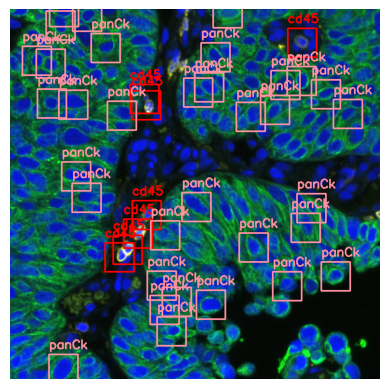

In [4]:
import cv2
import matplotlib.pyplot as plt

image_name = 23
i = 67
root = "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/"
# Define the image path
# image_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/images/{image_name}_roi_{roi_name}.jpg'
image_path = f"{root}/ome-png/{image_name}_patches/images/patch_{i}.png"
# Read the image
image = cv2.imread(image_path)

# Define the text file path
# text_file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/labels/{image_name}_roi_{roi_name}.txt'

text_file_path = f"{root}/ome-png/{image_name}_patches/annotations/patch_{i}.txt"
# Define colors based on the first number in each line of the text file
colors = {
    '0': (0, 0, 255),  # #00ffff
    '1': (160, 146, 255),  # #ff00ff
    '2': (0, 0, 255)     # #ff0000
}

# Read the text file with bounding box coordinates
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Assuming your image has dimensions 640x480
        image_width, image_height = 640, 640

        # Convert normalized coordinates to absolute coordinates
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height

        # Calculate the coordinates for the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Get the color based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to blue if label is not 0, 1, or 2

        # Draw the bounding box on the image with the selected color
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Add text label based on the color
        if label == 0:
            label_text = "cd45"
        elif label == 1:
            label_text = "panCk"
        elif label == 2:
            label_text = "Others"
        else:
            label_text = "Unknown"

        # Define the position for the text label
        text_x = x1
        text_y = y1 - 10  # Place the label slightly above the bounding box

        # Draw the text label on the image
        cv2.putText(image, label_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

# Display the image with colored bounding boxes and labels
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


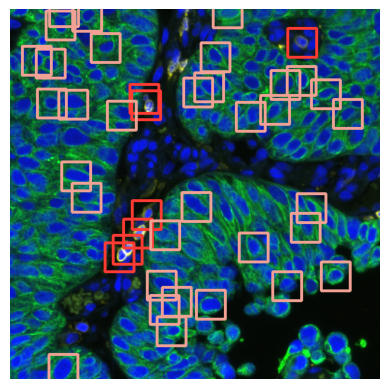

In [5]:
import cv2
import matplotlib.pyplot as plt

# image_name = 18
# roi_name = 60

# Define the image path
# image_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/images/{image_name}_roi_{roi_name}.jpg'
# image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/23/dataset/Three_Classes_aug/test/images/{file_name}.jpg"
# image_path = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/Karina/CC/images/CC_PATCH_1.png'
# Read the image
image = cv2.imread(image_path)

# Define the text file path
# text_file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/labels/{image_name}_roi_{roi_name}.txt'
# text_file_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/23/dataset/Three_Classes_aug/test/labels/{file_name}.txt"
# text_file_path = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/Karina/CC/annotations_yolov8/CC_PATCH_1.png-points_yolov8.txt"
# Define colors based on the first number in each line of the text file
colors = {
    '0': (51, 59, 255),  # #00ffff
    '1': (149, 162, 241),  # #ff00ff
    '2': (45, 115, 245)     # #ff0000
}

# Read the text file with bounding box coordinates
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Assuming your image has dimensions 640x480
        image_width, image_height = 640, 640

        # Convert normalized coordinates to absolute coordinates
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height

        # Calculate the coordinates for the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Get the color based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to blue if label is not 0, 1, or 2

        # Draw the bounding box on the image with the selected color
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 4)

        # Add text label based on the color
        if label == 0:
            label_text = "cd45"
        elif label == 1:
            label_text = "panCk"
        elif label == 2:
            label_text = "Others"
        else:
            label_text = "Unknown"

        # Define the position for the text label
        text_x = x1
        text_y = y1 - 10  # Place the label slightly above the bounding box

        # Draw the text label on the image
#         cv2.putText(image, label_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

# Display the image with colored bounding boxes and labels
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


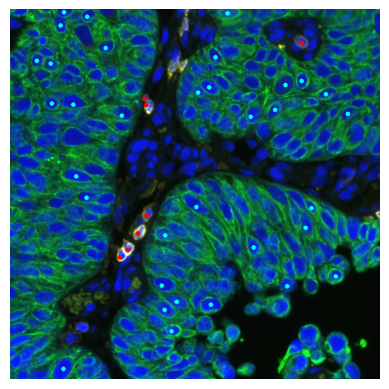

In [6]:
import cv2
import matplotlib.pyplot as plt

# image_name = 18
# roi_name = 60

# Define the image path
# image_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/images/{image_name}_roi_{roi_name}.jpg'
# image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/23/dataset/Three_Classes_aug/test/images/{file_name}.jpg"
# Read the image
image = cv2.imread(image_path)

# Define the text file path
# text_file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/combin_18_23/three_calss_two_dataset/train/labels/{image_name}_roi_{roi_name}.txt'
# text_file_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/23/dataset/Three_Classes_aug/test/labels/{file_name}.txt"
# Define colors based on the first number in each line of the text file
colors = {
    '0': (0, 0, 255),  # #00ffff
    '1': (255, 255, 0),  # #ff00ff
    '2': (255, 0, 255)     # #ff0000
}

# Read the text file with bounding box coordinates
with open(text_file_path, 'r') as file:
    lines = file.readlines()
# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Assuming your image has dimensions 640x480
        image_width, image_height = 640, 640

        # Convert normalized coordinates to absolute coordinates
        x_center *= image_width
        y_center *= image_height

        # Get the color based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to blue if label is not 0, 1, or 2

        # Draw the point on the image with the selected color
        # Set the radius of the circle (the third argument) to a small value to represent a point
        cv2.circle(image, (int(x_center), int(y_center)), radius=4, color=color, thickness=-1)

        # The rest of your code for adding text labels remains unchanged

# Display the image with colored points
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [7]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
Setup complete ✅ (224 CPUs, 2015.6 GB RAM, 785.5/1758.7 GB disk)


In [7]:
import mlflow
import os
import sys
import torch
from ultralytics import YOLO
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def save_yolo_model(model, path):
    model.save(path)

mlflow.set_experiment("YOLOv8_Training")

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model", "yolov8x.pt")
    mlflow.log_param("data", "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset-mod/config.yaml")
    mlflow.log_param("epochs", 250)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("image_size", 640)
    mlflow.log_param("data_version", "1.0")  # Adjust as needed
    mlflow.log_param("code_version", "1.0")  # Adjust as needed

    # Log system info
    mlflow.log_param("python_version", sys.version)
    mlflow.log_param("torch_version", torch.__version__)
    if torch.cuda.is_available():
        mlflow.log_param("cuda_version", torch.version.cuda)
        mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))

    # Set up and train YOLOv8 model
    model = YOLO('yolov8x.pt')
    results = model.train(
        data='/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset-mod/config.yaml', 
        epochs=250, 
        batch=32, 
        imgsz=640
    )

    # Log metrics
    metrics = results.results_dict
    for key, value in metrics.items():
        try:
            sanitized_key = sanitize_metric_name(key)
            mlflow.log_metric(sanitized_key, value)
        except Exception as e:
            print(f"Error logging metric {key}: {e}")

    # Save and log the model
    model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    save_yolo_model(model, model_path)
    mlflow.log_artifact(model_path, "model")

    # Log the training configuration file
    mlflow.log_artifact('/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset-mod/config.yaml')

    # Optionally, log other relevant artifacts
    # Log the labels plot
    labels_plot_path = os.path.join(results.save_dir, 'labels.jpg')
    if os.path.exists(labels_plot_path):
        mlflow.log_artifact(labels_plot_path, "plots")

    # Log the results plot
    results_plot_path = os.path.join(results.save_dir, 'results.png')
    if os.path.exists(results_plot_path):
        mlflow.log_artifact(results_plot_path, "plots")

    # Log the confusion matrix
    confusion_matrix_path = os.path.join(results.save_dir, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix_path):
        mlflow.log_artifact(confusion_matrix_path, "plots")

print("Training and logging completed successfully!")

Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset-mod/config.yaml, epochs=250, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train27, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/labels.cache... 1316 images, 0 backgrounds, 7 corrupt: 100%|██████████| 1322/1322 [00:00<?, ?it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/images/16_patch_1211.png: ignoring corrupt image/label: cannot identify image file '/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/images/16_patch_1211.png'
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/images/16_patch_496.png: ignoring corrupt image/label: cannot identify image file '/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/images/16_patch_496.png'
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/images/16_patch_513.png: ignoring corrupt image/label: cannot identify image file '/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/images/16_patch_513.png'
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/images/18_patch_182.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/train/images/29_patch_1303


val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset/valid/labels.cache... 331 images, 0 backgrounds, 0 corrupt: 100%|██████████| 331/331 [00:00<?, ?it/s]


Plotting labels to runs/detect/train27/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 16:54:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 16:54:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 16:54:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 16:54:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 16:54:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(d021fb156c4248ad97e69c86c989e65a) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      28.1G      2.889      4.016      2.254         44        640: 100%|██████████| 42/42 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.30it/s]

                   all        331       3666          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250        25G      2.598      3.774      1.899         70        640: 100%|██████████| 42/42 [00:09<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]

                   all        331       3666      0.333    0.00258   2.09e-05      6e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      25.3G      2.499      3.755      1.844         44        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]

                   all        331       3666   5.98e-05   0.000203   1.03e-05    3.7e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      25.1G      2.469      3.766      1.783         41        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]


                   all        331       3666      0.344     0.0031    0.00525    0.00193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      25.4G      2.404      3.761      1.727         36        640: 100%|██████████| 42/42 [00:09<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        331       3666   3.01e-05    0.00163   1.51e-05   5.09e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      25.5G      2.292      3.768      1.658         29        640: 100%|██████████| 42/42 [00:09<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

                   all        331       3666   0.000468     0.0166   0.000243    5.9e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      25.2G      2.324      3.774      1.658         34        640: 100%|██████████| 42/42 [00:09<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.68s/it]

                   all        331       3666    0.00272     0.0516    0.00152   0.000687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250        25G      2.364      3.762      1.672         88        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.71s/it]

                   all        331       3666    0.00212     0.0843     0.0013   0.000388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      25.2G      2.314      3.777      1.621         50        640: 100%|██████████| 42/42 [00:09<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.70s/it]

                   all        331       3666    0.00194      0.031   0.000993   0.000471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      25.5G      2.339      3.785      1.637         25        640: 100%|██████████| 42/42 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

                   all        331       3666     0.0134     0.0535    0.00686    0.00273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      24.9G      2.309       3.78      1.631         56        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.40s/it]

                   all        331       3666   0.000624     0.0685   0.000381    0.00012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      25.2G      2.234      3.779      1.599         42        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.44s/it]

                   all        331       3666    0.00322     0.0481    0.00179   0.000481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      25.2G      2.258      3.769        1.6         51        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

                   all        331       3666    0.00345     0.0937    0.00199   0.000726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250        25G      2.239      3.765      1.586         99        640: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        331       3666     0.0029      0.117    0.00175    0.00062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250        25G      2.289      3.795      1.642         10        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.45s/it]

                   all        331       3666    0.00205     0.0494    0.00125   0.000418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      25.2G      2.253      3.775      1.613         22        640: 100%|██████████| 42/42 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.37s/it]

                   all        331       3666    0.00088     0.0198   0.000769   0.000178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      25.2G      2.181      3.809      1.558         15        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.31s/it]

                   all        331       3666     0.0034     0.0683    0.00188    0.00069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      25.4G      2.221      3.759      1.593         72        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        331       3666    0.00144      0.087   0.000942    0.00033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      25.3G      2.185      3.795      1.552         26        640: 100%|██████████| 42/42 [00:09<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]


                   all        331       3666    0.00255     0.0979    0.00181   0.000736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      25.5G       2.24       3.78      1.577         15        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

                   all        331       3666    0.00224       0.07    0.00133   0.000461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250        25G      2.221      3.772      1.579         21        640: 100%|██████████| 42/42 [00:09<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.45s/it]

                   all        331       3666    0.00305       0.06    0.00164   0.000523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      25.6G      2.165      3.782      1.533         84        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.42s/it]

                   all        331       3666    0.00185     0.0415   0.000984   0.000252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      25.2G      2.154      3.839       1.53         13        640: 100%|██████████| 42/42 [00:09<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.45s/it]

                   all        331       3666   0.000914     0.0416   0.000639   0.000159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250        25G      2.202       3.79      1.587         45        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.46s/it]

                   all        331       3666    0.00464      0.124    0.00282    0.00104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      24.9G      2.274       3.75      1.612         68        640: 100%|██████████| 42/42 [00:09<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]

                   all        331       3666    0.00199     0.0316    0.00104   0.000276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      26.1G      2.202      3.763       1.55        102        640: 100%|██████████| 42/42 [00:09<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]

                   all        331       3666    0.00247     0.0667    0.00138   0.000537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      25.1G      2.241      3.791      1.576         20        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.30s/it]

                   all        331       3666    0.00177     0.0432   0.000945   0.000386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      24.9G        2.2      3.798      1.574         27        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        331       3666    0.00309     0.0798    0.00187   0.000538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250        25G      2.135       3.79       1.52         56        640: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]

                   all        331       3666    0.00299     0.0785    0.00201   0.000807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      24.9G      2.142      3.804      1.533         30        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        331       3666    0.00297     0.0595    0.00163   0.000572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250        25G      2.168      3.787      1.551         53        640: 100%|██████████| 42/42 [00:09<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.07s/it]

                   all        331       3666    0.00844     0.0661    0.00523    0.00132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250        25G      2.207      3.767      1.562         34        640: 100%|██████████| 42/42 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.27s/it]

                   all        331       3666    0.00197      0.057    0.00154     0.0005



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      25.2G      2.162      3.777      1.537         26        640: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]

                   all        331       3666    0.00156     0.0359   0.000874   0.000213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      25.2G      2.139      3.759      1.524         53        640: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.60s/it]

                   all        331       3666   0.000976     0.0271   0.000584   0.000176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      25.5G      2.171      3.791      1.519         23        640: 100%|██████████| 42/42 [00:09<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.06s/it]

                   all        331       3666   0.000933     0.0565   0.000617    0.00025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      25.4G      2.135      3.748      1.517         51        640: 100%|██████████| 42/42 [00:09<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.63s/it]

                   all        331       3666    0.00135     0.0357   0.000733   0.000282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250        25G      2.136       3.79      1.532         32        640: 100%|██████████| 42/42 [00:09<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.68s/it]

                   all        331       3666    0.00134     0.0453    0.00087   0.000221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      25.8G       2.12      3.771      1.506         86        640: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.38s/it]

                   all        331       3666    0.00178     0.0342   0.000967   0.000363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      24.9G      2.125      3.769       1.51         52        640: 100%|██████████| 42/42 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]

                   all        331       3666    0.00288      0.121    0.00184   0.000588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      25.6G      2.136      3.767      1.512         60        640: 100%|██████████| 42/42 [00:09<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

                   all        331       3666    0.00216     0.0413     0.0012   0.000459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      25.1G      2.121      3.803      1.509         12        640: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

                   all        331       3666    0.00426     0.0505    0.00225   0.000836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      25.2G      2.164      3.768      1.543         72        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.27s/it]

                   all        331       3666    0.00171     0.0359   0.000933   0.000449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      25.2G      2.112      3.779      1.504         41        640: 100%|██████████| 42/42 [00:09<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]

                   all        331       3666   0.000504     0.0305   0.000276   9.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      25.1G       2.09      3.766      1.502         79        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.04s/it]

                   all        331       3666    0.00115     0.0246   0.000606   0.000211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      24.9G      2.088      3.828      1.481         43        640: 100%|██████████| 42/42 [00:09<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]

                   all        331       3666    0.00123     0.0439   0.000689   0.000258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250        25G      2.121      3.787      1.498         35        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.47s/it]

                   all        331       3666    0.00169     0.0586   0.000945   0.000367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      25.2G      2.139        3.8      1.513         15        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]

                   all        331       3666    0.00169     0.0479   0.000939   0.000278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      25.1G      2.107      3.795       1.51         17        640: 100%|██████████| 42/42 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        331       3666    0.00112     0.0681   0.000696   0.000294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250        25G      2.135      3.834      1.532          8        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]

                   all        331       3666   0.000557     0.0337   0.000312   8.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      25.2G       2.11      3.782      1.505        159        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]

                   all        331       3666   0.000527     0.0319    0.00029   0.000112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250        25G      2.115       3.76      1.511         65        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.29s/it]

                   all        331       3666     0.0016     0.0583    0.00103   0.000421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      25.5G      2.065      3.776      1.504         32        640: 100%|██████████| 42/42 [00:09<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]

                   all        331       3666     0.0009     0.0545   0.000559   0.000246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      25.5G      2.121      3.763      1.498         84        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

                   all        331       3666    0.00161     0.0452   0.000916   0.000326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250        25G      2.104      3.782      1.514         89        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]

                   all        331       3666     0.0568     0.0733     0.0299     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      24.7G      2.098      3.778       1.49         47        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.20s/it]

                   all        331       3666   0.000628      0.038   0.000381   0.000181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      25.3G      2.094      3.765      1.506        107        640: 100%|██████████| 42/42 [00:09<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.80s/it]

                   all        331       3666    0.00155     0.0553   0.000884   0.000306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      25.3G      2.081      3.868      1.492         10        640: 100%|██████████| 42/42 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.48s/it]

                   all        331       3666    0.00209       0.05    0.00112   0.000514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      25.2G      2.053      3.772      1.472         74        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.79s/it]

                   all        331       3666    0.00192      0.043    0.00102   0.000418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      25.5G      2.121      3.763      1.531         27        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.73s/it]

                   all        331       3666    0.00222     0.0415    0.00122   0.000363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250        25G      2.058       3.79      1.485         31        640: 100%|██████████| 42/42 [00:09<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]

                   all        331       3666    0.00342     0.0664     0.0019   0.000785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      25.6G      2.065      3.777      1.485         34        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.43s/it]

                   all        331       3666    0.00153     0.0548   0.000907   0.000327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250        25G      2.098      3.768      1.486        123        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

                   all        331       3666    0.00145     0.0405   0.000779   0.000301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      25.2G      2.086      3.763      1.484         84        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.23s/it]

                   all        331       3666    0.00176     0.0706    0.00102   0.000402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      24.9G      2.117      3.782      1.518         79        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.79s/it]

                   all        331       3666   0.000668     0.0288   0.000356   9.86e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      25.2G      2.059       3.79      1.491         52        640: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.63s/it]

                   all        331       3666   0.000355     0.0213   0.000189   5.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      25.1G      2.092      3.761      1.471         62        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]

                   all        331       3666    0.00381     0.0596    0.00201   0.000859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250        25G      2.058      3.809      1.482         19        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]

                   all        331       3666   0.000574     0.0348   0.000317   0.000126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250        25G      2.095      3.767      1.507         62        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.64s/it]

                   all        331       3666   0.000601     0.0364   0.000335   0.000132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      25.7G      2.077      3.777      1.491         33        640: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]

                   all        331       3666      0.002     0.0537    0.00122   0.000508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      25.2G      2.067      3.799      1.507         46        640: 100%|██████████| 42/42 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        331       3666   0.000712     0.0429   0.000404   0.000148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      25.6G      2.082       3.78      1.487         65        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.21s/it]

                   all        331       3666    0.00133     0.0518   0.000746   0.000337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      25.9G      2.057      3.798      1.477         83        640: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

                   all        331       3666     0.0019     0.0651    0.00142   0.000486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      25.6G      2.052      3.789      1.466         26        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

                   all        331       3666    0.00187     0.0454    0.00102   0.000289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      25.2G       2.04      3.827      1.488          9        640: 100%|██████████| 42/42 [00:09<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]

                   all        331       3666    0.00595     0.0548    0.00324    0.00106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      25.1G      2.085      3.776      1.499         70        640: 100%|██████████| 42/42 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]

                   all        331       3666   0.000819     0.0496   0.000488   0.000169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      25.1G      2.056      3.779      1.475         44        640: 100%|██████████| 42/42 [00:09<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.71s/it]

                   all        331       3666    0.00191     0.0256   0.000976   0.000241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      25.1G      2.111      3.789      1.528         57        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.66s/it]

                   all        331       3666   0.000995     0.0404   0.000552    0.00018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      25.1G      2.058      3.773      1.488         23        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.23s/it]

                   all        331       3666    0.00078     0.0306   0.000416   0.000119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      25.5G      2.066      3.762      1.498         31        640: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.60s/it]

                   all        331       3666    0.00289     0.0302    0.00149   0.000381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      25.4G      2.076      3.756      1.494         30        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]

                   all        331       3666    0.00254     0.0603    0.00141   0.000397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      25.2G      2.037      3.778      1.484         32        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]

                   all        331       3666     0.0015     0.0544   0.000859    0.00032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250        25G       2.06      3.773      1.484         65        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.75s/it]

                   all        331       3666    0.00219     0.0207    0.00111   0.000721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      25.2G      2.067      3.788      1.488         43        640: 100%|██████████| 42/42 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        331       3666     0.0018     0.0484   0.000973   0.000331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      25.1G      2.046      3.799       1.46         32        640: 100%|██████████| 42/42 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        331       3666   0.000675     0.0407   0.000401   0.000147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      25.2G      2.089      3.759      1.475        112        640: 100%|██████████| 42/42 [00:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.49s/it]

                   all        331       3666    0.00174     0.0266   0.000898   0.000242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      25.2G       2.07      3.772      1.488         68        640: 100%|██████████| 42/42 [00:09<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.40s/it]

                   all        331       3666    0.00186     0.0473    0.00102   0.000427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      25.1G      2.052      3.759      1.489         39        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

                   all        331       3666    0.00237     0.0479     0.0013   0.000481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      25.2G      2.038      3.779      1.457         32        640: 100%|██████████| 42/42 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

                   all        331       3666    0.00131     0.0392   0.000721   0.000211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      25.2G      2.059      3.794      1.461         14        640: 100%|██████████| 42/42 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.24s/it]

                   all        331       3666    0.00161     0.0387   0.000932   0.000301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      25.3G      2.018      3.774      1.464         63        640: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.49s/it]

                   all        331       3666    0.00152     0.0417   0.000834   0.000307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      25.1G      2.045      3.766      1.463         52        640: 100%|██████████| 42/42 [00:09<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.24s/it]

                   all        331       3666    0.00122     0.0362    0.00068   0.000199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      25.2G      2.041      3.761      1.468         31        640: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.59s/it]

                   all        331       3666    0.00202     0.0335    0.00105   0.000347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      25.5G      2.051      3.771      1.472         33        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.46s/it]

                   all        331       3666    0.00154     0.0352   0.000821   0.000323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250        25G      2.035      3.744      1.464         44        640: 100%|██████████| 42/42 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]

                   all        331       3666    0.00195     0.0381    0.00103   0.000355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      24.8G      2.017      3.784      1.453         85        640: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

                   all        331       3666    0.00158     0.0331   0.000845   0.000218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250        25G      2.002      3.746      1.456         86        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]

                   all        331       3666    0.00196     0.0381    0.00106    0.00034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      25.1G      2.016      3.769      1.441         43        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.66s/it]

                   all        331       3666    0.00199     0.0287    0.00112   0.000378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      25.5G       2.02       3.77      1.463         32        640: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.21s/it]

                   all        331       3666     0.0016     0.0436   0.000847   0.000346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      25.1G      2.018      3.748      1.471        173        640: 100%|██████████| 42/42 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.07s/it]

                   all        331       3666    0.00181     0.0524    0.00102   0.000419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      25.1G      2.019      3.761      1.465         91        640: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]

                   all        331       3666    0.00154     0.0347   0.000827   0.000337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      25.2G      2.093      3.751      1.487         19        640: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.23s/it]

                   all        331       3666     0.0022     0.0486    0.00138   0.000522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      25.2G      2.035      3.772      1.461         43        640: 100%|██████████| 42/42 [00:09<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.27s/it]

                   all        331       3666    0.00162     0.0439   0.000936    0.00038



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      24.9G      2.023      3.781      1.447         57        640: 100%|██████████| 42/42 [00:09<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

                   all        331       3666    0.00191     0.0479    0.00165   0.000541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      25.5G       2.01      3.712       1.44         73        640: 100%|██████████| 42/42 [00:09<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.21s/it]

                   all        331       3666    0.00207     0.0368    0.00121   0.000464
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 54, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



104 epochs completed in 0.570 hours.
Optimizer stripped from runs/detect/train27/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train27/weights/best.pt, 136.7MB

Validating runs/detect/train27/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.68s/it]


                   all        331       3666     0.0568     0.0737     0.0299     0.0119
                  cd45        331       1640    0.00364       0.22    0.00226   0.000771
                 panCK        331       1121          0          0          0          0
                Others        331        905      0.167     0.0011     0.0876      0.035
Speed: 0.0ms preprocess, 1.9ms inference, 0.0ms loss, 26.7ms postprocess per image
Results saved to runs/detect/train27
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


AttributeError: 'YOLO' object has no attribute 'save'

Image loaded successfully.
Text file loaded successfully with 326 lines.


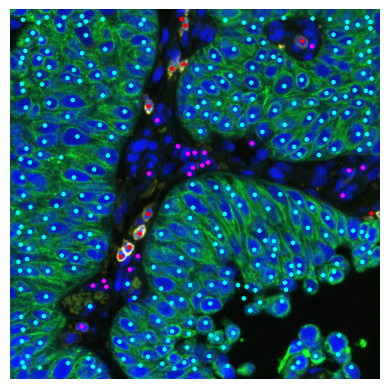

In [13]:
import cv2
import matplotlib.pyplot as plt

# Define the image path
image_path = '/rsrch5/home/plm/yshokrollahi/project4/RawDataset//ome-png/23_patches/images/patch_67.png'

# Read the image
image = cv2.imread(image_path)
if image is None:
    print("Error: Image not loaded. Please check the image path.")
else:
    print("Image loaded successfully.")

# Define the text file path
text_file_path = "/rsrch5/home/plm/yshokrollahi/project4/runs/detect/predict6/labels/patch_67.txt"

# Define colors based on the first number in each line of the text file
colors = {
    '0': (0, 0, 255),  # #ff0000
    '1': (255, 255, 0),  # #ffff00
    '2': (255, 0, 255)  # #ff00ff
}

# Read the text file with bounding box coordinates
try:
    with open(text_file_path, 'r') as file:
        lines = file.readlines()
        if not lines:
            print("Error: Text file is empty or not read correctly. Please check the file path and content.")
        else:
            print(f"Text file loaded successfully with {len(lines)} lines.")
except FileNotFoundError:
    print("Error: Text file not found. Please check the text file path.")

# Iterate through the lines in the text file
for line in lines:
    values = line.strip().split(' ')
    if len(values) == 5:
        label, x_center, y_center, width, height = map(float, values)

        # Get image dimensions
        image_height, image_width = image.shape[:2]

        # Convert normalized coordinates to absolute coordinates
        x_center_abs = x_center * image_width
        y_center_abs = y_center * image_height

        # Get the color based on the label
        color = colors.get(str(int(label)), (0, 0, 255))  # Default to red if label is not 0, 1, or 2

        # Draw the point on the image with the selected color
        # Set the radius of the circle (the third argument) to a small value to represent a point
        cv2.circle(image, (int(x_center_abs), int(y_center_abs)), radius=4, color=color, thickness=-1)

# Display the image with colored points
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [17]:
import mlflow
import os
import sys
import torch
from ultralytics import YOLO
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def save_yolo_model(model, path):
    model.save(path)

mlflow.set_experiment("YOLOv8_Training")

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model", "custom_yolov8.pt")  # Update to reflect custom weights
    mlflow.log_param("data", "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/config.yaml")
    mlflow.log_param("epochs", 250)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("image_size", 640)
    mlflow.log_param("data_version", "1.0")  # Adjust as needed
    mlflow.log_param("code_version", "1.0")  # Adjust as needed

    # Log system info
    mlflow.log_param("python_version", sys.version)
    mlflow.log_param("torch_version", torch.__version__)
    if torch.cuda.is_available():
        mlflow.log_param("cuda_version", torch.version.cuda)
        mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))

    # Path to the custom pre-trained weights
    custom_weights_path = '/rsrch5/home/plm/yshokrollahi/project4/runs/detect/train27/weights/last.pt'

    # Set up and train YOLOv8 model with custom weights
    model = YOLO(custom_weights_path)
    results = model.train(
        data='/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/config.yaml', 
        epochs=250, 
        batch=32, 
        imgsz=640
    )

    # Log metrics
    metrics = results.results_dict
    for key, value in metrics.items():
        try:
            sanitized_key = sanitize_metric_name(key)
            mlflow.log_metric(sanitized_key, value)
        except Exception as e:
            print(f"Error logging metric {key}: {e}")

    # Save and log the model
    model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    save_yolo_model(model, model_path)
    mlflow.log_artifact(model_path, "model")

    # Log the training configuration file
    mlflow.log_artifact('/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/config.yaml')

    # Optionally, log other relevant artifacts
    # Log the labels plot
    labels_plot_path = os.path.join(results.save_dir, 'labels.jpg')
    if os.path.exists(labels_plot_path):
        mlflow.log_artifact(labels_plot_path, "plots")

    # Log the results plot
    results_plot_path = os.path.join(results.save_dir, 'results.png')
    if os.path.exists(results_plot_path):
        mlflow.log_artifact(results_plot_path, "plots")

    # Log the confusion matrix
    confusion_matrix_path = os.path.join(results.save_dir, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix_path):
        mlflow.log_artifact(confusion_matrix_path, "plots")

print("Training and logging completed successfully!")


Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=/rsrch5/home/plm/yshokrollahi/project4/runs/detect/train27/weights/last.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/config.yaml, epochs=250, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/labels... 1260 images, 0 backgrounds, 4 corrupt: 100%|██████████| 1264/1264 [00:01<00:00, 834.35it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/images/16_patch_1040.png: ignoring corrupt image/label: cannot identify image file '/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/images/16_patch_1040.png'
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/images/16_patch_619.png: ignoring corrupt image/label: cannot identify image file '/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/images/16_patch_619.png'
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/images/16_patch_670.png: ignoring corrupt image/label: cannot identify image file '/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/images/16_patch_670.png'
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/images/18_patch_399.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/datase

train: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/train/labels.cache


val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/valid/labels... 316 images, 0 backgrounds, 1 corrupt: 100%|██████████| 316/316 [00:00<00:00, 806.38it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/valid/images/29_patch_288.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/valid/images/44_patch_125.png: ignoring corrupt image/label: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
val: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_new/valid/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 18:35:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 18:35:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 18:35:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 18:35:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 18:35:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(2eb71a1e172d42b184aec9e7429130f8) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
MLflow: WARNING ⚠️ Failed to initialize: Changing param values is not allowed. Param with key='model' was already logged with value='custom_yolov8.pt' for run ID='2eb71a1e172d42b184aec9e7429130f8'. Attempted logging new value '/rsrch5/home/plm/yshokrollahi/project4/runs/detect/train27/weights/last.pt'.
MLflow: WARNING ⚠️ Not tracking this run
250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      26.7G      3.149      52.86      3.545        234        640: 100%|██████████| 40/40 [00:10<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        315       3787    0.00349     0.0769    0.00195   0.000622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      25.4G       2.28      3.774      1.618        183        640: 100%|██████████| 40/40 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        315       3787    0.00217     0.0653     0.0012   0.000415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250        25G       2.27       3.73      1.598        173        640: 100%|██████████| 40/40 [00:08<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

                   all        315       3787   0.000826     0.0293   0.000466   0.000152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      25.4G      2.287      3.727       1.59        178        640: 100%|██████████| 40/40 [00:08<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        315       3787    0.00176     0.0175   0.000894   0.000496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      25.6G      2.249      3.749      1.571        272        640: 100%|██████████| 40/40 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

                   all        315       3787    0.00027      0.014   0.000141   4.83e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      25.8G      2.205      3.728      1.538        213        640: 100%|██████████| 40/40 [00:08<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        315       3787    0.00058     0.0205   0.000299    8.6e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      25.8G      2.245      3.716      1.555        274        640: 100%|██████████| 40/40 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]

                   all        315       3787   0.000789     0.0159   0.000402   0.000129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      25.2G      2.211      3.727      1.559        278        640: 100%|██████████| 40/40 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]

                   all        315       3787    0.00128      0.102    0.00086    0.00021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      26.2G      2.172      3.741       1.52        128        640: 100%|██████████| 40/40 [00:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.84s/it]

                   all        315       3787   0.000589     0.0402   0.000334   0.000118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      25.5G       2.18      3.728      1.544        184        640: 100%|██████████| 40/40 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]

                   all        315       3787     0.0013     0.0455    0.00071   0.000261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      25.5G      2.155      3.729      1.522        144        640: 100%|██████████| 40/40 [00:08<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        315       3787    0.00145     0.0676    0.00083   0.000193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      25.6G      2.152      3.724      1.513        178        640: 100%|██████████| 40/40 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]

                   all        315       3787    0.00236     0.0727     0.0015   0.000668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      25.5G      2.093      3.718      1.495        182        640: 100%|██████████| 40/40 [00:08<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]

                   all        315       3787    0.00266     0.0444    0.00141   0.000541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      25.6G      2.134      3.729      1.514        164        640: 100%|██████████| 40/40 [00:08<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.40s/it]

                   all        315       3787    0.00261     0.0446    0.00137   0.000633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250        25G      2.122      3.717      1.505        219        640: 100%|██████████| 40/40 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.86s/it]

                   all        315       3787    0.00183     0.0307   0.000949   0.000351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      25.5G      2.162      3.712       1.52        169        640: 100%|██████████| 40/40 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]

                   all        315       3787    0.00142     0.0504   0.000777   0.000245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      25.8G      2.067      3.729      1.488        275        640: 100%|██████████| 40/40 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]

                   all        315       3787    0.00254     0.0656    0.00162   0.000516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      25.7G       2.06      3.723      1.489        264        640: 100%|██████████| 40/40 [00:08<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]

                   all        315       3787    0.00332     0.0787    0.00199   0.000699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      24.9G       2.06        3.7       1.48        250        640: 100%|██████████| 40/40 [00:08<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]

                   all        315       3787     0.0025      0.065    0.00144   0.000547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250        26G      2.105      3.704       1.51        211        640: 100%|██████████| 40/40 [00:08<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]

                   all        315       3787    0.00345     0.0594    0.00358    0.00094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250        25G      2.123      3.711      1.508        222        640: 100%|██████████| 40/40 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

                   all        315       3787    0.00371      0.104    0.00224   0.000797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      25.2G      2.097      3.714      1.482        189        640: 100%|██████████| 40/40 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        315       3787    0.00353     0.0655    0.00191   0.000617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      25.2G      2.079      3.715      1.496        153        640: 100%|██████████| 40/40 [00:08<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]

                   all        315       3787    0.00179     0.0577    0.00128   0.000496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      25.2G        2.1      3.728      1.508        234        640: 100%|██████████| 40/40 [00:08<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]

                   all        315       3787    0.00288     0.0599    0.00156   0.000759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      25.1G      2.071       3.69      1.479        200        640: 100%|██████████| 40/40 [00:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

                   all        315       3787    0.00161     0.0399   0.000907   0.000321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      25.4G      2.092       3.71      1.493        264        640: 100%|██████████| 40/40 [00:08<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]

                   all        315       3787    0.00275     0.0545    0.00156   0.000576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      25.2G      2.042      3.688      1.464        366        640: 100%|██████████| 40/40 [00:08<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]

                   all        315       3787    0.00193     0.0493    0.00104   0.000398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      25.1G      2.078      3.718      1.481        151        640: 100%|██████████| 40/40 [00:08<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

                   all        315       3787    0.00342     0.0771    0.00198   0.000796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      25.3G      2.056      3.733      1.491        260        640: 100%|██████████| 40/40 [00:08<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        315       3787    0.00324     0.0737    0.00188   0.000838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      25.1G      2.102      3.693      1.486        384        640: 100%|██████████| 40/40 [00:08<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

                   all        315       3787    0.00403     0.0578     0.0025   0.000929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      25.3G      2.074      3.686      1.472        181        640: 100%|██████████| 40/40 [00:08<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        315       3787    0.00361     0.0612    0.00195   0.000728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      25.2G      2.044      3.713      1.476        142        640: 100%|██████████| 40/40 [00:08<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

                   all        315       3787    0.00171     0.0335    0.00256   0.000972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      25.6G      2.041      3.695      1.463        199        640: 100%|██████████| 40/40 [00:08<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        315       3787    0.00254     0.0773    0.00157    0.00058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      24.9G      2.043      3.717      1.497        495        640:  10%|█         | 4/40 [00:00<00:08,  4.08it/s]


KeyboardInterrupt: 

In [28]:
import mlflow
import os
import sys
import torch
from ultralytics import YOLO
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def save_yolo_model(model, path):
    model.save(path)

mlflow.set_experiment("YOLOv8_Training")

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model", "yolov8x.pt")
    mlflow.log_param("data", "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml")
    mlflow.log_param("epochs", 250)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("image_size", 640)
    mlflow.log_param("data_version", "1.0")  # Adjust as needed
    mlflow.log_param("code_version", "1.0")  # Adjust as needed

    # Log system info
    mlflow.log_param("python_version", sys.version)
    mlflow.log_param("torch_version", torch.__version__)
    if torch.cuda.is_available():
        mlflow.log_param("cuda_version", torch.version.cuda)
        mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))

    # Set up and train YOLOv8 model
    model = YOLO('yolov8x.pt')
    results = model.train(
        data='/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml', 
        epochs=250, 
        batch=32, 
        imgsz=640

    )

    # Log metrics
    metrics = results.results_dict
    for key, value in metrics.items():
        try:
            sanitized_key = sanitize_metric_name(key)
            mlflow.log_metric(sanitized_key, value)
        except Exception as e:
            print(f"Error logging metric {key}: {e}")

    # Save and log the model
    model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    save_yolo_model(model, model_path)
    mlflow.log_artifact(model_path, "model")

    # Log the training configuration file
    mlflow.log_artifact('/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml')

    # Optionally, log other relevant artifacts
    # Log the labels plot
    labels_plot_path = os.path.join(results.save_dir, 'labels.jpg')
    if os.path.exists(labels_plot_path):
        mlflow.log_artifact(labels_plot_path, "plots")

    # Log the results plot
    results_plot_path = os.path.join(results.save_dir, 'results.png')
    if os.path.exists(results_plot_path):
        mlflow.log_artifact(results_plot_path, "plots")

    # Log the confusion matrix
    confusion_matrix_path = os.path.join(results.save_dir, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix_path):
        mlflow.log_artifact(confusion_matrix_path, "plots")

print("Training and logging completed successfully!")

Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml, epochs=250, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/labels... 1035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1035/1035 [00:01<00:00, 1016.53it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_276.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_437.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_548.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_622.png: 1 duplicate labels removed
train: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/labels.cache



val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/labels... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<00:00, 979.16it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_4.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_66.png: 1 duplicate labels removed
val: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/labels.cache


Plotting labels to runs/detect/train14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 19:31:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 19:31:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 19:31:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 19:31:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 19:31:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(7d510cde41b74371829b19eeebfd5b40) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250        44G      2.401      3.177       1.96        260        640: 100%|██████████| 33/33 [00:08<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        262       3787    0.00147     0.0322   0.000805   0.000306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      44.3G        1.8      2.187      1.468        224        640: 100%|██████████| 33/33 [00:07<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        262       3787    0.00147     0.0322   0.000805   0.000306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      44.7G      1.711      1.967      1.404        317        640: 100%|██████████| 33/33 [00:07<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        262       3787    0.00162     0.0443   0.000895   0.000361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      44.5G      1.706      1.935      1.409        174        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        262       3787     0.0743      0.246     0.0613     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250        45G      1.628      1.939      1.369        192        640: 100%|██████████| 33/33 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        262       3787     0.0347      0.413     0.0247     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      44.9G      1.676      1.939      1.381        127        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        262       3787      0.487      0.241      0.192     0.0273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      44.5G      1.682       1.92      1.385        164        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        262       3787      0.238      0.497      0.318      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      44.7G        1.6      1.893      1.336        199        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all        262       3787      0.541      0.356       0.31      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      44.4G      1.531      1.826      1.283        223        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]

                   all        262       3787      0.316      0.481      0.306      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      44.1G      1.566      1.819      1.322        176        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        262       3787      0.308      0.505      0.351      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      44.3G       1.58      1.812      1.334        132        640: 100%|██████████| 33/33 [00:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all        262       3787       0.35      0.519       0.39      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      44.3G      1.588      1.797      1.327        474        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]

                   all        262       3787      0.318      0.485      0.351      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      44.6G      1.531      1.734      1.289        191        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all        262       3787      0.333      0.514      0.389      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      44.1G      1.479      1.717       1.27        335        640: 100%|██████████| 33/33 [00:07<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

                   all        262       3787      0.334      0.523      0.398      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      44.2G      1.509      1.717      1.288        141        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all        262       3787      0.365      0.465      0.356      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      44.2G      1.476      1.688      1.274         99        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        262       3787      0.359      0.529      0.423      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      44.3G      1.505       1.69      1.279        193        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        262       3787      0.355      0.522      0.394      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      44.1G      1.484      1.656      1.261        183        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        262       3787      0.332      0.562      0.407      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      44.1G      1.485      1.677      1.268        138        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]

                   all        262       3787      0.287      0.545      0.368      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      44.3G      1.512      1.689      1.293        270        640: 100%|██████████| 33/33 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        262       3787       0.33      0.566        0.4      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      44.5G      1.434      1.639      1.248        216        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all        262       3787      0.364       0.53      0.405      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      44.2G      1.424      1.631      1.238        216        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]

                   all        262       3787      0.378      0.553      0.416      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      44.7G      1.384      1.609      1.217        232        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        262       3787      0.372      0.493        0.4      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      44.3G      1.422      1.575      1.226        300        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all        262       3787      0.353      0.561      0.446      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      44.7G      1.424      1.617      1.249        240        640: 100%|██████████| 33/33 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        262       3787       0.28      0.411      0.248     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      44.7G      1.432      1.603      1.238        262        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        262       3787      0.368      0.529      0.429      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      44.8G      1.459      1.615      1.249        143        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        262       3787      0.383      0.513       0.42      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      44.7G      1.407      1.609      1.234        145        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        262       3787       0.41       0.48      0.405       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      44.2G      1.391      1.566      1.228        260        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all        262       3787      0.401      0.505      0.423      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      44.1G      1.368      1.546      1.205        144        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]

                   all        262       3787      0.373      0.486      0.389      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      44.7G      1.402      1.573      1.246        241        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

                   all        262       3787      0.358      0.523      0.413      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      44.4G      1.499      1.582       1.27        168        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        262       3787      0.364      0.517      0.421      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      45.1G      1.404      1.593      1.225        103        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]

                   all        262       3787      0.383      0.557      0.442      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      44.2G      1.352      1.554      1.196        329        640: 100%|██████████| 33/33 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        262       3787      0.393      0.513      0.423      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      44.1G      1.347      1.559      1.197         70        640: 100%|██████████| 33/33 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        262       3787      0.368      0.528      0.416      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      44.3G      1.382      1.574      1.229        148        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        262       3787      0.369      0.539      0.438      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      44.8G      1.388      1.549      1.215        167        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]

                   all        262       3787      0.376      0.542      0.421      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      44.3G      1.405      1.565      1.216        349        640: 100%|██████████| 33/33 [00:07<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all        262       3787       0.41      0.458      0.421      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      44.4G      1.381        1.6      1.224        260        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]

                   all        262       3787      0.415      0.497       0.43      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      44.4G      1.366      1.533      1.212        173        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        262       3787      0.384      0.497      0.411      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250        44G      1.437      1.572      1.245        293        640: 100%|██████████| 33/33 [00:07<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]

                   all        262       3787      0.386      0.502      0.412      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      44.4G      1.356      1.569      1.193        129        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all        262       3787      0.384      0.559      0.453      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      44.4G      1.296      1.505      1.179        217        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        262       3787      0.413      0.542       0.44      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      44.7G      1.359      1.536      1.201        206        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        262       3787       0.42      0.528      0.448      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      45.2G      1.381       1.51      1.204        365        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all        262       3787      0.395      0.543      0.431      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      44.6G      1.352      1.523      1.191        245        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        262       3787      0.369      0.558      0.444      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250        44G       1.36      1.553      1.207        196        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all        262       3787       0.41      0.572      0.466       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      44.7G      1.321      1.519      1.178        128        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all        262       3787      0.396      0.529      0.425      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      44.1G      1.347      1.488      1.196        165        640: 100%|██████████| 33/33 [00:07<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all        262       3787      0.382      0.532      0.432      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      44.6G      1.322      1.511      1.187        217        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        262       3787      0.416      0.522      0.453      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      44.8G      1.369      1.523      1.215        152        640: 100%|██████████| 33/33 [00:07<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]

                   all        262       3787      0.376      0.539      0.438      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      44.3G      1.286      1.498      1.158        156        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]

                   all        262       3787      0.416      0.526      0.441      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      44.3G      1.286      1.481      1.166        241        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all        262       3787      0.363      0.598      0.452      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250        44G      1.314      1.481       1.17        307        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        262       3787      0.398      0.499      0.399      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      44.6G      1.298      1.461      1.186        190        640: 100%|██████████| 33/33 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all        262       3787      0.397      0.533       0.43      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      44.3G      1.281      1.485      1.165        145        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all        262       3787      0.375      0.522      0.395      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      44.5G      1.282      1.467       1.16        129        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all        262       3787      0.428      0.522      0.455       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      44.5G      1.288      1.469      1.168        108        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all        262       3787      0.374      0.541      0.433      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      44.6G      1.279      1.488      1.165        145        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        262       3787      0.337      0.513      0.391      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      44.4G      1.301      1.471      1.169        260        640: 100%|██████████| 33/33 [00:07<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all        262       3787      0.335      0.516      0.361      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      44.4G      1.286      1.444      1.159        278        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        262       3787      0.412      0.556      0.471      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      45.8G      1.343      1.472      1.197        246        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

                   all        262       3787      0.369      0.482      0.377      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      44.7G      1.319      1.467      1.187        106        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        262       3787      0.415      0.524      0.453      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      44.8G      1.264      1.434      1.167        168        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]

                   all        262       3787      0.394      0.509      0.428      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      44.7G      1.236      1.464      1.147        244        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all        262       3787      0.402      0.456      0.393      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      44.9G      1.258      1.434      1.148        163        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        262       3787      0.411       0.52      0.429      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      44.6G      1.352      1.429      1.198        201        640: 100%|██████████| 33/33 [00:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all        262       3787      0.435      0.535      0.467      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      44.6G      1.264      1.413      1.159        205        640: 100%|██████████| 33/33 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        262       3787      0.429      0.521      0.452      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      44.7G      1.275      1.411      1.167        122        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        262       3787      0.391      0.512      0.409      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      44.2G      1.249      1.442      1.163        167        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        262       3787      0.359      0.491      0.376       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      44.2G       1.26      1.426      1.156        169        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all        262       3787      0.423      0.533      0.457      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      44.3G      1.274       1.46       1.16        175        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]

                   all        262       3787      0.419      0.491      0.432      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      44.5G      1.258      1.407       1.16        189        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all        262       3787       0.43      0.526      0.448      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      44.2G      1.236      1.404      1.151        172        640: 100%|██████████| 33/33 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]

                   all        262       3787      0.428      0.518      0.456       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      44.4G      1.245      1.432      1.158        150        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        262       3787      0.367      0.489       0.39      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      44.5G      1.241       1.41      1.144        166        640: 100%|██████████| 33/33 [00:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all        262       3787      0.397      0.554      0.453      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      44.2G      1.269      1.372      1.161        245        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all        262       3787      0.383      0.518      0.417      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      44.8G      1.301      1.401      1.157        247        640: 100%|██████████| 33/33 [00:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        262       3787      0.409      0.497      0.432      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      44.7G      1.238      1.406      1.138        168        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all        262       3787      0.367      0.523      0.396      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      44.3G      1.227      1.385      1.132        362        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]

                   all        262       3787      0.379      0.541      0.422      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250        44G      1.201      1.376      1.131        175        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        262       3787      0.408      0.552      0.459      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      44.1G      1.218       1.39      1.128        229        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]

                   all        262       3787      0.416      0.593      0.485      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      44.4G      1.211      1.385      1.134        187        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        262       3787      0.396      0.538      0.449      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      44.5G      1.252      1.408      1.154        135        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all        262       3787      0.404      0.523       0.45      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      44.1G      1.234      1.368      1.151        163        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        262       3787      0.382      0.538      0.442      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      44.4G      1.226      1.358      1.142        206        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        262       3787      0.373      0.535      0.438      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250        45G      1.227      1.373      1.143        263        640: 100%|██████████| 33/33 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]

                   all        262       3787      0.408      0.551      0.451      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      44.2G        1.2      1.372      1.128        205        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        262       3787      0.449      0.534      0.468      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      44.9G      1.222      1.362      1.133        221        640: 100%|██████████| 33/33 [00:07<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        262       3787      0.405      0.545      0.446      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      44.2G      1.241      1.346      1.132        252        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        262       3787      0.425      0.545      0.453      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      44.1G      1.234      1.338      1.148        226        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]

                   all        262       3787      0.383      0.501      0.409      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      44.2G      1.261       1.39      1.151         84        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        262       3787      0.391      0.538      0.442      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      44.7G      1.218      1.355      1.132        138        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        262       3787      0.429      0.519      0.456      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      44.3G      1.177      1.324      1.111        255        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all        262       3787        0.4      0.512      0.416      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      44.3G      1.187      1.335      1.116        200        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        262       3787      0.402      0.509      0.425      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250        44G      1.187       1.36      1.117        205        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all        262       3787       0.39      0.533      0.432      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      44.2G      1.216      1.344       1.13        122        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]

                   all        262       3787      0.359      0.523      0.394      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      44.8G      1.248      1.329      1.134        170        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]

                   all        262       3787      0.387      0.539      0.423      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      44.5G      1.161      1.316       1.11        129        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all        262       3787      0.432      0.545      0.473      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      44.1G      1.195      1.346      1.125        222        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]

                   all        262       3787      0.358      0.438      0.341       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      44.1G      1.167      1.293      1.119        180        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]

                   all        262       3787       0.39      0.529       0.42       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      44.3G      1.169      1.293      1.111        108        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        262       3787      0.422      0.495      0.441      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      44.6G      1.216      1.322      1.143        292        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all        262       3787      0.403      0.497       0.41      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      44.6G      1.193      1.288      1.109        219        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]

                   all        262       3787        0.4       0.52       0.43      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      44.2G      1.183      1.319      1.116        222        640: 100%|██████████| 33/33 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]

                   all        262       3787      0.397      0.523      0.437      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      44.3G        1.2      1.318      1.118        230        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        262       3787      0.397      0.516      0.422      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      44.1G      1.185       1.31      1.117        135        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all        262       3787      0.385      0.512       0.41      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      44.2G      1.197      1.289       1.12        199        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        262       3787      0.445      0.522       0.46      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      45.2G      1.149      1.294      1.094        261        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all        262       3787      0.415      0.529      0.457      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      44.2G      1.164      1.282      1.098        192        640: 100%|██████████| 33/33 [00:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        262       3787      0.401      0.497      0.419      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      44.5G      1.129      1.256      1.089        204        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all        262       3787      0.453      0.518      0.454      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      44.3G      1.129      1.278      1.103        317        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        262       3787      0.393      0.547      0.441      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      44.2G      1.161      1.291      1.117        140        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all        262       3787      0.441      0.539      0.471      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      44.8G      1.143      1.258      1.093        237        640: 100%|██████████| 33/33 [00:07<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        262       3787      0.374      0.502      0.389      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      44.1G      1.141      1.266      1.091        223        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        262       3787      0.394       0.52      0.442      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      44.6G      1.148      1.252      1.103        139        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all        262       3787      0.426      0.552      0.462      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250        45G      1.129      1.242      1.085        157        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]

                   all        262       3787      0.404      0.468      0.408      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      44.2G      1.134      1.253      1.093        223        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        262       3787        0.4      0.536      0.434      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      44.4G      1.132      1.234      1.103        257        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        262       3787      0.416      0.537      0.436      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      44.5G      1.101      1.235      1.085        146        640: 100%|██████████| 33/33 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]

                   all        262       3787       0.41      0.533      0.453      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      44.3G      1.111      1.245      1.083        249        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        262       3787      0.414      0.522      0.413      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250        45G      1.118      1.215      1.077        150        640: 100%|██████████| 33/33 [00:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        262       3787      0.431      0.518      0.448      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      45.1G      1.114      1.232      1.091        154        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all        262       3787      0.422      0.542      0.455      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      44.1G      1.147      1.217      1.095        392        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        262       3787      0.436      0.538      0.456      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      44.2G      1.139      1.203      1.104        232        640: 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]

                   all        262       3787      0.434      0.514      0.432        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      44.7G      1.129      1.201      1.089        138        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]

                   all        262       3787      0.387      0.504      0.405      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      44.3G      1.118        1.2      1.082        281        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all        262       3787      0.437      0.504      0.446      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      44.4G       1.14      1.186      1.087        203        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]

                   all        262       3787      0.391      0.484      0.382     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250        44G      1.095      1.183      1.087        174        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]

                   all        262       3787      0.385      0.543      0.427      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      44.3G      1.105      1.171      1.083         88        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]

                   all        262       3787      0.368      0.515      0.388      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      44.5G        1.1      1.193      1.086        216        640: 100%|██████████| 33/33 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all        262       3787      0.437       0.47      0.427      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      44.5G      1.082      1.168      1.088        166        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        262       3787      0.419      0.521      0.434      0.238
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 82, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



132 epochs completed in 0.401 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 136.7MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


                   all        262       3787      0.416      0.593      0.485      0.312
                  cd45        262       1423      0.514      0.861      0.732      0.491
                 panCK        262       1158      0.304      0.413      0.263      0.164
                Others        262       1206      0.429      0.506      0.461       0.28
Speed: 0.0ms preprocess, 1.9ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/train14
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


AttributeError: 'YOLO' object has no attribute 'save'

In [30]:
import mlflow
import os
import sys
import torch
from ultralytics import YOLO
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def save_yolo_model(model, path):
    model.save(path)

mlflow.set_experiment("YOLOv8_Training")

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model", "yolov8x.pt")
    mlflow.log_param("data", "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml")
    mlflow.log_param("epochs", 250)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("image_size", 640)
    mlflow.log_param("data_version", "1.0")  # Adjust as needed
    mlflow.log_param("code_version", "1.0")  # Adjust as needed

    # Log system info
    mlflow.log_param("python_version", sys.version)
    mlflow.log_param("torch_version", torch.__version__)
    if torch.cuda.is_available():
        mlflow.log_param("cuda_version", torch.version.cuda)
        mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))

    # Set up and train YOLOv8 model
    model = YOLO('yolov8x.pt')
    results = model.train(
        data='/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml', 
        epochs=250, 
        batch=32, 
        imgsz=640,
        optimizer='auto',  # Use auto optimizer
        amp=True,  # Enable Automatic Mixed Precision (AMP)
        name='train14',  # Set name to train14
        save_dir='runs/detect/train14'  # Save directory
    )

    # Log metrics
    metrics = results.results_dict
    for key, value in metrics.items():
        try:
            sanitized_key = sanitize_metric_name(key)
            mlflow.log_metric(sanitized_key, value)
        except Exception as e:
            print(f"Error logging metric {key}: {e}")

    # Save and log the model
    model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    save_yolo_model(model, model_path)
    mlflow.log_artifact(model_path, "model")

    # Log the training configuration file
    mlflow.log_artifact('/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml')

    # Optionally, log other relevant artifacts
    # Log the labels plot
    labels_plot_path = os.path.join(results.save_dir, 'labels.jpg')
    if os.path.exists(labels_plot_path):
        mlflow.log_artifact(labels_plot_path, "plots")

    # Log the results plot
    results_plot_path = os.path.join(results.save_dir, 'results.png')
    if os.path.exists(results_plot_path):
        mlflow.log_artifact(results_plot_path, "plots")

    # Log the confusion matrix
    confusion_matrix_path = os.path.join(results.save_dir, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix_path):
        mlflow.log_artifact(confusion_matrix_path, "plots")

print("Training and logging completed successfully!")


Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml, epochs=250, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train142, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/labels.cache... 1035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1035/1035 [00:00<?, ?it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_276.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_437.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_548.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_622.png: 1 duplicate labels removed



val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/labels.cache... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<?, ?it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_4.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_66.png: 1 duplicate labels removed


Plotting labels to runs/detect/train142/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 20:32:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 20:32:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 20:32:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 20:32:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 20:32:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(117aaa6b741341f68874e6666cf813e5) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      26.2G      2.401      3.177       1.96        260        640: 100%|██████████| 33/33 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        262       3787    0.00147     0.0322   0.000805   0.000306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      24.7G        1.8      2.187      1.468        224        640: 100%|██████████| 33/33 [00:07<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

                   all        262       3787    0.00147     0.0322   0.000805   0.000306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      25.3G      1.711      1.967      1.404        317        640: 100%|██████████| 33/33 [00:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        262       3787    0.00162     0.0443   0.000895   0.000361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      24.8G      1.706      1.935      1.409        174        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all        262       3787     0.0743      0.246     0.0613     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      25.5G      1.628      1.939      1.369        192        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        262       3787     0.0347      0.413     0.0247     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      25.6G      1.676      1.939      1.381        127        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        262       3787      0.487      0.241      0.192     0.0273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      25.3G      1.682       1.92      1.385        164        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]

                   all        262       3787      0.238      0.497      0.318      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      24.9G        1.6      1.893      1.336        199        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]

                   all        262       3787      0.541      0.356       0.31      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      25.2G      1.531      1.826      1.283        223        640: 100%|██████████| 33/33 [00:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        262       3787      0.316      0.481      0.306      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      24.8G      1.566      1.819      1.322        176        640: 100%|██████████| 33/33 [00:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        262       3787      0.308      0.505      0.351      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250        25G       1.58      1.812      1.334        132        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]

                   all        262       3787       0.35      0.519       0.39      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      25.1G      1.588      1.797      1.327        474        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

                   all        262       3787      0.318      0.485      0.351      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      25.3G      1.531      1.734      1.289        191        640: 100%|██████████| 33/33 [00:07<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]

                   all        262       3787      0.333      0.514      0.389      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      25.3G      1.479      1.717       1.27        335        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        262       3787      0.334      0.523      0.398      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250        25G      1.509      1.717      1.288        141        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

                   all        262       3787      0.365      0.465      0.356      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      25.3G      1.476      1.688      1.274         99        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all        262       3787      0.359      0.529      0.423      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      25.4G      1.505       1.69      1.279        193        640: 100%|██████████| 33/33 [00:07<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        262       3787      0.355      0.522      0.394      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250        25G      1.482       1.65      1.249        581        640:  67%|██████▋   | 22/33 [00:05<00:02,  4.37it/s]


KeyboardInterrupt: 

In [31]:
import mlflow
import os
import sys
import torch
from ultralytics import YOLO
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def save_yolo_model(model, path):
    model.save(path)

mlflow.set_experiment("YOLOv8_Training")

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model", "yolov8x.pt")
    mlflow.log_param("data", "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml")
    mlflow.log_param("epochs", 300)  # Increased number of epochs
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("image_size", 640)
    mlflow.log_param("data_version", "1.0")  # Adjust as needed
    mlflow.log_param("code_version", "1.0")  # Adjust as needed

    # Log system info
    mlflow.log_param("python_version", sys.version)
    mlflow.log_param("torch_version", torch.__version__)
    if torch.cuda.is_available():
        mlflow.log_param("cuda_version", torch.version.cuda)
        mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))

    # Set up and train YOLOv8 model
    model = YOLO('yolov8x.pt')
    results = model.train(
        data='/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml', 
        epochs=300,  # Increased number of epochs
        batch=32, 
        imgsz=640,
        optimizer='Adam',  # Use Adam optimizer
        amp=True,  # Enable Automatic Mixed Precision (AMP)
        name='train14',  # Set name to train14
        save_dir='runs/detect/train14',  # Save directory
        lr0=0.001,  # Lower initial learning rate
        lrf=0.1,  # Final learning rate
        warmup_epochs=5,  # Increase warmup epochs
        warmup_momentum=0.9,  # Adjust warmup momentum
        cos_lr=True,  # Use cosine learning rate annealing
        augment=True  # Enable data augmentation
    )

    # Log metrics
    metrics = results.results_dict
    for key, value in metrics.items():
        try:
            sanitized_key = sanitize_metric_name(key)
            mlflow.log_metric(sanitized_key, value)
        except Exception as e:
            print(f"Error logging metric {key}: {e}")

    # Save and log the model
    model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    save_yolo_model(model, model_path)
    mlflow.log_artifact(model_path, "model")

    # Log the training configuration file
    mlflow.log_artifact('/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml')

    # Optionally, log other relevant artifacts
    # Log the labels plot
    labels_plot_path = os.path.join(results.save_dir, 'labels.jpg')
    if os.path.exists(labels_plot_path):
        mlflow.log_artifact(labels_plot_path, "plots")

    # Log the results plot
    results_plot_path = os.path.join(results.save_dir, 'results.png')
    if os.path.exists(results_plot_path):
        mlflow.log_artifact(results_plot_path, "plots")

    # Log the confusion matrix
    confusion_matrix_path = os.path.join(results.save_dir, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix_path):
        mlflow.log_artifact(confusion_matrix_path, "plots")

print("Training and logging completed successfully!")


Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml, epochs=300, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train143, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/labels.cache... 1035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1035/1035 [00:00<?, ?it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_276.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_437.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_548.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_622.png: 1 duplicate labels removed



val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/labels.cache... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<?, ?it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_4.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_66.png: 1 duplicate labels removed


Plotting labels to runs/detect/train143/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 20:35:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 20:35:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 20:35:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 20:35:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 20:35:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(991d2aaa8dfc42febfe1cb8502404f19) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      47.6G      2.371      3.062      1.907        260        640: 100%|██████████| 33/33 [00:08<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        262       3787      0.208      0.238      0.155     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      46.1G      1.741      2.076      1.426        224        640: 100%|██████████| 33/33 [00:07<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        262       3787     0.0363     0.0226     0.0124    0.00455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      46.6G      1.667      1.891      1.374        317        640: 100%|██████████| 33/33 [00:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        262       3787     0.0574      0.124      0.024    0.00903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      46.7G      1.592      1.861      1.347        174        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        262       3787     0.0328       0.24     0.0197    0.00707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      46.2G      1.559      1.815      1.331        192        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all        262       3787      0.012     0.0164    0.00286   0.000557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      46.7G      1.592      1.851      1.336        127        640: 100%|██████████| 33/33 [00:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        262       3787      0.153       0.23      0.131     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      46.6G      1.615      1.827      1.346        164        640: 100%|██████████| 33/33 [00:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        262       3787      0.177      0.208      0.124     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      46.2G      1.582      1.813       1.33        199        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        262       3787      0.222      0.384      0.266      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      46.6G      1.511       1.83      1.278        223        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]

                   all        262       3787      0.236      0.376      0.186     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300        46G      1.643      1.811      1.365        176        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]

                   all        262       3787      0.105     0.0542     0.0338    0.00772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      46.4G      1.621       1.83      1.363        132        640: 100%|██████████| 33/33 [00:07<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        262       3787      0.256      0.444      0.302      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      46.4G      1.538      1.767      1.308        474        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]

                   all        262       3787      0.305      0.403      0.279     0.0875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      46.6G      1.564      1.735      1.314        191        640: 100%|██████████| 33/33 [00:07<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

                   all        262       3787      0.249      0.393      0.261       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      46.6G      1.476      1.712      1.272        335        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        262       3787      0.355      0.501      0.397      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      46.4G      1.531      1.698      1.306        141        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]

                   all        262       3787      0.316      0.508       0.36      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      46.6G      1.482      1.664      1.281         99        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all        262       3787      0.342      0.517      0.381      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      46.2G      1.494      1.688      1.282        193        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]

                   all        262       3787      0.351      0.451      0.348      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      46.2G      1.461      1.632      1.252        183        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        262       3787       0.24      0.313      0.189     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      46.1G      1.475      1.653      1.268        138        640: 100%|██████████| 33/33 [00:07<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        262       3787      0.352      0.498      0.399      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      46.3G      1.524      1.664      1.302        270        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]

                   all        262       3787      0.346      0.492      0.412      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      46.3G      1.448      1.632      1.261        216        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all        262       3787      0.401      0.462      0.398      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      46.3G      1.421      1.616      1.244        216        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

                   all        262       3787      0.112      0.174      0.059     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      46.5G      1.398      1.614      1.225        232        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        262       3787      0.336      0.428      0.334      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      46.3G      1.411      1.593      1.228        300        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all        262       3787      0.389      0.496      0.424      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      46.3G      1.431      1.626      1.256        240        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

                   all        262       3787      0.307       0.39      0.264     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      46.7G      1.437      1.577      1.247        262        640: 100%|██████████| 33/33 [00:07<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        262       3787      0.328      0.482      0.369       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      46.6G      1.453      1.589      1.249        143        640: 100%|██████████| 33/33 [00:07<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]

                   all        262       3787       0.29      0.485      0.341      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      46.9G      1.411      1.586       1.24        145        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all        262       3787      0.368      0.511      0.391      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      46.1G      1.384       1.56      1.229        260        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all        262       3787      0.367      0.543       0.42      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      46.8G      1.359      1.532      1.203        144        640: 100%|██████████| 33/33 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

                   all        262       3787      0.351      0.508      0.368      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      46.4G      1.404       1.56      1.254        241        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all        262       3787      0.371       0.53      0.438      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      46.1G      1.391      1.533      1.226        168        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        262       3787      0.296      0.357      0.255     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      46.8G      1.371      1.565      1.216        103        640: 100%|██████████| 33/33 [00:07<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all        262       3787       0.18       0.27      0.132     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      46.3G      1.339       1.54      1.194        329        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all        262       3787      0.392      0.484      0.416      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      46.6G      1.341      1.533        1.2         70        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        262       3787       0.37      0.508      0.419       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      46.7G      1.352      1.547       1.22        148        640: 100%|██████████| 33/33 [00:07<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        262       3787      0.368      0.495      0.398      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      47.5G      1.405      1.535      1.228        167        640: 100%|██████████| 33/33 [00:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        262       3787      0.253      0.368      0.222     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      46.4G      1.349      1.544        1.2        349        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        262       3787      0.168      0.236      0.143     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      46.1G      1.374      1.601      1.225        260        640: 100%|██████████| 33/33 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all        262       3787      0.305      0.418      0.296     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      46.3G      1.345      1.537      1.211        173        640: 100%|██████████| 33/33 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]

                   all        262       3787      0.379      0.516      0.414      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      46.7G      1.376      1.538      1.219        293        640: 100%|██████████| 33/33 [00:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]

                   all        262       3787      0.335       0.49      0.349      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      47.1G      1.351      1.574      1.201        129        640: 100%|██████████| 33/33 [00:07<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]

                   all        262       3787      0.321      0.532       0.37       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      46.3G      1.309      1.517      1.191        217        640: 100%|██████████| 33/33 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]

                   all        262       3787       0.38      0.527      0.409      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      46.2G      1.343       1.53      1.203        206        640: 100%|██████████| 33/33 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

                   all        262       3787      0.359      0.528      0.414      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      46.7G      1.349      1.502      1.196        365        640: 100%|██████████| 33/33 [00:07<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.00it/s]

                   all        262       3787      0.304       0.45      0.311     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      46.2G      1.338      1.504      1.191        245        640: 100%|██████████| 33/33 [00:07<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all        262       3787      0.376      0.496        0.4      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      46.2G      1.395      1.546      1.226        196        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        262       3787      0.393      0.507      0.435      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      46.7G      1.365      1.499      1.203        128        640: 100%|██████████| 33/33 [00:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]

                   all        262       3787       0.41      0.533       0.43      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      46.3G       1.36      1.515      1.212        165        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.00it/s]

                   all        262       3787       0.37      0.498      0.397      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      46.8G      1.318      1.497      1.191        217        640: 100%|██████████| 33/33 [00:07<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]

                   all        262       3787      0.407      0.531      0.444      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      46.4G       1.35      1.503      1.209        152        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        262       3787       0.34      0.499      0.377      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      46.8G       1.28      1.493      1.159        156        640: 100%|██████████| 33/33 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]

                   all        262       3787      0.402      0.535      0.451      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      46.1G      1.313      1.484      1.184        241        640: 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

                   all        262       3787      0.356      0.578       0.44      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      46.1G      1.314      1.473      1.176        307        640: 100%|██████████| 33/33 [00:07<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]

                   all        262       3787      0.389      0.507       0.41      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      46.4G      1.333      1.467      1.205        190        640: 100%|██████████| 33/33 [00:07<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all        262       3787      0.366      0.504      0.394      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      46.4G      1.291      1.489      1.175        145        640: 100%|██████████| 33/33 [00:07<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:00<00:00,  3.06it/s]


KeyboardInterrupt: 

In [33]:
import mlflow
import os
import sys
import torch
from ultralytics import YOLO
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def save_yolo_model(model, path):
    model.save(path)

mlflow.set_experiment("YOLOv8_Training")

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model", "yolov8x.pt")
    mlflow.log_param("data", "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml")
    mlflow.log_param("epochs", 300)  # Increased number of epochs
    mlflow.log_param("batch_size", 64)  # Adjusted batch size
    mlflow.log_param("image_size", 640)
    mlflow.log_param("data_version", "1.0")  # Adjust as needed
    mlflow.log_param("code_version", "1.0")  # Adjust as needed

    # Log system info
    mlflow.log_param("python_version", sys.version)
    mlflow.log_param("torch_version", torch.__version__)
    if torch.cuda.is_available():
        mlflow.log_param("cuda_version", torch.version.cuda)
        mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))

    # Set up and train YOLOv8 model
    model = YOLO('yolov8x.pt')
    results = model.train(
        data='/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml', 
        epochs=300,  # Increased number of epochs
        batch=64,  # Adjusted batch size
        imgsz=640,
        optimizer='Adam',  # Use Adam optimizer
        amp=True,  # Enable Automatic Mixed Precision (AMP)
        name='train143',  # Set name to train143
        save_dir='runs/detect/train143',  # Save directory
        lr0=0.001,  # Lower initial learning rate
        lrf=0.1,  # Final learning rate
        warmup_epochs=10,  # Increase warmup epochs
        warmup_momentum=0.95,  # Adjust warmup momentum
        warmup_bias_lr=0.1,  # Increase warmup bias learning rate
        cos_lr=True,  # Use cosine learning rate annealing
        augment=True,  # Enable data augmentation
        mixup=0.5,  # Enable Mixup augmentation
        mosaic=0.9,  # Adjust Mosaic augmentation
        hsv_h=0.05,  # Adjust HSV hue
        hsv_s=0.9,  # Adjust HSV saturation
        hsv_v=0.5,  # Adjust HSV value
        freeze=[0, 1, 2],  # Freeze the first 3 layers
        nms=True,  # Enable Non-Maximum Suppression
        iou=0.5  # Adjust IoU threshold for NMS
    )

    # Log metrics
    metrics = results.results_dict
    for key, value in metrics.items():
        try:
            sanitized_key = sanitize_metric_name(key)
            mlflow.log_metric(sanitized_key, value)
        except Exception as e:
            print(f"Error logging metric {key}: {e}")

    # Save and log the model
    model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    save_yolo_model(model, model_path)
    mlflow.log_artifact(model_path, "model")

    # Log the training configuration file
    mlflow.log_artifact('/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml')

    # Optionally, log other relevant artifacts
    # Log the labels plot
    labels_plot_path = os.path.join(results.save_dir, 'labels.jpg')
    if os.path.exists(labels_plot_path):
        mlflow.log_artifact(labels_plot_path, "plots")

    # Log the results plot
    results_plot_path = os.path.join(results.save_dir, 'results.png')
    if os.path.exists(results_plot_path):
        mlflow.log_artifact(results_plot_path, "plots")

    # Log the confusion matrix
    confusion_matrix_path = os.path.join(results.save_dir, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix_path):
        mlflow.log_artifact(confusion_matrix_path, "plots")

print("Training and logging completed successfully!")


Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml, epochs=300, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train1432, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=[0, 1, 2], overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/labels.cache... 1035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1035/1035 [00:00<?, ?it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_276.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_437.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_548.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_622.png: 1 duplicate labels removed



val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/labels.cache... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<?, ?it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_4.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_66.png: 1 duplicate labels removed


Plotting labels to runs/detect/train1432/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 20:46:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 20:46:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 20:46:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 20:46:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 20:46:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(5179fdefda8840feba0348dc006e5900) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      57.7G      2.905      3.694       2.32        295        640: 100%|██████████| 17/17 [00:07<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.00s/it]


                   all        262       3787     0.0837      0.218     0.0561      0.021

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      34.3G       1.87      2.361      1.497        285        640: 100%|██████████| 17/17 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]

                   all        262       3787       0.04      0.271     0.0613     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      35.6G      1.741      2.102      1.445        316        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]

                   all        262       3787      0.119      0.302      0.112     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      34.3G      1.724      2.041       1.41        134        640: 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all        262       3787     0.0146      0.318     0.0105    0.00428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300        34G      1.695      2.042      1.392        253        640: 100%|██████████| 17/17 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all        262       3787     0.0647     0.0546     0.0225    0.00781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300        36G      1.719      1.991      1.397        283        640: 100%|██████████| 17/17 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all        262       3787      0.036      0.167     0.0211     0.0121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      33.7G      1.717      2.015      1.388        323        640: 100%|██████████| 17/17 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

                   all        262       3787   0.000299    0.00966   0.000152   4.32e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300        33G      1.679      1.978      1.393        235        640: 100%|██████████| 17/17 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all        262       3787     0.0362      0.137     0.0196    0.00478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300        35G      1.699      1.988      1.389        282        640: 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all        262       3787      0.172      0.331       0.19      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      33.3G      1.624      1.938      1.342        355        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all        262       3787     0.0304      0.269     0.0203    0.00621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      35.2G      1.678      1.968       1.38        288        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]

                   all        262       3787   1.04e-05   0.000234   5.37e-06   1.61e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      34.8G      1.651      1.937       1.36        418        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]

                   all        262       3787   8.69e-06   0.000276   4.34e-06   4.34e-07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      34.4G      1.611      1.879      1.341        463        640: 100%|██████████| 17/17 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all        262       3787      0.227      0.465      0.305      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      33.9G       1.59      1.908      1.327        410        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all        262       3787      0.291       0.37      0.264       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      33.3G      1.639      1.905      1.362        288        640: 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all        262       3787     0.0537      0.328     0.0344     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      35.1G      1.606       1.87      1.351        295        640: 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all        262       3787      0.169      0.234      0.136     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300        34G      1.565      1.847      1.328        327        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all        262       3787      0.181      0.279      0.144      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      33.8G      1.575      1.839      1.322        161        640: 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all        262       3787      0.189      0.305      0.168     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      33.3G      1.575      1.839      1.322        353        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all        262       3787      0.318        0.5      0.369      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      32.9G      1.548      1.813      1.318        179        640: 100%|██████████| 17/17 [00:06<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all        262       3787      0.287      0.505      0.356      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      35.9G      1.508      1.742      1.273        285        640: 100%|██████████| 17/17 [00:06<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all        262       3787     0.0593      0.236     0.0213    0.00821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      34.3G      1.534      1.763      1.286        350        640: 100%|██████████| 17/17 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all        262       3787      0.308      0.388      0.231     0.0881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      34.4G      1.518      1.778      1.301        321        640: 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all        262       3787       0.31      0.447      0.312      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      36.1G      1.547      1.775      1.314        366        640: 100%|██████████| 17/17 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all        262       3787      0.227      0.473      0.217     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      34.7G      1.536      1.785      1.317        361        640: 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all        262       3787       0.28      0.403      0.255     0.0692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      34.9G      1.517      1.765      1.277        417        640: 100%|██████████| 17/17 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all        262       3787      0.212      0.312      0.215     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      33.9G      1.509      1.748      1.274        509        640: 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        262       3787      0.266      0.447      0.329       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      35.9G      1.575      1.781      1.319        519        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all        262       3787      0.208       0.37      0.211     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      33.5G      1.555      1.789      1.316        486        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all        262       3787      0.295      0.494      0.339      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      33.9G      1.525      1.746      1.296        192        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all        262       3787      0.277      0.574      0.371      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      34.1G      1.512      1.747      1.275        535        640: 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all        262       3787      0.282      0.446       0.31      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      33.5G      1.483      1.723      1.287        338        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all        262       3787      0.323      0.537      0.367      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      34.3G      1.497      1.732      1.264        283        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all        262       3787      0.286      0.467      0.321      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      33.7G      1.481      1.691      1.271        369        640: 100%|██████████| 17/17 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all        262       3787      0.331      0.475      0.343      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      34.1G       1.45      1.685      1.269        330        640: 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all        262       3787      0.303      0.407      0.307      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      35.7G      1.485      1.698      1.278        215        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all        262       3787      0.309      0.385      0.278     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      33.5G      1.471      1.713      1.279        242        640: 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all        262       3787      0.343      0.503      0.366      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      33.4G      1.457      1.696      1.271        294        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        262       3787      0.334       0.51      0.356      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      34.1G      1.472      1.697      1.265        336        640: 100%|██████████| 17/17 [00:06<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all        262       3787      0.324      0.508      0.377      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      33.7G      1.473      1.687      1.277        219        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all        262       3787      0.343      0.514      0.362      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      33.1G      1.466      1.707       1.27        254        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all        262       3787      0.221      0.423      0.234     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      34.4G      1.486      1.701      1.286        257        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all        262       3787      0.356       0.51      0.375      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      33.8G      1.456      1.696      1.254        326        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all        262       3787       0.31      0.471      0.327      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      32.7G      1.419      1.657      1.245        370        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all        262       3787      0.305      0.466      0.324      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      33.9G      1.466      1.688      1.273        365        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all        262       3787      0.351      0.516      0.381      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      33.1G      1.409      1.652      1.251        272        640: 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        262       3787      0.359      0.519      0.399      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      34.3G       1.45      1.674      1.254        279        640: 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all        262       3787      0.278      0.514      0.332      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300        34G      1.473      1.673      1.283        257        640: 100%|██████████| 17/17 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        262       3787      0.334      0.469      0.354      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      34.2G      1.444      1.649       1.26        441        640: 100%|██████████| 17/17 [00:06<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all        262       3787      0.333      0.477      0.347      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      36.2G      1.475      1.619      1.257        372        640: 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all        262       3787      0.276      0.467      0.314      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      36.5G       1.45      1.638      1.251        282        640: 100%|██████████| 17/17 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        262       3787      0.303       0.47      0.338      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      33.7G      1.456      1.674      1.264       1682        640:  65%|██████▍   | 11/17 [00:04<00:02,  2.72it/s]


KeyboardInterrupt: 

Exception in thread Thread-161 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 54, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 31, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/multiprocessing/reductions.py", line 355, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/resource_

In [4]:
import mlflow
import os
import sys
import torch
from ultralytics import YOLO
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def save_yolo_model(model, path):
    model.save(path)

mlflow.set_experiment("YOLOv8_Training")

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model", "yolov8l.pt")
    mlflow.log_param("data", "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml")
    mlflow.log_param("epochs", 300)
    mlflow.log_param("batch_size", 16)
    mlflow.log_param("image_size", 640)
    mlflow.log_param("data_version", "1.0")
    mlflow.log_param("code_version", "1.3")

    # Log system info
    mlflow.log_param("python_version", sys.version)
    mlflow.log_param("torch_version", torch.__version__)
    if torch.cuda.is_available():
        mlflow.log_param("cuda_version", torch.version.cuda)
        mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))

    # Set up and train YOLOv8 model
    model = YOLO('yolov8l.pt')
    results = model.train(
        data='/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml', 
        epochs=300,
        batch=16,
        imgsz=640,
        optimizer='AdamW',
        amp=True,
        name='train_optimized_compatible',
        project='runs/detect',
        lr0=0.0002,
        lrf=0.01,
        warmup_epochs=15,
        warmup_momentum=0.8,
        warmup_bias_lr=0.1,
        cos_lr=True,
        augment=True,
        mixup=0.1,
        mosaic=1.0,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        translate=0.1,
        scale=0.5,
        fliplr=0.5,
        perspective=0.0001,
        freeze=[],
        nms=True,
        iou=0.7,
        conf=0.001,
        overlap_mask=True,
        mask_ratio=4,
        dropout=0.1,
        label_smoothing=0.1,
        close_mosaic=10,
        cache='ram',  # Use RAM caching
    )

    # Log metrics
    metrics = results.results_dict
    for key, value in metrics.items():
        try:
            sanitized_key = sanitize_metric_name(key)
            mlflow.log_metric(sanitized_key, value)
        except Exception as e:
            print(f"Error logging metric {key}: {e}")

    # Save and log the model
    model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    save_yolo_model(model, model_path)
    mlflow.log_artifact(model_path, "model")

    # Log the training configuration file
    mlflow.log_artifact('/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml')

    # Log other relevant artifacts
    for artifact in ['labels.jpg', 'results.png', 'confusion_matrix.png']:
        artifact_path = os.path.join(results.save_dir, artifact)
        if os.path.exists(artifact_path):
            mlflow.log_artifact(artifact_path, "plots")

print("Compatible optimized training and logging completed successfully!")

2024/07/15 20:59:09 INFO mlflow.tracking.fluent: Experiment with name 'YOLOv8_Training_Optimized_Compatible' does not exist. Creating a new experiment.


Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml, epochs=300, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=ram, device=None, workers=8, project=runs/detect, name=train_optimized_compatible, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=[], overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/labels.cache... 1035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1035/1035 [00:00<?, ?it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_276.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_437.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_548.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_622.png: 1 duplicate labels removed



train: Caching images (1.2GB ram): 100%|██████████| 1035/1035 [00:01<00:00, 713.50it/s]
val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/labels.cache... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<?, ?it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_4.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_66.png: 1 duplicate labels removed



val: Caching images (0.3GB ram): 100%|██████████| 262/262 [00:00<00:00, 583.86it/s]


Plotting labels to runs/detect/train_optimized_compatible/labels.jpg... 
optimizer: AdamW(lr=0.0002, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 21:01:17 INFO mlflow.tracking.fluent: Experiment with name 'runs/detect' does not exist. Creating a new experiment.
2024/07/15 21:01:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 21:01:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 21:01:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 21:01:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 21:01:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(f25a2eb0333a4344bc58761e3064264f) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      83.9G       2.15       2.77      1.716        219        640: 100%|██████████| 65/65 [00:08<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]

                   all        262       3787      0.186      0.479       0.16     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      13.9G      1.787      2.048      1.471        251        640: 100%|██████████| 65/65 [00:06<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.39it/s]

                   all        262       3787      0.562      0.191      0.299      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      13.9G      1.688      1.906      1.426        176        640: 100%|██████████| 65/65 [00:06<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.72it/s]

                   all        262       3787      0.379      0.405      0.372      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      13.9G      1.604      1.838      1.358        311        640: 100%|██████████| 65/65 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.33it/s]

                   all        262       3787       0.41      0.467      0.396      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      13.9G      1.573      1.772      1.352        235        640: 100%|██████████| 65/65 [00:06<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.94it/s]


                   all        262       3787      0.347      0.503      0.394      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      13.9G       1.55      1.749      1.315        255        640: 100%|██████████| 65/65 [00:06<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]


                   all        262       3787      0.366      0.472      0.386       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      13.9G      1.525      1.735      1.317        398        640: 100%|██████████| 65/65 [00:06<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.66it/s]

                   all        262       3787       0.35      0.454      0.336      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      13.9G      1.537      1.739      1.302        157        640: 100%|██████████| 65/65 [00:06<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        262       3787      0.362      0.521      0.405       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      13.9G      1.543       1.67      1.312        192        640: 100%|██████████| 65/65 [00:06<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]


                   all        262       3787      0.348       0.46      0.331     0.0978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      13.9G      1.468      1.677      1.272         86        640: 100%|██████████| 65/65 [00:06<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.84it/s]

                   all        262       3787      0.288      0.406      0.281     0.0869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      13.9G      1.491      1.681      1.286        191        640: 100%|██████████| 65/65 [00:06<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]

                   all        262       3787      0.355      0.449      0.328      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      13.9G      1.512      1.681      1.302        250        640: 100%|██████████| 65/65 [00:06<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]


                   all        262       3787      0.348      0.538      0.386        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      13.9G      1.473      1.675      1.275        268        640: 100%|██████████| 65/65 [00:06<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.13it/s]

                   all        262       3787      0.389      0.535      0.426      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      13.9G      1.441      1.628      1.265        369        640: 100%|██████████| 65/65 [00:05<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]

                   all        262       3787      0.386      0.533       0.42      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      13.9G      1.438      1.609      1.266        188        640: 100%|██████████| 65/65 [00:05<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.35it/s]

                   all        262       3787      0.297      0.532      0.347      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      13.9G      1.462      1.599      1.258        513        640: 100%|██████████| 65/65 [00:05<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]

                   all        262       3787      0.287      0.522       0.29      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      13.9G      1.391      1.585      1.227        320        640: 100%|██████████| 65/65 [00:05<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]

                   all        262       3787      0.345      0.497      0.365      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      13.9G      1.389      1.555      1.234        238        640: 100%|██████████| 65/65 [00:05<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]


                   all        262       3787      0.337      0.528      0.344      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      13.9G      1.406      1.596       1.24        142        640: 100%|██████████| 65/65 [00:05<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]

                   all        262       3787      0.316      0.466      0.298      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      13.9G      1.357      1.556      1.208        369        640: 100%|██████████| 65/65 [00:05<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]

                   all        262       3787      0.351      0.467      0.351      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      13.9G      1.376       1.56      1.222        136        640: 100%|██████████| 65/65 [00:05<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.79it/s]

                   all        262       3787      0.403       0.53      0.409      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      13.9G       1.37      1.562      1.219        202        640: 100%|██████████| 65/65 [00:05<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.72it/s]

                   all        262       3787      0.357      0.534      0.385      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      13.9G      1.366       1.55      1.227        258        640: 100%|██████████| 65/65 [00:05<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.70it/s]

                   all        262       3787      0.343      0.556        0.4      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      13.9G      1.372      1.542      1.212        314        640: 100%|██████████| 65/65 [00:06<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.69it/s]

                   all        262       3787       0.33        0.5      0.368       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      13.9G      1.353      1.539      1.213         85        640: 100%|██████████| 65/65 [00:06<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.62it/s]

                   all        262       3787      0.379      0.506      0.386      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      13.9G      1.303      1.482      1.176        213        640: 100%|██████████| 65/65 [00:06<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.66it/s]

                   all        262       3787      0.328      0.434      0.319      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      13.9G      1.292      1.486      1.188        172        640: 100%|██████████| 65/65 [00:05<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]

                   all        262       3787      0.363      0.516      0.371      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      13.9G       1.32      1.491      1.193        379        640: 100%|██████████| 65/65 [00:05<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.49it/s]

                   all        262       3787       0.38      0.508      0.393      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      13.9G       1.35      1.484      1.207        262        640: 100%|██████████| 65/65 [00:05<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.50it/s]

                   all        262       3787      0.383      0.517      0.401       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      13.9G      1.282      1.472      1.188        135        640: 100%|██████████| 65/65 [00:05<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.40it/s]

                   all        262       3787        0.4      0.541      0.426      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      13.9G      1.325      1.456      1.193        324        640: 100%|██████████| 65/65 [00:06<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.94it/s]

                   all        262       3787      0.338      0.453      0.334      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      13.9G      1.336      1.495      1.212        236        640: 100%|██████████| 65/65 [00:05<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.45it/s]

                   all        262       3787      0.394      0.515      0.405      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      13.9G      1.364      1.485      1.209        324        640: 100%|██████████| 65/65 [00:05<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.83it/s]

                   all        262       3787      0.353      0.475      0.318      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      13.9G      1.283      1.479      1.182        165        640: 100%|██████████| 65/65 [00:05<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.89it/s]

                   all        262       3787      0.399       0.49      0.402      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      13.9G      1.277      1.462      1.164        283        640: 100%|██████████| 65/65 [00:05<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.96it/s]

                   all        262       3787      0.376      0.505      0.395      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      13.9G       1.29      1.466      1.173        295        640: 100%|██████████| 65/65 [00:05<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.57it/s]

                   all        262       3787      0.319      0.403      0.276     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      13.9G      1.292      1.428      1.174        217        640: 100%|██████████| 65/65 [00:05<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.03it/s]

                   all        262       3787       0.34      0.452      0.341       0.13


KeyboardInterrupt: 

In [5]:
import mlflow
import os
import sys
import torch
from ultralytics import YOLO
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def save_yolo_model(model, path):
    model.save(path)

# Use the original experiment name
mlflow.set_experiment("YOLOv8_Training")

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model", "yolov8l.pt")
    mlflow.log_param("data", "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml")
    mlflow.log_param("epochs", 300)
    mlflow.log_param("batch_size", 16)
    mlflow.log_param("image_size", 640)
    mlflow.log_param("data_version", "1.0")
    mlflow.log_param("code_version", "1.4")  # Incremented version number

    # Log system info
    mlflow.log_param("python_version", sys.version)
    mlflow.log_param("torch_version", torch.__version__)
    if torch.cuda.is_available():
        mlflow.log_param("cuda_version", torch.version.cuda)
        mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))

    # Set up and train YOLOv8 model
    model = YOLO('yolov8l.pt')
    results = model.train(
        data='/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml', 
        epochs=300,
        batch=16,
        imgsz=640,
        optimizer='AdamW',
        amp=True,
        name='train_optimized_v2',  # Changed name to indicate it's a new version
        project='runs/detect',
        lr0=0.0002,
        lrf=0.01,
        warmup_epochs=15,
        warmup_momentum=0.8,
        warmup_bias_lr=0.1,
        cos_lr=True,
        augment=True,
        mixup=0.1,
        mosaic=1.0,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        translate=0.1,
        scale=0.5,
        fliplr=0.5,
        perspective=0.0001,
        freeze=[],
        nms=True,
        iou=0.7,
        conf=0.001,
        overlap_mask=True,
        mask_ratio=4,
        dropout=0.1,
        label_smoothing=0.1,
        close_mosaic=10,
        cache='ram',
    )

    # Log metrics
    metrics = results.results_dict
    for key, value in metrics.items():
        try:
            sanitized_key = sanitize_metric_name(key)
            mlflow.log_metric(sanitized_key, value)
        except Exception as e:
            print(f"Error logging metric {key}: {e}")

    # Save and log the model
    model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    save_yolo_model(model, model_path)
    mlflow.log_artifact(model_path, "model")

    # Log the training configuration file
    mlflow.log_artifact('/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml')

    # Log other relevant artifacts
    for artifact in ['labels.jpg', 'results.png', 'confusion_matrix.png']:
        artifact_path = os.path.join(results.save_dir, artifact)
        if os.path.exists(artifact_path):
            mlflow.log_artifact(artifact_path, "plots")

print("Optimized training (v2) and logging completed successfully!")

Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/config.yaml, epochs=300, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=ram, device=None, workers=8, project=runs/detect, name=train_optimized_v2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=[], overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/labels.cache... 1035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1035/1035 [00:00<?, ?it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_276.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_437.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_548.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/train/images/train_622.png: 1 duplicate labels removed



train: Caching images (1.2GB ram): 100%|██████████| 1035/1035 [00:01<00:00, 702.88it/s]
val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/labels.cache... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<?, ?it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_4.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/dataset_fine/valid/images/valid_66.png: 1 duplicate labels removed



val: Caching images (0.3GB ram): 100%|██████████| 262/262 [00:00<00:00, 642.91it/s]


Plotting labels to runs/detect/train_optimized_v2/labels.jpg... 
optimizer: AdamW(lr=0.0002, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 21:07:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 21:07:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 21:07:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 21:07:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 21:07:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(e324c9a868cd41dc8da31c446526c9b9) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      13.9G      2.151      2.741      1.722        219        640: 100%|██████████| 65/65 [00:08<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]


                   all        262       3787      0.202      0.739       0.24       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      11.3G      1.784      2.037      1.469        251        640: 100%|██████████| 65/65 [00:06<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.12it/s]


                   all        262       3787      0.184      0.243      0.167     0.0471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      11.2G      1.675      1.883      1.417        176        640: 100%|██████████| 65/65 [00:06<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.12it/s]

                   all        262       3787      0.404      0.361      0.369      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      11.3G      1.615      1.826      1.365        311        640: 100%|██████████| 65/65 [00:06<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]


                   all        262       3787       0.34      0.453      0.343      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      11.1G      1.582      1.771      1.351        235        640: 100%|██████████| 65/65 [00:06<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.82it/s]

                   all        262       3787      0.395      0.491      0.395      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      11.2G      1.557      1.745      1.315        255        640: 100%|██████████| 65/65 [00:06<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.40it/s]

                   all        262       3787      0.424      0.439      0.402       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      11.1G      1.529      1.709      1.316        398        640: 100%|██████████| 65/65 [00:06<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


                   all        262       3787       0.37      0.501      0.403      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      11.1G      1.548       1.71      1.305        157        640: 100%|██████████| 65/65 [00:06<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.33it/s]

                   all        262       3787       0.42      0.534      0.437      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      11.2G      1.545      1.661      1.316        192        640: 100%|██████████| 65/65 [00:06<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]

                   all        262       3787      0.303      0.381      0.251     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      11.5G      1.475      1.689      1.278         86        640: 100%|██████████| 65/65 [00:06<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.84it/s]

                   all        262       3787      0.366      0.399      0.359      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      11.3G      1.508       1.69      1.292        191        640: 100%|██████████| 65/65 [00:06<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.24it/s]

                   all        262       3787      0.369      0.512       0.35     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300        11G      1.483      1.678      1.288        250        640: 100%|██████████| 65/65 [00:06<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]


                   all        262       3787      0.391      0.541      0.399      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      11.4G      1.446      1.685       1.26        268        640: 100%|██████████| 65/65 [00:06<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]

                   all        262       3787      0.371      0.535      0.429      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      11.2G      1.462      1.625      1.275        369        640: 100%|██████████| 65/65 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        262       3787       0.37      0.471       0.37      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      11.7G      1.437      1.593      1.265        188        640: 100%|██████████| 65/65 [00:06<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.42it/s]


                   all        262       3787      0.389       0.51      0.407      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      11.4G       1.45      1.593      1.254        513        640: 100%|██████████| 65/65 [00:06<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.62it/s]

                   all        262       3787      0.295      0.616      0.315      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      11.5G      1.369      1.595      1.216        320        640: 100%|██████████| 65/65 [00:06<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        262       3787      0.321       0.52      0.359      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      11.6G      1.377      1.546      1.223        238        640: 100%|██████████| 65/65 [00:06<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


                   all        262       3787      0.416      0.529      0.414      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      11.4G      1.365       1.56      1.223        142        640: 100%|██████████| 65/65 [00:06<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]

                   all        262       3787      0.224      0.402      0.212     0.0468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      11.3G      1.417      1.597      1.234        369        640: 100%|██████████| 65/65 [00:06<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]

                   all        262       3787       0.38      0.464       0.37      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      11.1G       1.36      1.563      1.215        136        640: 100%|██████████| 65/65 [00:06<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.50it/s]

                   all        262       3787      0.426      0.513      0.433      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      11.5G      1.372      1.557      1.221        202        640: 100%|██████████| 65/65 [00:06<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.58it/s]

                   all        262       3787      0.315       0.49      0.318     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      11.4G      1.404      1.571      1.246        258        640: 100%|██████████| 65/65 [00:06<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.78it/s]

                   all        262       3787      0.362      0.519      0.371      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      11.4G      1.328      1.536      1.197        314        640: 100%|██████████| 65/65 [00:06<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.18it/s]

                   all        262       3787       0.35      0.507      0.393      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      11.1G      1.341      1.538      1.205         85        640: 100%|██████████| 65/65 [00:05<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.45it/s]

                   all        262       3787      0.423      0.507       0.44      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300        12G      1.311      1.501       1.18        213        640: 100%|██████████| 65/65 [00:06<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.17it/s]

                   all        262       3787        0.3      0.449      0.298     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      11.4G       1.32      1.503      1.203        172        640: 100%|██████████| 65/65 [00:05<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]


                   all        262       3787      0.365      0.507      0.401      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      11.3G      1.337       1.51      1.201        379        640: 100%|██████████| 65/65 [00:06<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.87it/s]

                   all        262       3787      0.395      0.524      0.418      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      11.6G      1.328      1.482      1.198        262        640: 100%|██████████| 65/65 [00:06<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.03it/s]

                   all        262       3787      0.403      0.527      0.426      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      11.3G      1.301      1.495      1.193        135        640: 100%|██████████| 65/65 [00:06<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]

                   all        262       3787      0.409      0.518      0.421      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      11.1G       1.33      1.467      1.197        324        640: 100%|██████████| 65/65 [00:05<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]

                   all        262       3787      0.407      0.489      0.402      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      11.2G       1.32      1.492      1.203        236        640: 100%|██████████| 65/65 [00:06<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.80it/s]

                   all        262       3787      0.429       0.53      0.452       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      11.3G      1.357      1.484      1.211        324        640: 100%|██████████| 65/65 [00:05<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.04it/s]

                   all        262       3787      0.391      0.456      0.378      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      11.4G      1.283      1.478      1.183        165        640: 100%|██████████| 65/65 [00:06<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.22it/s]

                   all        262       3787      0.421      0.524      0.448      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      11.4G      1.282      1.442      1.165        283        640: 100%|██████████| 65/65 [00:05<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.92it/s]

                   all        262       3787      0.376      0.493      0.369      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      11.3G      1.293      1.446      1.174        295        640: 100%|██████████| 65/65 [00:05<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.08it/s]

                   all        262       3787      0.305      0.408      0.268     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      11.8G      1.296      1.423      1.177        217        640: 100%|██████████| 65/65 [00:06<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.06it/s]

                   all        262       3787      0.327       0.44      0.317      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      11.4G      1.304      1.445       1.19        349        640: 100%|██████████| 65/65 [00:05<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.36it/s]

                   all        262       3787      0.355      0.468       0.35      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      11.3G      1.297      1.482      1.186        210        640: 100%|██████████| 65/65 [00:05<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.58it/s]

                   all        262       3787      0.352      0.463      0.358      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      11.2G      1.304      1.459      1.179        364        640:  34%|███▍      | 22/65 [00:02<00:04, 10.49it/s]
Exception in thread Thread-52 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 54, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 31, in do_one_step


KeyboardInterrupt: 

    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/multiprocessing/reductions.py", line 355, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/resource_sharer.py", line 86, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 512, in Client
    answer_challenge(c, authkey)
  File "/usr/lib/python3.11/multiprocessing/con

In [21]:
import os
import shutil
import sys
import torch
import mlflow
from ultralytics import YOLO
import cv2
import numpy as np
from tqdm import tqdm
import re

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def create_directory(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

def setup_iteration_dataset(base_dir, iteration):
    dataset_dir = os.path.join(base_dir, 'dataset_fine')
    iter_dir = os.path.join(base_dir, f"iteration_{iteration}")
    create_directory(iter_dir)
    
    # Create directories and copy files for images and labels in train, valid, and test splits
    for split in ['train', 'valid', 'test']:
        for subdir in ['images', 'labels']:
            src_dir = os.path.join(dataset_dir, split, subdir)
            dst_dir = os.path.join(iter_dir, split, subdir)
            create_directory(dst_dir)
            
            # Copy files instead of creating symlinks
            for file_name in os.listdir(src_dir):
                src_file = os.path.join(src_dir, file_name)
                dst_file = os.path.join(dst_dir, file_name)
                shutil.copy2(src_file, dst_file)
    
    # Copy the config file
    src_config = os.path.join(dataset_dir, 'config.yaml')
    dst_config = os.path.join(iter_dir, 'config.yaml')
    shutil.copy2(src_config, dst_config)
    
    # Update the config file to point to the new iteration directory
    with open(dst_config, 'r') as f:
        config_content = f.read()
    config_content = config_content.replace('dataset_fine', f'iteration_{iteration}')
    with open(dst_config, 'w') as f:
        f.write(config_content)
    
    return iter_dir

def find_split_dirs(data_dir):
    split_dirs = {}
    for split in ['train', 'valid', 'test']:
        images_dir = os.path.join(data_dir, split, 'images')
        labels_dir = os.path.join(data_dir, split, 'labels')
        
        if not os.path.exists(images_dir):
            raise FileNotFoundError(f"Images directory not found: {images_dir}")
        if not os.path.exists(labels_dir):
            os.makedirs(labels_dir)
        
        split_dirs[split] = {'images': images_dir, 'labels': labels_dir}
    
    return split_dirs

def predict_and_save(model, images_dir, labels_dir, conf_threshold=0.25):
    for img_file in tqdm(os.listdir(images_dir)):
        if img_file.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(images_dir, img_file)
            results = model(img_path, conf=conf_threshold)
            
            # Save predictions in YOLO format
            for result in results:
                boxes = result.boxes.xyxyn.cpu().numpy()
                classes = result.boxes.cls.cpu().numpy()
                
                label_file = os.path.join(labels_dir, os.path.splitext(img_file)[0] + '.txt')
                with open(label_file, 'a') as f:
                    for box, cls in zip(boxes, classes):
                        f.write(f"{int(cls)} {box[0]} {box[1]} {box[2]} {box[3]}\n")

def merge_annotations(original_labels_dir, predicted_labels_dir):
    for label_file in os.listdir(original_labels_dir):
        original_path = os.path.join(original_labels_dir, label_file)
        predicted_path = os.path.join(predicted_labels_dir, label_file)
        
        if os.path.exists(predicted_path):
            with open(original_path, 'r') as f1, open(predicted_path, 'r') as f2:
                original_lines = f1.readlines()
                predicted_lines = f2.readlines()
            
            # Combine and remove duplicates
            combined_lines = list(set(original_lines + predicted_lines))
            
            with open(original_path, 'w') as f:
                f.writelines(combined_lines)

def semi_supervised_training(initial_data_dir, num_iterations=3, test_mode=False):
    mlflow.set_experiment("YOLOv8_Training_SemiSupervised")

    base_dir = initial_data_dir
    
    for iteration in range(1, num_iterations + 1):
        with mlflow.start_run(run_name=f"Iteration_{iteration}"):
            print(f"\n--- Starting iteration {iteration} ---")
            
            # Log parameters
            mlflow.log_param("iteration", iteration)
            mlflow.log_param("initial_data_dir", initial_data_dir)
            mlflow.log_param("model", "yolov8l.pt")
            mlflow.log_param("image_size", 640)
            mlflow.log_param("data_version", "1.0")
            mlflow.log_param("code_version", "3.1")
            mlflow.log_param("test_mode", test_mode)

            # Log system info
            mlflow.log_param("python_version", sys.version)
            mlflow.log_param("torch_version", torch.__version__)
            if torch.cuda.is_available():
                mlflow.log_param("cuda_version", torch.version.cuda)
                mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))
            
            # Setup dataset for this iteration
            iter_dir = setup_iteration_dataset(base_dir, iteration)
            
            # Find directories for all splits
            try:
                split_dirs = find_split_dirs(iter_dir)
                for split, dirs in split_dirs.items():
                    print(f"Found {split} images directory: {dirs['images']}")
                    print(f"Found {split} labels directory: {dirs['labels']}")
            except FileNotFoundError as e:
                print(f"Error: {e}")
                print("Skipping this iteration due to missing directories.")
                continue
            
            print(f"1. Training YOLOv8 model on dataset: {iter_dir}")
            model = YOLO('yolov8l.pt')
            results = model.train(
                data=os.path.join(iter_dir, "config.yaml"),
                epochs=2 if test_mode else 100,
                batch=2 if test_mode else 16,
                imgsz=640,
                optimizer='AdamW',
                amp=True,
                name=f'train_semi_supervised_iter_{iteration}',
                project='runs/detect',
                lr0=0.0002,
                lrf=0.01,
                warmup_epochs=1 if test_mode else 15,
                warmup_momentum=0.8,
                warmup_bias_lr=0.1,
                cos_lr=True,
                augment=True,
                mixup=0.1,
                mosaic=1.0,
                hsv_h=0.015,
                hsv_s=0.7,
                hsv_v=0.4,
                translate=0.1,
                scale=0.5,
                fliplr=0.5,
                perspective=0.0001,
                freeze=[],
                nms=True,
                iou=0.7,
                conf=0.001,
                overlap_mask=True,
                mask_ratio=4,
                dropout=0.1,
                label_smoothing=0.1,
                close_mosaic=10,
                cache='ram',
            )
            
            print("2. Training completed. Logging metrics to MLflow.")
            # Log metrics
            metrics = results.results_dict
            for key, value in metrics.items():
                try:
                    sanitized_key = sanitize_metric_name(key)
                    mlflow.log_metric(sanitized_key, value)
                except Exception as e:
                    print(f"Error logging metric {key}: {e}")
            
            print("3. Using trained model to make predictions on all splits.")
            for split, dirs in split_dirs.items():
                print(f"Processing {split} split...")
                predict_and_save(model, dirs['images'], dirs['labels'])
            
            print("4. Merging new predictions with existing annotations for all splits.")
            for split, dirs in split_dirs.items():
                print(f"Merging annotations for {split} split...")
                merge_annotations(dirs['labels'], dirs['labels'])
            
            print("5. Saving and logging model artifacts.")
            # Log the best model
            best_model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
            if os.path.exists(best_model_path):
                mlflow.log_artifact(best_model_path, "model")
            else:
                print(f"Warning: Best model not found at {best_model_path}")
            
            # Log the training configuration file
            config_path = os.path.join(iter_dir, "config.yaml")
            if os.path.exists(config_path):
                mlflow.log_artifact(config_path, "config")
            else:
                print(f"Warning: Config file not found at {config_path}")
            
            # Log other relevant artifacts
            for artifact in ['labels.jpg', 'results.png', 'confusion_matrix.png']:
                artifact_path = os.path.join(results.save_dir, artifact)
                if os.path.exists(artifact_path):
                    mlflow.log_artifact(artifact_path, "plots")
            
            print(f"6. Iteration {iteration} completed. Updated dataset ready for next iteration.")

            print(f"\nSummary of Iteration {iteration}:")
            print(f"- Model trained on: {iter_dir}")
            print(f"- New predictions added to all splits in: {iter_dir}")
            print(f"- Model and metrics logged to MLflow run: {mlflow.active_run().info.run_id}")

    print("\nSemi-supervised training completed.")
    print(f"Final iteration directory: {iter_dir}")
    print(f"Access MLflow UI to view all metrics and artifacts across iterations.")

# Example usage
semi_supervised_training("/rsrch5/home/plm/yshokrollahi/project4/RawDataset", num_iterations=3, test_mode=True)


--- Starting iteration 1 ---
2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2       9.5G      2.147      3.275      1.743          4        640: 100%|██████████| 518/518 [00:21<00:00, 23.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:02<00:00, 32.25it/s]

                   all        262       3787      0.154      0.366      0.217      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2       9.5G      1.799       2.44      1.538         21        640: 100%|██████████| 518/518 [00:20<00:00, 24.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:02<00:00, 32.84it/s]


                   all        262       3787      0.308      0.409      0.303      0.143

2 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train_semi_supervised_iter_18/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train_semi_supervised_iter_18/weights/best.pt, 87.6MB

Validating runs/detect/train_semi_supervised_iter_18/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:03<00:00, 18.50it/s]


                   all        262       3787      0.306       0.43       0.31       0.15
                  cd45        262       1423      0.372      0.741      0.554      0.272
                 panCK        262       1158      0.225      0.202      0.118     0.0547
                Others        262       1206      0.321      0.346      0.259      0.122
Speed: 0.1ms preprocess, 8.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train_semi_supervised_iter_18
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
2. Training completed. Logging metrics to MLflow.
3. Using trained model to make predictions on all splits.
Processing train split...


  0%|          | 0/1035 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_768.png: 640x640 7 cd45s, 29.9ms
Speed: 1.0ms preprocess, 29.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 1/1035 [00:00<08:26,  2.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_512.png: 640x640 12 cd45s, 24.2ms
Speed: 0.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_97.png: 640x640 5 cd45s, 1 Others, 23.9ms
Speed: 0.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_468.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 4/1035 [00:00<02:10,  7.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_47.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_981.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_352.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 7/1035 [00:00<01:22, 12.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_9.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_503.png: 640x640 8 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_541.png: 640x640 31 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 10/1035 [00:00<01:04, 15.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_447.png: 640x640 (no detections), 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_894.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_363.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 13/1035 [00:00<00:55, 18.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_802.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_366.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_210.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 16/1035 [00:01<00:51, 19.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_873.png: 640x640 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_783.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_869.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 19/1035 [00:01<00:47, 21.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_299.png: 640x640 22 cd45s, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_429.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_939.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 22/1035 [00:01<00:45, 22.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_812.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_65.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_985.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 25/1035 [00:01<00:44, 22.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_916.png: 640x640 8 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_945.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_813.png: 640x640 10 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 28/1035 [00:01<00:43, 23.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_513.png: 640x640 4 cd45s, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_961.png: 640x640 2 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_280.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 31/1035 [00:01<00:42, 23.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_158.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_444.png: 640x640 2 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_184.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 34/1035 [00:01<00:42, 23.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_913.png: 640x640 17 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_62.png: 640x640 10 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_375.png: 640x640 20 cd45s, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 37/1035 [00:01<00:43, 23.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_156.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_409.png: 640x640 7 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_24.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 40/1035 [00:02<00:43, 23.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_609.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_820.png: 640x640 11 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_871.png: 640x640 4 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 43/1035 [00:02<00:41, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_138.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_319.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_251.png: 640x640 13 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 46/1035 [00:02<00:41, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_466.png: 640x640 (no detections), 24.2ms
Speed: 1.0ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_536.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_443.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 49/1035 [00:02<00:40, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_823.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_524.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_26.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 52/1035 [00:02<00:41, 23.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1005.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_377.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1024.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 55/1035 [00:02<00:40, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_635.png: 640x640 24 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_592.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_133.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 58/1035 [00:02<00:41, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_388.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_782.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_385.png: 640x640 2 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 61/1035 [00:02<00:41, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_940.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_682.png: 640x640 1 panCK, 2 Otherss, 25.4ms
Speed: 0.8ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_683.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 64/1035 [00:03<00:40, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_601.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_885.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_904.png: 640x640 52 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 67/1035 [00:03<00:39, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_453.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_546.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_4.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 70/1035 [00:03<00:39, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_117.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_241.png: 640x640 4 cd45s, 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_587.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 73/1035 [00:03<00:39, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1026.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_792.png: 640x640 10 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_845.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 76/1035 [00:03<00:40, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_149.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_462.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_887.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 79/1035 [00:03<00:39, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_479.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_972.png: 640x640 (no detections), 27.1ms
Speed: 0.8ms preprocess, 27.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_580.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 82/1035 [00:03<00:40, 23.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_369.png: 640x640 2 panCKs, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_121.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_312.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 85/1035 [00:03<00:39, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_165.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_753.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_107.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 88/1035 [00:04<00:39, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_694.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_956.png: 640x640 9 cd45s, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_33.png: 640x640 29 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 91/1035 [00:04<00:39, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_835.png: 640x640 2 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_750.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_50.png: 640x640 28 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 94/1035 [00:04<00:39, 23.79it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_303.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_348.png: 640x640 2 panCKs, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_132.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 97/1035 [00:04<00:40, 22.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_192.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_440.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_931.png: 640x640 2 cd45s, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 100/1035 [00:04<00:40, 23.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_778.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_921.png: 640x640 16 cd45s, 27.0ms
Speed: 0.8ms preprocess, 27.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_288.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 103/1035 [00:04<00:39, 23.35it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_215.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_471.png: 640x640 13 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_283.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 106/1035 [00:04<00:40, 23.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_543.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_663.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1040.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 109/1035 [00:05<00:39, 23.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_930.png: 640x640 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_857.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_454.png: 640x640 13 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 112/1035 [00:05<00:39, 23.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_680.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_497.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1029.png: 640x640 12 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 115/1035 [00:05<00:38, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_173.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_237.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_775.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 118/1035 [00:05<00:38, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_170.png: 640x640 (no detections), 28.7ms
Speed: 0.8ms preprocess, 28.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_590.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1030.png: 640x640 21 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 121/1035 [00:05<00:39, 23.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_836.png: 640x640 6 cd45s, 18 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_407.png: 640x640 24 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_881.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 124/1035 [00:05<00:39, 23.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_487.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_852.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_414.png: 640x640 22 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 127/1035 [00:05<00:37, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_762.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_710.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_422.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 130/1035 [00:05<00:38, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1011.png: 640x640 10 cd45s, 27.2ms
Speed: 0.8ms preprocess, 27.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_208.png: 640x640 50 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1038.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 133/1035 [00:06<00:38, 23.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_345.png: 640x640 8 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_799.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_464.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 136/1035 [00:06<00:37, 23.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_574.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1035.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_781.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 139/1035 [00:06<00:37, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_75.png: 640x640 15 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_712.png: 640x640 4 cd45s, 2 panCKs, 7 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_980.png: 640x640 23 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 142/1035 [00:06<00:36, 24.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1041.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_959.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_918.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 145/1035 [00:06<00:36, 24.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_658.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_44.png: 640x640 26 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_413.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 148/1035 [00:06<00:35, 24.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_976.png: 640x640 1 cd45, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_934.png: 640x640 16 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_181.png: 640x640 21 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 151/1035 [00:06<00:35, 24.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_704.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_435.png: 640x640 12 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_17.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 154/1035 [00:06<00:35, 24.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_504.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_875.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1044.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 157/1035 [00:06<00:35, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_822.png: 640x640 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_274.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_634.png: 640x640 5 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 160/1035 [00:07<00:35, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_586.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_179.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_104.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 163/1035 [00:07<00:35, 24.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_214.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_268.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_733.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 166/1035 [00:07<00:35, 24.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_965.png: 640x640 7 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_558.png: 640x640 35 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_793.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 169/1035 [00:07<00:36, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_337.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1039.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_872.png: 640x640 21 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 172/1035 [00:07<00:35, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_693.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_803.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_175.png: 640x640 3 cd45s, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 175/1035 [00:07<00:35, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_937.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_300.png: 640x640 19 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_897.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 178/1035 [00:07<00:35, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_476.png: 640x640 28 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_163.png: 640x640 16 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_8.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 181/1035 [00:07<00:35, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_731.png: 640x640 12 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_729.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_672.png: 640x640 12 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 184/1035 [00:08<00:36, 23.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_341.png: 640x640 21 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_509.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_424.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 187/1035 [00:08<00:36, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_89.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_389.png: 640x640 32 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_238.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 190/1035 [00:08<00:35, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_252.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_101.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_23.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 193/1035 [00:08<00:35, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_77.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_995.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_182.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 196/1035 [00:08<00:35, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_859.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_27.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_161.png: 640x640 16 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 199/1035 [00:08<00:34, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_51.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_433.png: 640x640 (no detections), 25.5ms
Speed: 0.8ms preprocess, 25.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_36.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 202/1035 [00:08<00:33, 24.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_270.png: 640x640 53 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_478.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_400.png: 640x640 12 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 205/1035 [00:08<00:34, 24.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_770.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_900.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_142.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 208/1035 [00:09<00:33, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_779.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_538.png: 640x640 5 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_555.png: 640x640 5 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 211/1035 [00:09<00:33, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_659.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1032.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_308.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 214/1035 [00:09<00:33, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_619.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_309.png: 640x640 2 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_507.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 217/1035 [00:09<00:33, 24.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_31.png: 640x640 14 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_868.png: 640x640 4 Otherss, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_87.png: 640x640 20 cd45s, 4 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 220/1035 [00:09<00:34, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_908.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_361.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_837.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 223/1035 [00:09<00:34, 23.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_660.png: 640x640 12 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_129.png: 640x640 10 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_166.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 226/1035 [00:09<00:34, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_896.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_298.png: 640x640 5 panCKs, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_615.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 229/1035 [00:09<00:34, 23.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_722.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_798.png: 640x640 29 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_387.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 232/1035 [00:10<00:33, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_867.png: 640x640 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_99.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_824.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 235/1035 [00:10<00:33, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_221.png: 640x640 1 cd45, 26.7ms
Speed: 0.8ms preprocess, 26.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_880.png: 640x640 22 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_661.png: 640x640 7 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 238/1035 [00:10<00:33, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_849.png: 640x640 (no detections), 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_338.png: 640x640 1 cd45, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_430.png: 640x640 23 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 241/1035 [00:10<00:32, 24.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_118.png: 640x640 1 cd45, 1 Others, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_612.png: 640x640 3 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_611.png: 640x640 11 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 244/1035 [00:10<00:32, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_108.png: 640x640 7 cd45s, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_912.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_480.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 247/1035 [00:10<00:32, 24.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1000.png: 640x640 38 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_786.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_933.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 250/1035 [00:10<00:31, 24.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_506.png: 640x640 14 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_599.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_764.png: 640x640 30 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 253/1035 [00:10<00:31, 25.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_996.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_492.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_123.png: 640x640 2 cd45s, 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 256/1035 [00:11<00:31, 24.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_102.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_394.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_282.png: 640x640 18 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 259/1035 [00:11<00:32, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_470.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_362.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_69.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 262/1035 [00:11<00:31, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_895.png: 640x640 1 cd45, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_833.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_651.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 265/1035 [00:11<00:31, 24.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_147.png: 640x640 3 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_271.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_738.png: 640x640 2 panCKs, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 268/1035 [00:11<00:30, 24.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_250.png: 640x640 21 cd45s, 1 panCK, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_124.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_420.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 271/1035 [00:11<00:30, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_739.png: 640x640 1 cd45, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_817.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_131.png: 640x640 29 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 274/1035 [00:11<00:31, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_643.png: 640x640 28 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1020.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_469.png: 640x640 16 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 277/1035 [00:11<00:30, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_941.png: 640x640 6 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_805.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_927.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 280/1035 [00:12<00:30, 25.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_576.png: 640x640 5 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_425.png: 640x640 1 cd45, 3 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_641.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 283/1035 [00:12<00:30, 25.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1001.png: 640x640 15 cd45s, 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1028.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_13.png: 640x640 1 cd45, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 286/1035 [00:12<00:29, 24.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_438.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_882.png: 640x640 9 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_594.png: 640x640 1 cd45, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 289/1035 [00:12<00:30, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_14.png: 640x640 2 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_721.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_398.png: 640x640 2 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 292/1035 [00:12<00:30, 23.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_12.png: 640x640 2 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_119.png: 640x640 2 cd45s, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_157.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 295/1035 [00:12<00:30, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_844.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_379.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_148.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 298/1035 [00:12<00:30, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1004.png: 640x640 1 panCK, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_551.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_696.png: 640x640 9 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 301/1035 [00:12<00:30, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_317.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_774.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_159.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 304/1035 [00:13<00:30, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_451.png: 640x640 3 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_391.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_596.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 307/1035 [00:13<00:30, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_902.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_150.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_54.png: 640x640 7 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 310/1035 [00:13<00:30, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_702.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1010.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_15.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 313/1035 [00:13<00:29, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1021.png: 640x640 36 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_285.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_342.png: 640x640 2 cd45s, 2 Otherss, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 316/1035 [00:13<00:29, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_111.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_473.png: 640x640 6 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_249.png: 640x640 8 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 319/1035 [00:13<00:30, 23.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_567.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1023.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_240.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 322/1035 [00:13<00:30, 23.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_305.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_788.png: 640x640 14 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_864.png: 640x640 1 cd45, 24.4ms
Speed: 1.0ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 325/1035 [00:13<00:29, 23.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_861.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_883.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_676.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 328/1035 [00:14<00:29, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_135.png: 640x640 6 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_396.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_692.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 331/1035 [00:14<00:29, 24.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_755.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_789.png: 640x640 1 cd45, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_266.png: 640x640 37 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 334/1035 [00:14<00:29, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1013.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_736.png: 640x640 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_816.png: 640x640 9 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 337/1035 [00:14<00:29, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_606.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_212.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_674.png: 640x640 28 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 340/1035 [00:14<00:28, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_740.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_688.png: 640x640 1 cd45, 32.0ms
Speed: 0.8ms preprocess, 32.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_639.png: 640x640 3 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 343/1035 [00:14<00:28, 24.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_191.png: 640x640 8 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_52.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_925.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 346/1035 [00:14<00:28, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_183.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_390.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_629.png: 640x640 7 cd45s, 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 349/1035 [00:14<00:28, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1017.png: 640x640 14 cd45s, 6 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_261.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_265.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 352/1035 [00:15<00:28, 23.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_656.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_526.png: 640x640 1 cd45, 33.6ms
Speed: 0.8ms preprocess, 33.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_72.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 355/1035 [00:15<00:29, 23.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_59.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_200.png: 640x640 46 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_646.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 358/1035 [00:15<00:28, 23.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1025.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_653.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_467.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 361/1035 [00:15<00:28, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_784.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_808.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_992.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 364/1035 [00:15<00:27, 24.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_957.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_19.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_964.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 367/1035 [00:15<00:27, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_800.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_949.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_174.png: 640x640 2 cd45s, 3 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 370/1035 [00:15<00:27, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_281.png: 640x640 29 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_465.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_199.png: 640x640 18 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 373/1035 [00:15<00:27, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_915.png: 640x640 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_103.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1022.png: 640x640 5 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 376/1035 [00:16<00:27, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_690.png: 640x640 1 cd45, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_644.png: 640x640 2 cd45s, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_263.png: 640x640 9 cd45s, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 379/1035 [00:16<00:27, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_510.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_737.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1031.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 382/1035 [00:16<00:27, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_485.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_787.png: 640x640 9 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_701.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 385/1035 [00:16<00:27, 24.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_267.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_652.png: 640x640 2 cd45s, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_304.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 388/1035 [00:16<00:27, 23.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_321.png: 640x640 20 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_90.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_417.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 391/1035 [00:16<00:27, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_343.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_566.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_720.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 394/1035 [00:16<00:27, 23.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_967.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1016.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_350.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 397/1035 [00:16<00:26, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_716.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_405.png: 640x640 2 panCKs, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1034.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 400/1035 [00:17<00:26, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_167.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_46.png: 640x640 9 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_518.png: 640x640 33 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 403/1035 [00:17<00:26, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_164.png: 640x640 4 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_638.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_436.png: 640x640 30 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 406/1035 [00:17<00:25, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_749.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_153.png: 640x640 5 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_450.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 409/1035 [00:17<00:25, 24.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_232.png: 640x640 4 cd45s, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_523.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_386.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 412/1035 [00:17<00:25, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1012.png: 640x640 2 cd45s, 26.4ms
Speed: 0.8ms preprocess, 26.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_848.png: 640x640 31 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_67.png: 640x640 112 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 415/1035 [00:17<00:25, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_657.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_554.png: 640x640 2 cd45s, 2 panCKs, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_678.png: 640x640 4 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 418/1035 [00:17<00:24, 24.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_190.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_92.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_449.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 421/1035 [00:17<00:25, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1036.png: 640x640 7 cd45s, 26.3ms
Speed: 0.8ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_890.png: 640x640 41 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_404.png: 640x640 2 cd45s, 1 panCK, 2 Otherss, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 424/1035 [00:18<00:25, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_578.png: 640x640 14 cd45s, 1 Others, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_70.png: 640x640 (no detections), 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_631.png: 640x640 6 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 427/1035 [00:18<00:25, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1042.png: 640x640 1 panCK, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1043.png: 640x640 9 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_219.png: 640x640 2 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 430/1035 [00:18<00:25, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_769.png: 640x640 2 cd45s, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_673.png: 640x640 11 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_924.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 433/1035 [00:18<00:27, 21.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_537.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_907.png: 640x640 3 cd45s, 1 panCK, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_136.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 436/1035 [00:18<00:26, 22.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_664.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_220.png: 640x640 4 panCKs, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_984.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 439/1035 [00:18<00:25, 23.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_520.png: 640x640 3 cd45s, 26.3ms
Speed: 0.8ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_48.png: 640x640 2 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_16.png: 640x640 6 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 442/1035 [00:18<00:24, 23.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_969.png: 640x640 4 cd45s, 1 panCK, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_162.png: 640x640 1 cd45, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_193.png: 640x640 1 cd45, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 445/1035 [00:18<00:24, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_557.png: 640x640 20 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_441.png: 640x640 2 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_884.png: 640x640 (no detections), 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 448/1035 [00:19<00:24, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_863.png: 640x640 7 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_989.png: 640x640 2 cd45s, 2 Otherss, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_359.png: 640x640 2 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 451/1035 [00:19<00:24, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_620.png: 640x640 5 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_654.png: 640x640 (no detections), 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_953.png: 640x640 2 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 454/1035 [00:19<00:23, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_472.png: 640x640 18 cd45s, 2 Otherss, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_41.png: 640x640 (no detections), 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_723.png: 640x640 1 cd45, 1 Others, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 457/1035 [00:19<00:23, 24.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_289.png: 640x640 1 cd45, 1 Others, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_602.png: 640x640 18 cd45s, 1 panCK, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_811.png: 640x640 17 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 460/1035 [00:19<00:23, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_846.png: 640x640 1 cd45, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_290.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_951.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 463/1035 [00:19<00:23, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_55.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_116.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_262.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 466/1035 [00:19<00:23, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_253.png: 640x640 (no detections), 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_714.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_228.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 469/1035 [00:19<00:22, 25.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_666.png: 640x640 14 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_211.png: 640x640 2 cd45s, 3 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_314.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 472/1035 [00:20<00:22, 25.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_585.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_841.png: 640x640 9 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_201.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 475/1035 [00:20<00:22, 25.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_371.png: 640x640 10 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_284.png: 640x640 14 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_593.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 478/1035 [00:20<00:22, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_460.png: 640x640 5 cd45s, 2 panCKs, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_760.png: 640x640 4 cd45s, 9 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_853.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 481/1035 [00:20<00:22, 24.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_973.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_826.png: 640x640 9 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_227.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 484/1035 [00:20<00:22, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_427.png: 640x640 2 cd45s, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_938.png: 640x640 4 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_247.png: 640x640 16 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 487/1035 [00:20<00:22, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_874.png: 640x640 19 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_294.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_323.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 490/1035 [00:20<00:22, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_926.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_999.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_901.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 493/1035 [00:20<00:22, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_979.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1003.png: 640x640 17 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_226.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 496/1035 [00:21<00:21, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_20.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_508.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_732.png: 640x640 29 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 499/1035 [00:21<00:21, 25.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_570.png: 640x640 19 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_296.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_401.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 502/1035 [00:21<00:21, 24.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_650.png: 640x640 31 cd45s, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_668.png: 640x640 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_617.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 505/1035 [00:21<00:21, 24.79it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_998.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_306.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_137.png: 640x640 15 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 508/1035 [00:21<00:20, 25.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_649.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_633.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_171.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 511/1035 [00:21<00:21, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_279.png: 640x640 7 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_946.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_218.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 514/1035 [00:21<00:21, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_891.png: 640x640 5 cd45s, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_328.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1007.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 517/1035 [00:21<00:20, 24.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_324.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_855.png: 640x640 4 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_202.png: 640x640 3 cd45s, 2 panCKs, 2 Otherss, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 520/1035 [00:22<00:21, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_595.png: 640x640 11 cd45s, 24.3ms
Speed: 1.0ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_761.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_889.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 523/1035 [00:22<00:20, 24.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_205.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_177.png: 640x640 15 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_10.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 526/1035 [00:22<00:20, 24.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_254.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_745.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_584.png: 640x640 8 cd45s, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 529/1035 [00:22<00:20, 24.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_489.png: 640x640 18 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_707.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_539.png: 640x640 3 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 532/1035 [00:22<00:20, 24.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_434.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_843.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_655.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 535/1035 [00:22<00:20, 24.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_196.png: 640x640 34 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_194.png: 640x640 24 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_686.png: 640x640 36 cd45s, 32.9ms
Speed: 0.8ms preprocess, 32.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 538/1035 [00:22<00:20, 23.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_685.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_850.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_735.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 541/1035 [00:22<00:20, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_597.png: 640x640 16 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_79.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_278.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 544/1035 [00:22<00:20, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_140.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_577.png: 640x640 12 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_706.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 547/1035 [00:23<00:20, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_603.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_246.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_452.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 550/1035 [00:23<00:19, 24.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_88.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_301.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_83.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 553/1035 [00:23<00:19, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_339.png: 640x640 14 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_763.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_145.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 556/1035 [00:23<00:20, 23.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_61.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_98.png: 640x640 2 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_403.png: 640x640 4 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 559/1035 [00:23<00:20, 22.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_604.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_501.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_892.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 562/1035 [00:23<00:20, 23.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_679.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_684.png: 640x640 10 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_260.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 565/1035 [00:23<00:20, 23.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_899.png: 640x640 24 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1002.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_831.png: 640x640 2 cd45s, 28.1ms
Speed: 0.8ms preprocess, 28.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 568/1035 [00:24<00:20, 23.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_85.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_542.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_675.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 571/1035 [00:24<00:20, 22.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_81.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_662.png: 640x640 6 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_56.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 574/1035 [00:24<00:19, 23.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_950.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_810.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_741.png: 640x640 (no detections), 26.4ms
Speed: 0.8ms preprocess, 26.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 577/1035 [00:24<00:18, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_197.png: 640x640 4 cd45s, 1 panCK, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_287.png: 640x640 7 cd45s, 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_801.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 580/1035 [00:24<00:18, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_318.png: 640x640 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_32.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_715.png: 640x640 6 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 583/1035 [00:24<00:18, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_346.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_759.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_347.png: 640x640 4 cd45s, 1 Others, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 586/1035 [00:24<00:18, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1014.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_21.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_911.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 589/1035 [00:24<00:17, 24.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_42.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_213.png: 640x640 17 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_110.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 592/1035 [00:24<00:18, 24.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_530.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_756.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_356.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 595/1035 [00:25<00:18, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_583.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_549.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_776.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 598/1035 [00:25<00:18, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_942.png: 640x640 20 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_687.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_719.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 601/1035 [00:25<00:18, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_625.png: 640x640 10 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_307.png: 640x640 11 cd45s, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_39.png: 640x640 21 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 604/1035 [00:25<00:18, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_540.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_217.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_490.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 607/1035 [00:25<00:18, 23.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_734.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_821.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_730.png: 640x640 3 cd45s, 1 panCK, 6 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 610/1035 [00:25<00:17, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_82.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_272.png: 640x640 15 cd45s, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_671.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 613/1035 [00:25<00:17, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_636.png: 640x640 15 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_357.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_588.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 616/1035 [00:26<00:17, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_978.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_91.png: 640x640 2 cd45s, 3 panCKs, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_364.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 619/1035 [00:26<00:17, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_223.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_879.png: 640x640 5 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_534.png: 640x640 37 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 622/1035 [00:26<00:17, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_858.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_113.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_923.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 625/1035 [00:26<00:17, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_2.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_331.png: 640x640 4 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_968.png: 640x640 14 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 628/1035 [00:26<00:16, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_477.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_60.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_415.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 631/1035 [00:26<00:17, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_878.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_311.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_795.png: 640x640 2 cd45s, 8 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 634/1035 [00:26<00:16, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_378.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_349.png: 640x640 15 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_977.png: 640x640 29 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 637/1035 [00:26<00:16, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_380.png: 640x640 3 cd45s, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_368.png: 640x640 4 panCKs, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_144.png: 640x640 1 cd45, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 640/1035 [00:27<00:16, 23.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_34.png: 640x640 2 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_500.png: 640x640 20 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_751.png: 640x640 8 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 643/1035 [00:27<00:16, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_527.png: 640x640 (no detections), 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_809.png: 640x640 30 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_80.png: 640x640 (no detections), 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 646/1035 [00:27<00:15, 24.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_259.png: 640x640 8 cd45s, 25.5ms
Speed: 0.8ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_624.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_565.png: 640x640 2 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 649/1035 [00:27<00:15, 24.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_806.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_525.png: 640x640 13 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_550.png: 640x640 7 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 652/1035 [00:27<00:15, 25.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_627.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_724.png: 640x640 21 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_828.png: 640x640 (no detections), 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 655/1035 [00:27<00:15, 25.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_771.png: 640x640 7 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_862.png: 640x640 5 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_353.png: 640x640 1 cd45, 3 panCKs, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 658/1035 [00:27<00:14, 25.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1019.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_128.png: 640x640 39 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_994.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 661/1035 [00:27<00:15, 24.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_58.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_203.png: 640x640 3 cd45s, 5 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_461.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 664/1035 [00:27<00:15, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_616.png: 640x640 2 cd45s, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_705.png: 640x640 17 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_7.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 667/1035 [00:28<00:15, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_988.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_445.png: 640x640 1 cd45, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_935.png: 640x640 35 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 670/1035 [00:28<00:15, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_986.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_962.png: 640x640 1 panCK, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1033.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 673/1035 [00:28<00:14, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_457.png: 640x640 4 cd45s, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_948.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_397.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 676/1035 [00:28<00:14, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_917.png: 640x640 4 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_229.png: 640x640 5 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_126.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 679/1035 [00:28<00:14, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_689.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_947.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_829.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 682/1035 [00:28<00:14, 24.35it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_105.png: 640x640 1 cd45, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_139.png: 640x640 6 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_94.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 685/1035 [00:28<00:14, 24.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_553.png: 640x640 23 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_326.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_374.png: 640x640 10 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 688/1035 [00:28<00:14, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_30.png: 640x640 2 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_365.png: 640x640 3 cd45s, 3 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_474.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 691/1035 [00:29<00:14, 23.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_236.png: 640x640 4 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_206.png: 640x640 19 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_233.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 694/1035 [00:29<00:14, 23.79it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_691.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_496.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_276.png: 640x640 2 cd45s, 3 panCKs, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 697/1035 [00:29<00:14, 23.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_243.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_573.png: 640x640 1 cd45, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_564.png: 640x640 1 cd45, 1 panCK, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 700/1035 [00:29<00:14, 23.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_743.png: 640x640 1 panCK, 1 Others, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_93.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_499.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 703/1035 [00:29<00:14, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_416.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_495.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_699.png: 640x640 (no detections), 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 706/1035 [00:29<00:13, 23.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_64.png: 640x640 3 cd45s, 2 Otherss, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_909.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_481.png: 640x640 4 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 709/1035 [00:29<00:13, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_622.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_936.png: 640x640 14 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_929.png: 640x640 1 cd45, 3 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 712/1035 [00:29<00:13, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_665.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_146.png: 640x640 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_514.png: 640x640 10 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 715/1035 [00:30<00:12, 24.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_960.png: 640x640 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_804.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_244.png: 640x640 (no detections), 24.4ms
Speed: 1.0ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 718/1035 [00:30<00:12, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_78.png: 640x640 26 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_57.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_713.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 721/1035 [00:30<00:13, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_545.png: 640x640 4 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_442.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_329.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 724/1035 [00:30<00:12, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_399.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_814.png: 640x640 8 cd45s, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_556.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 727/1035 [00:30<00:12, 24.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_970.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_25.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_744.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 730/1035 [00:30<00:12, 24.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_360.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_834.png: 640x640 9 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_439.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 733/1035 [00:30<00:12, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_876.png: 640x640 16 cd45s, 1 panCK, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_127.png: 640x640 5 cd45s, 2 Otherss, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_703.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 736/1035 [00:30<00:12, 24.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_630.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_310.png: 640x640 3 cd45s, 2 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_832.png: 640x640 4 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 739/1035 [00:31<00:11, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_669.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_632.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_521.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 742/1035 [00:31<00:11, 24.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_517.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_780.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_796.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 745/1035 [00:31<00:12, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_302.png: 640x640 17 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_292.png: 640x640 5 panCKs, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_340.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 748/1035 [00:31<00:11, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_189.png: 640x640 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_906.png: 640x640 20 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_242.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 751/1035 [00:31<00:11, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_35.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_344.png: 640x640 21 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_248.png: 640x640 13 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 754/1035 [00:31<00:11, 24.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_63.png: 640x640 12 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_86.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_754.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 757/1035 [00:31<00:11, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1006.png: 640x640 9 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_758.png: 640x640 5 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_963.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 760/1035 [00:31<00:11, 24.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_376.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_920.png: 640x640 3 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_393.png: 640x640 1 cd45, 28.6ms
Speed: 0.8ms preprocess, 28.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 763/1035 [00:32<00:11, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_114.png: 640x640 23 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_677.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_898.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 766/1035 [00:32<00:11, 24.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_37.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_198.png: 640x640 1 cd45, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_932.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 769/1035 [00:32<00:10, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_71.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_708.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_547.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 772/1035 [00:32<00:10, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_790.png: 640x640 8 cd45s, 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_982.png: 640x640 6 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_642.png: 640x640 4 cd45s, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 775/1035 [00:32<00:10, 24.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_419.png: 640x640 8 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_571.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_293.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 778/1035 [00:32<00:10, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_531.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_484.png: 640x640 22 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_188.png: 640x640 (no detections), 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 781/1035 [00:32<00:10, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_187.png: 640x640 2 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_613.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_971.png: 640x640 21 cd45s, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 784/1035 [00:32<00:10, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_815.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_381.png: 640x640 2 Otherss, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_209.png: 640x640 3 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 787/1035 [00:33<00:10, 23.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_670.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_519.png: 640x640 (no detections), 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_458.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 790/1035 [00:33<00:10, 23.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_966.png: 640x640 3 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_681.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_717.png: 640x640 5 cd45s, 2 panCKs, 24.3ms
Speed: 1.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 793/1035 [00:33<00:10, 23.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_797.png: 640x640 8 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_711.png: 640x640 14 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_493.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 796/1035 [00:33<00:09, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_990.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_74.png: 640x640 32 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_245.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 799/1035 [00:33<00:09, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1008.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_49.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1009.png: 640x640 15 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 802/1035 [00:33<00:09, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_421.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_112.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_316.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 805/1035 [00:33<00:09, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_794.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_315.png: 640x640 11 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_115.png: 640x640 32 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 808/1035 [00:33<00:09, 24.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_637.png: 640x640 33 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_5.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_432.png: 640x640 58 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 811/1035 [00:34<00:09, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_838.png: 640x640 2 cd45s, 5 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_626.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_273.png: 640x640 2 cd45s, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 814/1035 [00:34<00:09, 23.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_351.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_993.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_185.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 817/1035 [00:34<00:09, 24.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_582.png: 640x640 1 cd45, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_45.png: 640x640 2 cd45s, 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_830.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 820/1035 [00:34<00:08, 23.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_725.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_819.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_748.png: 640x640 3 cd45s, 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 823/1035 [00:34<00:08, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_552.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_877.png: 640x640 1 cd45, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1027.png: 640x640 16 cd45s, 6 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 826/1035 [00:34<00:08, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_698.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_575.png: 640x640 16 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_767.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 829/1035 [00:34<00:08, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_395.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_645.png: 640x640 5 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_255.png: 640x640 3 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 832/1035 [00:34<00:08, 23.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_987.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_151.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_598.png: 640x640 16 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 835/1035 [00:35<00:08, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_134.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_502.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_562.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 838/1035 [00:35<00:08, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_746.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_528.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_29.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 841/1035 [00:35<00:07, 24.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_561.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_383.png: 640x640 26 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_865.png: 640x640 4 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 844/1035 [00:35<00:07, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_777.png: 640x640 12 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_322.png: 640x640 10 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_922.png: 640x640 12 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 847/1035 [00:35<00:07, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_456.png: 640x640 14 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_954.png: 640x640 1 cd45, 2 Otherss, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_886.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 850/1035 [00:35<00:07, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_428.png: 640x640 5 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_354.png: 640x640 3 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_944.png: 640x640 6 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 853/1035 [00:35<00:07, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_727.png: 640x640 1 cd45, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_581.png: 640x640 11 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_410.png: 640x640 3 panCKs, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 856/1035 [00:35<00:07, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_515.png: 640x640 23 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_106.png: 640x640 2 cd45s, 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_785.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 859/1035 [00:36<00:07, 24.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_483.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_370.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_974.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 862/1035 [00:36<00:06, 24.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_600.png: 640x640 16 cd45s, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_610.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_320.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 865/1035 [00:36<00:06, 24.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_100.png: 640x640 21 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_256.png: 640x640 10 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_141.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 868/1035 [00:36<00:06, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_231.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_216.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_455.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 871/1035 [00:36<00:06, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_568.png: 640x640 24 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_773.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_275.png: 640x640 17 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 874/1035 [00:36<00:06, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_295.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_958.png: 640x640 4 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_535.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 877/1035 [00:36<00:06, 24.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_856.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1018.png: 640x640 52 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_888.png: 640x640 16 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 880/1035 [00:36<00:06, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_589.png: 640x640 25 cd45s, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_482.png: 640x640 18 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_446.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 883/1035 [00:37<00:06, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_695.png: 640x640 9 cd45s, 2 panCKs, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_919.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_155.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 886/1035 [00:37<00:06, 24.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_169.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_95.png: 640x640 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_742.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 889/1035 [00:37<00:05, 24.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_277.png: 640x640 6 cd45s, 2 Otherss, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_697.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_459.png: 640x640 10 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 892/1035 [00:37<00:05, 25.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_154.png: 640x640 22 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_143.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_382.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 895/1035 [00:37<00:05, 25.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_406.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_207.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_533.png: 640x640 5 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 898/1035 [00:37<00:05, 25.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_914.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_866.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_955.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 901/1035 [00:37<00:05, 25.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_152.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_22.png: 640x640 3 cd45s, 1 panCK, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_235.png: 640x640 21 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 904/1035 [00:37<00:05, 25.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_614.png: 640x640 22 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_68.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_168.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 907/1035 [00:37<00:05, 25.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_607.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_579.png: 640x640 26 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_983.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 910/1035 [00:38<00:04, 25.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_870.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1015.png: 640x640 25 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_204.png: 640x640 19 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 913/1035 [00:38<00:05, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_860.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_511.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_336.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 916/1035 [00:38<00:04, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_384.png: 640x640 26 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_608.png: 640x640 3 cd45s, 23.3ms
Speed: 1.0ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1045.png: 640x640 2 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 919/1035 [00:38<00:04, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_494.png: 640x640 21 cd45s, 1 Others, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_605.png: 640x640 (no detections), 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_486.png: 640x640 (no detections), 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 922/1035 [00:38<00:04, 24.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_498.png: 640x640 19 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_372.png: 640x640 1 cd45, 3 Otherss, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_76.png: 640x640 14 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 925/1035 [00:38<00:04, 25.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_997.png: 640x640 2 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_186.png: 640x640 3 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_628.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 928/1035 [00:39<00:06, 15.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_180.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_327.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_544.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 931/1035 [00:39<00:05, 17.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_3.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_854.png: 640x640 2 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_355.png: 640x640 3 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 934/1035 [00:39<00:05, 19.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_160.png: 640x640 5 cd45s, 33.1ms
Speed: 0.8ms preprocess, 33.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_40.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_28.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 937/1035 [00:39<00:04, 19.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_225.png: 640x640 24 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_943.png: 640x640 9 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_120.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 940/1035 [00:39<00:04, 21.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_224.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_291.png: 640x640 19 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_330.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 943/1035 [00:39<00:04, 22.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_621.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_718.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_667.png: 640x640 2 panCKs, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 946/1035 [00:39<00:03, 23.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_752.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_431.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_234.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 949/1035 [00:39<00:03, 23.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_66.png: 640x640 17 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_772.png: 640x640 9 cd45s, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_463.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 952/1035 [00:40<00:03, 23.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_757.png: 640x640 17 cd45s, 1 panCK, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_572.png: 640x640 3 cd45s, 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_325.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 955/1035 [00:40<00:03, 23.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_269.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_563.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_418.png: 640x640 2 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 958/1035 [00:40<00:03, 23.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_991.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_488.png: 640x640 6 cd45s, 1 panCK, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_842.png: 640x640 3 cd45s, 2 panCKs, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 961/1035 [00:40<00:03, 24.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_928.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_423.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_726.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 964/1035 [00:40<00:02, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_172.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1037.png: 640x640 2 cd45s, 28.6ms
Speed: 0.8ms preprocess, 28.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_38.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 967/1035 [00:40<00:02, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_529.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_640.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_125.png: 640x640 32 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 970/1035 [00:40<00:02, 24.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_766.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_408.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_491.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 973/1035 [00:40<00:02, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_334.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_176.png: 640x640 2 cd45s, 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_335.png: 640x640 20 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 976/1035 [00:41<00:02, 24.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_647.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_839.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_591.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 979/1035 [00:41<00:02, 24.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_840.png: 640x640 19 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_818.png: 640x640 7 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_791.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 982/1035 [00:41<00:02, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_765.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_623.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_516.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 985/1035 [00:41<00:02, 24.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_332.png: 640x640 15 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_618.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_569.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 988/1035 [00:41<00:01, 24.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_84.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_700.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_648.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 991/1035 [00:41<00:01, 24.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_53.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_847.png: 640x640 29 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_264.png: 640x640 8 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 994/1035 [00:41<00:01, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_548.png: 640x640 4 cd45s, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_411.png: 640x640 18 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_122.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 997/1035 [00:41<00:01, 25.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_728.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_286.png: 640x640 20 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_893.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1000/1035 [00:41<00:01, 24.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_257.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_952.png: 640x640 1 cd45, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1.png: 640x640 3 cd45s, 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1003/1035 [00:42<00:01, 24.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_313.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_18.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_373.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1006/1035 [00:42<00:01, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_747.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_178.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_437.png: 640x640 19 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1009/1035 [00:42<00:01, 24.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_560.png: 640x640 15 cd45s, 27.3ms
Speed: 0.8ms preprocess, 27.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_825.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_827.png: 640x640 11 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1012/1035 [00:42<00:00, 23.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_195.png: 640x640 1 cd45, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_333.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_903.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1015/1035 [00:42<00:00, 23.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_505.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_11.png: 640x640 10 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_96.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1018/1035 [00:42<00:00, 24.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_222.png: 640x640 3 cd45s, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_559.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_109.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 1021/1035 [00:42<00:00, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_402.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_910.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_6.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 1024/1035 [00:42<00:00, 24.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_367.png: 640x640 1 cd45, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_130.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_392.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 1027/1035 [00:43<00:00, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_522.png: 640x640 2 Otherss, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_905.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_532.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 1030/1035 [00:43<00:00, 24.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_412.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_43.png: 640x640 14 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_258.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 1033/1035 [00:43<00:00, 24.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_448.png: 640x640 14 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_358.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 1035/1035 [00:43<00:00, 23.83it/s]


Processing valid split...


  0%|          | 0/262 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_125.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_15.png: 640x640 7 cd45s, 1 Others, 26.4ms
Speed: 0.8ms preprocess, 26.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_77.png: 640x640 18 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 3/262 [00:00<00:11, 23.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_93.png: 640x640 32 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_90.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_87.png: 640x640 9 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 6/262 [00:00<00:10, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_168.png: 640x640 12 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_243.png: 640x640 6 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_190.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 9/262 [00:00<00:10, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_28.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_235.png: 640x640 3 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_95.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 12/262 [00:00<00:10, 24.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_142.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_241.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_4.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 15/262 [00:00<00:10, 23.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_2.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_245.png: 640x640 17 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_50.png: 640x640 1 cd45, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 18/262 [00:00<00:10, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_80.png: 640x640 11 cd45s, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_212.png: 640x640 3 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_3.png: 640x640 1 panCK, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 21/262 [00:00<00:10, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_27.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_39.png: 640x640 10 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_18.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 24/262 [00:01<00:10, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_47.png: 640x640 5 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_17.png: 640x640 25 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_254.png: 640x640 34 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 27/262 [00:01<00:09, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_226.png: 640x640 30 cd45s, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_231.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_222.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 30/262 [00:01<00:09, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_165.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_24.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_224.png: 640x640 7 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 33/262 [00:01<00:09, 23.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_126.png: 640x640 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_220.png: 640x640 40 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_219.png: 640x640 9 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 36/262 [00:01<00:09, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_46.png: 640x640 5 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_79.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_31.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 39/262 [00:01<00:09, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_240.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_76.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_136.png: 640x640 4 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 42/262 [00:01<00:09, 23.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_114.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_102.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_252.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 45/262 [00:01<00:09, 23.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_72.png: 640x640 3 cd45s, 1 panCK, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_260.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_203.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 48/262 [00:02<00:08, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_49.png: 640x640 20 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_132.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_146.png: 640x640 19 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 51/262 [00:02<00:08, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_195.png: 640x640 1 cd45, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_23.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_149.png: 640x640 9 cd45s, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 54/262 [00:02<00:08, 23.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_7.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_155.png: 640x640 4 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_16.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 57/262 [00:02<00:08, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_250.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_217.png: 640x640 1 cd45, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_96.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 60/262 [00:02<00:08, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_204.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_124.png: 640x640 8 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_246.png: 640x640 27 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 63/262 [00:02<00:08, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_152.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_185.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_127.png: 640x640 13 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 66/262 [00:02<00:08, 23.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_66.png: 640x640 3 cd45s, 11 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_249.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_129.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 69/262 [00:02<00:08, 23.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_85.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_218.png: 640x640 6 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_184.png: 640x640 7 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 72/262 [00:03<00:07, 23.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_175.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_128.png: 640x640 1 cd45, 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_1.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 75/262 [00:03<00:07, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_159.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_163.png: 640x640 4 cd45s, 5 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_59.png: 640x640 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 78/262 [00:03<00:07, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_239.png: 640x640 13 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_214.png: 640x640 1 panCK, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_83.png: 640x640 3 cd45s, 1 Others, 24.5ms
Speed: 1.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 81/262 [00:03<00:07, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_182.png: 640x640 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_29.png: 640x640 19 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_166.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 84/262 [00:03<00:07, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_236.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_67.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_74.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 87/262 [00:03<00:07, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_103.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_78.png: 640x640 4 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_51.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 90/262 [00:03<00:07, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_120.png: 640x640 13 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_11.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_145.png: 640x640 27 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 93/262 [00:03<00:07, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_111.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_52.png: 640x640 5 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_144.png: 640x640 10 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 96/262 [00:04<00:07, 23.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_164.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_177.png: 640x640 3 cd45s, 33.0ms
Speed: 0.8ms preprocess, 33.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_41.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 99/262 [00:04<00:07, 23.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_174.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_130.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_119.png: 640x640 14 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 102/262 [00:04<00:06, 23.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_133.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_242.png: 640x640 4 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_171.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 105/262 [00:04<00:06, 23.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_36.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_108.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_139.png: 640x640 7 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 108/262 [00:04<00:07, 20.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_113.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_32.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_233.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 111/262 [00:04<00:06, 21.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_107.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_5.png: 640x640 (no detections), 35.5ms
Speed: 0.8ms preprocess, 35.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_262.png: 640x640 29 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 114/262 [00:04<00:06, 21.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_86.png: 640x640 5 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_244.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_12.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 117/262 [00:05<00:06, 21.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_140.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_44.png: 640x640 30 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_181.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 120/262 [00:05<00:06, 22.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_143.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_227.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_62.png: 640x640 19 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 123/262 [00:05<00:05, 23.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_206.png: 640x640 29 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_101.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_99.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 126/262 [00:05<00:05, 23.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_253.png: 640x640 1 Others, 24.1ms
Speed: 0.9ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_232.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_183.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 129/262 [00:05<00:05, 22.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_230.png: 640x640 14 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_202.png: 640x640 2 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_169.png: 640x640 8 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 132/262 [00:05<00:05, 23.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_150.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_141.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_14.png: 640x640 9 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 135/262 [00:05<00:05, 23.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_189.png: 640x640 6 cd45s, 3 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_45.png: 640x640 2 cd45s, 1 Others, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_21.png: 640x640 29 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 138/262 [00:05<00:05, 23.35it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_180.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_137.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_54.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 141/262 [00:06<00:05, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_123.png: 640x640 16 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_106.png: 640x640 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_42.png: 640x640 11 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 144/262 [00:06<00:05, 23.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_261.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_157.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_151.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 147/262 [00:06<00:04, 23.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_210.png: 640x640 3 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_109.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_221.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 150/262 [00:06<00:04, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_167.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_199.png: 640x640 1 cd45, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_251.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 153/262 [00:06<00:04, 23.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_63.png: 640x640 15 cd45s, 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_92.png: 640x640 29 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_200.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 156/262 [00:06<00:04, 23.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_213.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_259.png: 640x640 9 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_138.png: 640x640 22 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 159/262 [00:06<00:04, 23.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_70.png: 640x640 1 cd45, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_55.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_58.png: 640x640 4 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 162/262 [00:06<00:04, 22.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_229.png: 640x640 14 cd45s, 26.4ms
Speed: 0.8ms preprocess, 26.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_116.png: 640x640 1 cd45, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_153.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 165/262 [00:07<00:04, 22.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_225.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_211.png: 640x640 10 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_110.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 168/262 [00:07<00:04, 23.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_97.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_148.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_158.png: 640x640 18 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 171/262 [00:07<00:03, 23.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_121.png: 640x640 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_40.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_160.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 174/262 [00:07<00:03, 23.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_38.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_73.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_191.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 177/262 [00:07<00:03, 23.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_255.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_8.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_115.png: 640x640 1 cd45, 26.8ms
Speed: 0.8ms preprocess, 26.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 180/262 [00:07<00:03, 22.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_10.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_9.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_196.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 183/262 [00:07<00:03, 22.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_228.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_20.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_223.png: 640x640 6 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 186/262 [00:07<00:03, 22.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_161.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_215.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_257.png: 640x640 4 cd45s, 2 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 189/262 [00:08<00:03, 23.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_112.png: 640x640 25 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_135.png: 640x640 19 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_35.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 192/262 [00:08<00:02, 23.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_34.png: 640x640 51 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_60.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_247.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 195/262 [00:08<00:02, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_154.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_84.png: 640x640 8 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_193.png: 640x640 9 cd45s, 26.9ms
Speed: 0.8ms preprocess, 26.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 198/262 [00:08<00:02, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_173.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_64.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_53.png: 640x640 10 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 201/262 [00:08<00:02, 23.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_176.png: 640x640 10 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_57.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_61.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 204/262 [00:08<00:02, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_208.png: 640x640 12 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_131.png: 640x640 6 cd45s, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_198.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 207/262 [00:08<00:02, 23.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_187.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_194.png: 640x640 4 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_122.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 210/262 [00:08<00:02, 23.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_178.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_258.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_205.png: 640x640 10 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 213/262 [00:09<00:02, 23.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_37.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_6.png: 640x640 4 cd45s, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_156.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 216/262 [00:09<00:01, 23.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_19.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_89.png: 640x640 1 cd45, 1 panCK, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_179.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 219/262 [00:09<00:01, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_248.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_94.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_98.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 222/262 [00:09<00:01, 23.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_117.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_172.png: 640x640 3 cd45s, 1 Others, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_81.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 225/262 [00:09<00:01, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_201.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_56.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_118.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 228/262 [00:09<00:01, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_75.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_170.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_197.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 231/262 [00:09<00:01, 24.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_147.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_234.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_43.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 234/262 [00:09<00:01, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_25.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_207.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_22.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 237/262 [00:10<00:01, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_26.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_65.png: 640x640 21 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_192.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 240/262 [00:10<00:00, 23.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_82.png: 640x640 3 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_105.png: 640x640 3 cd45s, 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_104.png: 640x640 2 cd45s, 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 243/262 [00:10<00:00, 23.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_209.png: 640x640 14 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_91.png: 640x640 35 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_13.png: 640x640 3 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 246/262 [00:10<00:00, 23.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_33.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_216.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_30.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 249/262 [00:10<00:00, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_188.png: 640x640 28 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_186.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_88.png: 640x640 1 cd45, 3 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 252/262 [00:10<00:00, 23.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_48.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_134.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_68.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 255/262 [00:10<00:00, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_100.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_71.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_256.png: 640x640 10 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 258/262 [00:10<00:00, 24.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_69.png: 640x640 16 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_162.png: 640x640 28 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_238.png: 640x640 3 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 261/262 [00:11<00:00, 24.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_237.png: 640x640 17 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 262/262 [00:11<00:00, 23.49it/s]


Processing test split...


  0%|          | 0/230 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_211.png: 640x640 5 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_30.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_55.png: 640x640 27 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 3/230 [00:00<00:10, 22.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_222.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_217.png: 640x640 4 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_152.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 6/230 [00:00<00:09, 23.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_5.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_41.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_2.png: 640x640 16 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 9/230 [00:00<00:09, 23.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_199.png: 640x640 9 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_205.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_37.png: 640x640 7 cd45s, 3 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 12/230 [00:00<00:09, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_18.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_108.png: 640x640 8 cd45s, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_54.png: 640x640 7 cd45s, 24.0ms
Speed: 1.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 15/230 [00:00<00:08, 24.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_220.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_175.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_230.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 18/230 [00:00<00:08, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_106.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_224.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_166.png: 640x640 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 21/230 [00:00<00:08, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_223.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_17.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_74.png: 640x640 1 cd45, 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 24/230 [00:01<00:08, 23.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_132.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_27.png: 640x640 8 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_112.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 27/230 [00:01<00:08, 23.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_92.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_188.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_136.png: 640x640 15 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 30/230 [00:01<00:08, 23.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_122.png: 640x640 20 cd45s, 32.9ms
Speed: 0.8ms preprocess, 32.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_57.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_134.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 33/230 [00:01<00:08, 22.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_89.png: 640x640 11 cd45s, 6 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_129.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_69.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 36/230 [00:01<00:08, 22.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_221.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_116.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_172.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 39/230 [00:01<00:08, 23.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_189.png: 640x640 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_90.png: 640x640 2 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_201.png: 640x640 3 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 42/230 [00:01<00:08, 23.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_84.png: 640x640 35 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_48.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_35.png: 640x640 25 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 45/230 [00:01<00:07, 23.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_187.png: 640x640 26 cd45s, 33.5ms
Speed: 0.8ms preprocess, 33.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_226.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_181.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 48/230 [00:02<00:07, 23.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_86.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_85.png: 640x640 5 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_194.png: 640x640 4 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 51/230 [00:02<00:07, 23.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_31.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_209.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_73.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 54/230 [00:02<00:07, 22.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_195.png: 640x640 17 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_128.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_183.png: 640x640 37 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 57/230 [00:02<00:07, 22.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_102.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_216.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_192.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 60/230 [00:02<00:07, 23.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_218.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_16.png: 640x640 9 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_46.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 63/230 [00:02<00:07, 23.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_70.png: 640x640 15 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_68.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_164.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 66/230 [00:02<00:07, 23.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_1.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_67.png: 640x640 16 cd45s, 6 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_208.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 69/230 [00:02<00:06, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_7.png: 640x640 (no detections), 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_71.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_111.png: 640x640 9 cd45s, 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 72/230 [00:03<00:06, 23.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_47.png: 640x640 14 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_52.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_148.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 75/230 [00:03<00:06, 23.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_161.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_12.png: 640x640 16 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_125.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 78/230 [00:03<00:06, 23.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_4.png: 640x640 1 cd45, 2 Otherss, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_87.png: 640x640 26 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_104.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 81/230 [00:03<00:06, 23.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_140.png: 640x640 3 cd45s, 5 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_39.png: 640x640 23 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_198.png: 640x640 2 cd45s, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 84/230 [00:03<00:06, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_95.png: 640x640 1 panCK, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_65.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_168.png: 640x640 13 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 87/230 [00:03<00:06, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_231.png: 640x640 1 cd45, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_219.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_131.png: 640x640 1 cd45, 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 90/230 [00:03<00:05, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_25.png: 640x640 27 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_178.png: 640x640 24 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_60.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 93/230 [00:03<00:05, 23.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_77.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_100.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_117.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 96/230 [00:04<00:05, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_212.png: 640x640 5 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_45.png: 640x640 4 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_98.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 99/230 [00:04<00:05, 24.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_96.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_158.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_176.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 102/230 [00:04<00:05, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_83.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_33.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_75.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 105/230 [00:04<00:05, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_141.png: 640x640 21 cd45s, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_196.png: 640x640 9 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_107.png: 640x640 1 panCK, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 108/230 [00:04<00:05, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_10.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_179.png: 640x640 13 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_127.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 111/230 [00:04<00:05, 23.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_23.png: 640x640 14 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_91.png: 640x640 15 cd45s, 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_79.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 114/230 [00:04<00:04, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_193.png: 640x640 (no detections), 26.4ms
Speed: 0.8ms preprocess, 26.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_169.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_184.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 117/230 [00:04<00:04, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_147.png: 640x640 5 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_22.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_34.png: 640x640 1 cd45, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 120/230 [00:05<00:04, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_101.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_137.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_139.png: 640x640 40 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 123/230 [00:05<00:04, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_43.png: 640x640 26 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_214.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_185.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 126/230 [00:05<00:04, 23.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_144.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_159.png: 640x640 21 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_81.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 129/230 [00:05<00:04, 23.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_156.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_110.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_130.png: 640x640 2 cd45s, 1 panCK, 1 Others, 26.4ms
Speed: 0.8ms preprocess, 26.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 132/230 [00:05<00:04, 22.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_229.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_6.png: 640x640 11 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_40.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 135/230 [00:05<00:04, 23.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_180.png: 640x640 7 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_15.png: 640x640 12 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_165.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 138/230 [00:05<00:03, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_160.png: 640x640 12 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_173.png: 640x640 3 cd45s, 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_204.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 141/230 [00:06<00:03, 23.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_93.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_42.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_8.png: 640x640 5 cd45s, 1 panCK, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 144/230 [00:06<00:03, 23.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_200.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_66.png: 640x640 11 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_124.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 147/230 [00:06<00:03, 23.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_53.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_210.png: 640x640 2 cd45s, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_154.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 150/230 [00:06<00:03, 23.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_153.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_197.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_94.png: 640x640 15 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 153/230 [00:06<00:03, 23.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_58.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_191.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_38.png: 640x640 2 cd45s, 1 panCK, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 156/230 [00:06<00:03, 23.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_186.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_99.png: 640x640 13 cd45s, 1 Others, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_177.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 159/230 [00:06<00:02, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_103.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_149.png: 640x640 26 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_78.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 162/230 [00:06<00:02, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_182.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_157.png: 640x640 1 cd45, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_88.png: 640x640 5 cd45s, 2 panCKs, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 165/230 [00:07<00:02, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_20.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_155.png: 640x640 3 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_174.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 168/230 [00:07<00:02, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_146.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_109.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_123.png: 640x640 1 cd45, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 171/230 [00:07<00:02, 24.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_150.png: 640x640 12 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_32.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_56.png: 640x640 3 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 174/230 [00:07<00:02, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_135.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_13.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_63.png: 640x640 9 cd45s, 2 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 177/230 [00:07<00:02, 23.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_207.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_120.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_138.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 180/230 [00:07<00:02, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_24.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_44.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_9.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 183/230 [00:07<00:01, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_228.png: 640x640 6 cd45s, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_215.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_21.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 186/230 [00:07<00:01, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_105.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_26.png: 640x640 27 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_121.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 189/230 [00:08<00:01, 24.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_206.png: 640x640 2 cd45s, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_3.png: 640x640 13 cd45s, 2 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_11.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 192/230 [00:08<00:01, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_14.png: 640x640 3 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_82.png: 640x640 26 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_59.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 195/230 [00:08<00:01, 23.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_51.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_114.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_202.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 198/230 [00:08<00:01, 23.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_50.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_190.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_170.png: 640x640 2 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 201/230 [00:08<00:01, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_28.png: 640x640 2 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_225.png: 640x640 1 cd45, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_64.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 204/230 [00:08<00:01, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_62.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_76.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_203.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 207/230 [00:08<00:00, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_118.png: 640x640 7 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_163.png: 640x640 3 cd45s, 2 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_142.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 210/230 [00:08<00:00, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_49.png: 640x640 9 cd45s, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_80.png: 640x640 21 cd45s, 24.1ms
Speed: 1.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_19.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 213/230 [00:09<00:00, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_36.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_227.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_133.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 216/230 [00:09<00:00, 23.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_143.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_145.png: 640x640 1 panCK, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_162.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 219/230 [00:09<00:00, 23.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_119.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_126.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_61.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 222/230 [00:09<00:00, 23.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_151.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_97.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_115.png: 640x640 1 cd45, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 225/230 [00:09<00:00, 23.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_113.png: 640x640 13 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_167.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_72.png: 640x640 22 cd45s, 33.2ms
Speed: 0.8ms preprocess, 33.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 228/230 [00:09<00:00, 23.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_171.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_213.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 230/230 [00:09<00:00, 23.55it/s]

4. Merging new predictions with existing annotations for all splits.
Merging annotations for train split...


Merging annotations for valid split...
Merging annotations for test split...
5. Saving and logging model artifacts.
6. Iteration 1 completed. Updated dataset ready for next iteration.

Summary of Iteration 1:
- Model trained on: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1
- New predictions added to all splits in: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1
- Model and metrics logged to MLflow run: a3ae2ce836be4f039cea61c86d8b1fd9

--- Starting iteration 2 ---
Found train images directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images
Found train labels directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/labels
Found valid images directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images
Found valid labels directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/labels
Found test images directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/i

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/labels... 1035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1035/1035 [00:01<00:00, 986.80it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_276.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_437.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_548.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_622.png: 1 duplicate labels removed
train: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/labels.cache



train: Caching images (1.2GB ram): 100%|██████████| 1035/1035 [00:01<00:00, 706.20it/s]
val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/labels... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<00:00, 935.57it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_4.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_66.png: 1 duplicate labels removed
val: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/labels.cache



val: Caching images (0.3GB ram): 100%|██████████| 262/262 [00:00<00:00, 616.01it/s]


Plotting labels to runs/detect/train_semi_supervised_iter_23/labels.jpg... 
optimizer: AdamW(lr=0.0002, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 22:38:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 22:38:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 22:38:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 22:38:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 22:38:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(1af4b475766249c3982cfe31992d74f8) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2       9.6G      2.169      3.396      1.735          4        640: 100%|██████████| 518/518 [00:21<00:00, 23.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:02<00:00, 32.74it/s]

                   all        262       3787      0.137      0.305      0.199     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2       9.6G      1.789      2.468      1.529         21        640: 100%|██████████| 518/518 [00:20<00:00, 24.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:02<00:00, 31.60it/s]


                   all        262       3787      0.313      0.415      0.315      0.154

2 epochs completed in 0.015 hours.
Optimizer stripped from runs/detect/train_semi_supervised_iter_23/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train_semi_supervised_iter_23/weights/best.pt, 87.6MB

Validating runs/detect/train_semi_supervised_iter_23/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:03<00:00, 17.90it/s]


                   all        262       3787      0.287      0.415      0.304      0.152
                  cd45        262       1423      0.405       0.78      0.587      0.308
                 panCK        262       1158      0.231      0.056      0.111     0.0507
                Others        262       1206      0.224       0.41      0.214     0.0976
Speed: 0.1ms preprocess, 8.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train_semi_supervised_iter_23
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
2. Training completed. Logging metrics to MLflow.
3. Using trained model to make predictions on all splits.
Processing train split...


  0%|          | 0/1035 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_768.png: 640x640 9 cd45s, 1 Others, 43.7ms
Speed: 1.0ms preprocess, 43.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 1/1035 [00:00<07:29,  2.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_512.png: 640x640 15 cd45s, 4 Otherss, 23.7ms
Speed: 0.9ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_97.png: 640x640 7 cd45s, 12 Otherss, 23.4ms
Speed: 0.9ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_468.png: 640x640 6 cd45s, 7 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 4/1035 [00:00<01:59,  8.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_47.png: 640x640 2 cd45s, 21 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_981.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_352.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 7/1035 [00:00<01:16, 13.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_9.png: 640x640 6 cd45s, 1 panCK, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_503.png: 640x640 11 cd45s, 9 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_541.png: 640x640 36 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 10/1035 [00:00<01:01, 16.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_447.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_894.png: 640x640 6 cd45s, 10 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_363.png: 640x640 9 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 13/1035 [00:00<00:53, 19.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_802.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_366.png: 640x640 3 cd45s, 3 Otherss, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_210.png: 640x640 1 cd45, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 16/1035 [00:01<00:50, 20.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_873.png: 640x640 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_783.png: 640x640 13 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_869.png: 640x640 4 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 19/1035 [00:01<00:46, 21.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_299.png: 640x640 29 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_429.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_939.png: 640x640 12 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 22/1035 [00:01<00:44, 22.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_812.png: 640x640 6 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_65.png: 640x640 2 cd45s, 3 Otherss, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_985.png: 640x640 8 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 25/1035 [00:01<00:43, 23.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_916.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_945.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_813.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 28/1035 [00:01<00:42, 23.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_513.png: 640x640 5 cd45s, 1 panCK, 11 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_961.png: 640x640 6 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_280.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 31/1035 [00:01<00:42, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_158.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_444.png: 640x640 1 cd45, 17 Otherss, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_184.png: 640x640 2 cd45s, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 34/1035 [00:01<00:41, 23.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_913.png: 640x640 19 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_62.png: 640x640 7 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_375.png: 640x640 18 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 37/1035 [00:01<00:42, 23.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_156.png: 640x640 3 cd45s, 9 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_409.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_24.png: 640x640 2 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 40/1035 [00:02<00:42, 23.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_609.png: 640x640 9 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_820.png: 640x640 9 cd45s, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_871.png: 640x640 6 cd45s, 23 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 43/1035 [00:02<00:41, 23.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_138.png: 640x640 10 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_319.png: 640x640 4 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_251.png: 640x640 12 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 46/1035 [00:02<00:41, 24.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_466.png: 640x640 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_536.png: 640x640 4 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_443.png: 640x640 7 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 49/1035 [00:02<00:40, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_823.png: 640x640 1 Others, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_524.png: 640x640 5 cd45s, 7 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_26.png: 640x640 5 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 52/1035 [00:02<00:41, 23.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1005.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_377.png: 640x640 1 cd45, 7 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1024.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 55/1035 [00:02<00:40, 24.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_635.png: 640x640 17 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_592.png: 640x640 3 cd45s, 1 panCK, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_133.png: 640x640 1 cd45, 2 Otherss, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 58/1035 [00:02<00:41, 23.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_388.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_782.png: 640x640 2 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_385.png: 640x640 3 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 61/1035 [00:02<00:40, 23.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_940.png: 640x640 2 cd45s, 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_682.png: 640x640 20 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_683.png: 640x640 1 cd45, 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 64/1035 [00:03<00:39, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_601.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_885.png: 640x640 2 cd45s, 12 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_904.png: 640x640 49 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 67/1035 [00:03<00:39, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_453.png: 640x640 2 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_546.png: 640x640 8 cd45s, 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_4.png: 640x640 4 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 70/1035 [00:03<00:39, 24.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_117.png: 640x640 14 cd45s, 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_241.png: 640x640 2 cd45s, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_587.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 73/1035 [00:03<00:39, 24.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1026.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_792.png: 640x640 13 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_845.png: 640x640 1 cd45, 2 Otherss, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 76/1035 [00:03<00:39, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_149.png: 640x640 7 cd45s, 1 panCK, 8 Otherss, 23.5ms
Speed: 1.0ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_462.png: 640x640 4 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_887.png: 640x640 2 cd45s, 8 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 79/1035 [00:03<00:39, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_479.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_972.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_580.png: 640x640 3 cd45s, 9 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 82/1035 [00:03<00:39, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_369.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_121.png: 640x640 6 cd45s, 15 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_312.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 85/1035 [00:03<00:38, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_165.png: 640x640 1 cd45, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_753.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_107.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 88/1035 [00:04<00:38, 24.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_694.png: 640x640 15 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_956.png: 640x640 10 cd45s, 12 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_33.png: 640x640 24 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 91/1035 [00:04<00:38, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_835.png: 640x640 1 cd45, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_750.png: 640x640 1 Others, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_50.png: 640x640 29 cd45s, 4 Otherss, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 94/1035 [00:04<00:38, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_303.png: 640x640 1 cd45, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_348.png: 640x640 1 cd45, 1 panCK, 14 Otherss, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_132.png: 640x640 (no detections), 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 97/1035 [00:04<00:38, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_192.png: 640x640 1 cd45, 1 Others, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_440.png: 640x640 6 cd45s, 1 Others, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_931.png: 640x640 2 cd45s, 23 Otherss, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 100/1035 [00:04<00:38, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_778.png: 640x640 1 cd45, 10 Otherss, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_921.png: 640x640 28 cd45s, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_288.png: 640x640 3 cd45s, 3 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 103/1035 [00:04<00:38, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_215.png: 640x640 3 cd45s, 5 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_471.png: 640x640 7 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_283.png: 640x640 2 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 106/1035 [00:04<00:38, 24.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_543.png: 640x640 7 cd45s, 2 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_663.png: 640x640 4 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1040.png: 640x640 6 cd45s, 1 Others, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 109/1035 [00:04<00:37, 24.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_930.png: 640x640 11 Otherss, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_857.png: 640x640 1 cd45, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_454.png: 640x640 9 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 112/1035 [00:05<00:37, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_680.png: 640x640 2 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_497.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1029.png: 640x640 16 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 115/1035 [00:05<00:37, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_173.png: 640x640 4 cd45s, 10 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_237.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_775.png: 640x640 2 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 118/1035 [00:05<00:38, 24.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_170.png: 640x640 (no detections), 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_590.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1030.png: 640x640 20 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 121/1035 [00:05<00:38, 23.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_836.png: 640x640 7 cd45s, 1 panCK, 57 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_407.png: 640x640 40 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_881.png: 640x640 8 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 124/1035 [00:05<00:38, 23.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_487.png: 640x640 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_852.png: 640x640 5 cd45s, 25.4ms
Speed: 0.8ms preprocess, 25.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_414.png: 640x640 29 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 127/1035 [00:05<00:37, 23.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_762.png: 640x640 19 Otherss, 29.2ms
Speed: 0.8ms preprocess, 29.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_710.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_422.png: 640x640 6 cd45s, 8 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 130/1035 [00:05<00:38, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1011.png: 640x640 9 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_208.png: 640x640 42 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1038.png: 640x640 2 cd45s, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 133/1035 [00:05<00:38, 23.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_345.png: 640x640 8 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_799.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_464.png: 640x640 3 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 136/1035 [00:06<00:38, 23.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_574.png: 640x640 2 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1035.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_781.png: 640x640 1 cd45, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 139/1035 [00:06<00:37, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_75.png: 640x640 14 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_712.png: 640x640 5 cd45s, 27 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_980.png: 640x640 16 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 142/1035 [00:06<00:37, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1041.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_959.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_918.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 145/1035 [00:06<00:36, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_658.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_44.png: 640x640 34 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_413.png: 640x640 7 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 148/1035 [00:06<00:35, 24.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_976.png: 640x640 1 cd45, 2 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_934.png: 640x640 16 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_181.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 151/1035 [00:06<00:35, 24.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_704.png: 640x640 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_435.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_17.png: 640x640 3 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 154/1035 [00:06<00:35, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_504.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_875.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1044.png: 640x640 3 cd45s, 1 Others, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 157/1035 [00:06<00:36, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_822.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_274.png: 640x640 1 cd45, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_634.png: 640x640 25 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 160/1035 [00:06<00:35, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_586.png: 640x640 8 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_179.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_104.png: 640x640 2 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 163/1035 [00:07<00:35, 24.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_214.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_268.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_733.png: 640x640 7 cd45s, 2 Otherss, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 166/1035 [00:07<00:35, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_965.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_558.png: 640x640 40 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_793.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 169/1035 [00:07<00:36, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_337.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1039.png: 640x640 2 cd45s, 12 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_872.png: 640x640 20 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 172/1035 [00:07<00:35, 23.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_693.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_803.png: 640x640 14 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_175.png: 640x640 7 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 175/1035 [00:07<00:36, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_937.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_300.png: 640x640 17 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_897.png: 640x640 10 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 178/1035 [00:07<00:35, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_476.png: 640x640 17 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_163.png: 640x640 14 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_8.png: 640x640 5 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 181/1035 [00:07<00:35, 23.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_731.png: 640x640 10 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_729.png: 640x640 2 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_672.png: 640x640 10 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 184/1035 [00:08<00:36, 23.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_341.png: 640x640 20 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_509.png: 640x640 4 cd45s, 1 panCK, 2 Otherss, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_424.png: 640x640 5 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 187/1035 [00:08<00:36, 23.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_89.png: 640x640 7 cd45s, 12 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_389.png: 640x640 41 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_238.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 190/1035 [00:08<00:35, 23.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_252.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_101.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_23.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 193/1035 [00:08<00:34, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_77.png: 640x640 5 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_995.png: 640x640 1 cd45, 2 Otherss, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_182.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 196/1035 [00:08<00:35, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_859.png: 640x640 4 cd45s, 1 panCK, 12 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_27.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_161.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 199/1035 [00:08<00:34, 24.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_51.png: 640x640 3 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_433.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_36.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 202/1035 [00:08<00:33, 24.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_270.png: 640x640 47 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_478.png: 640x640 2 cd45s, 15 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_400.png: 640x640 11 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 205/1035 [00:08<00:34, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_770.png: 640x640 2 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_900.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_142.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 208/1035 [00:09<00:34, 24.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_779.png: 640x640 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_538.png: 640x640 5 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_555.png: 640x640 5 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 211/1035 [00:09<00:34, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_659.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1032.png: 640x640 3 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_308.png: 640x640 16 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 214/1035 [00:09<00:33, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_619.png: 640x640 4 cd45s, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_309.png: 640x640 2 cd45s, 10 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_507.png: 640x640 6 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 217/1035 [00:09<00:33, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_31.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_868.png: 640x640 1 cd45, 29 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_87.png: 640x640 22 cd45s, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 220/1035 [00:09<00:34, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_908.png: 640x640 2 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_361.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_837.png: 640x640 2 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 223/1035 [00:09<00:34, 23.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_660.png: 640x640 11 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_129.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_166.png: 640x640 2 cd45s, 5 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 226/1035 [00:09<00:33, 23.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_896.png: 640x640 9 cd45s, 26 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_298.png: 640x640 1 panCK, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_615.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 229/1035 [00:09<00:33, 23.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_722.png: 640x640 6 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_798.png: 640x640 46 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_387.png: 640x640 6 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 232/1035 [00:09<00:33, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_867.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_99.png: 640x640 2 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_824.png: 640x640 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 235/1035 [00:10<00:33, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_221.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_880.png: 640x640 26 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_661.png: 640x640 4 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 238/1035 [00:10<00:33, 23.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_849.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_338.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_430.png: 640x640 25 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 241/1035 [00:10<00:32, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_118.png: 640x640 1 cd45, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_612.png: 640x640 2 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_611.png: 640x640 17 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 244/1035 [00:10<00:32, 24.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_108.png: 640x640 5 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_912.png: 640x640 3 cd45s, 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_480.png: 640x640 2 cd45s, 1 Others, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 247/1035 [00:10<00:32, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1000.png: 640x640 35 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_786.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_933.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 250/1035 [00:10<00:31, 24.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_506.png: 640x640 16 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_599.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_764.png: 640x640 25 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 253/1035 [00:10<00:31, 25.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_996.png: 640x640 1 cd45, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_492.png: 640x640 6 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_123.png: 640x640 1 cd45, 1 panCK, 3 Otherss, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 256/1035 [00:10<00:31, 24.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_102.png: 640x640 4 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_394.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_282.png: 640x640 28 cd45s, 3 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 259/1035 [00:11<00:32, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_470.png: 640x640 1 cd45, 5 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_362.png: 640x640 3 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_69.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 262/1035 [00:11<00:31, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_895.png: 640x640 1 cd45, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_833.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_651.png: 640x640 11 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 265/1035 [00:11<00:31, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_147.png: 640x640 5 cd45s, 1 panCK, 7 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_271.png: 640x640 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_738.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 268/1035 [00:11<00:31, 24.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_250.png: 640x640 24 cd45s, 7 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_124.png: 640x640 3 cd45s, 1 panCK, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_420.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 271/1035 [00:11<00:30, 24.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_739.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_817.png: 640x640 4 cd45s, 26.2ms
Speed: 0.8ms preprocess, 26.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_131.png: 640x640 31 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 274/1035 [00:11<00:31, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_643.png: 640x640 27 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1020.png: 640x640 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_469.png: 640x640 16 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 277/1035 [00:11<00:31, 24.35it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_941.png: 640x640 11 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_805.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_927.png: 640x640 10 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 280/1035 [00:11<00:30, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_576.png: 640x640 5 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_425.png: 640x640 1 cd45, 7 Otherss, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_641.png: 640x640 1 cd45, 4 Otherss, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 283/1035 [00:12<00:30, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1001.png: 640x640 14 cd45s, 14 Otherss, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1028.png: 640x640 6 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_13.png: 640x640 1 cd45, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 286/1035 [00:12<00:30, 24.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_438.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_882.png: 640x640 15 cd45s, 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_594.png: 640x640 1 cd45, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 289/1035 [00:12<00:30, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_14.png: 640x640 2 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_721.png: 640x640 1 cd45, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_398.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 292/1035 [00:12<00:31, 23.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_12.png: 640x640 2 cd45s, 1 panCK, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_119.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_157.png: 640x640 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 295/1035 [00:12<00:30, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_844.png: 640x640 3 cd45s, 1 panCK, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_379.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_148.png: 640x640 2 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 298/1035 [00:12<00:30, 24.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1004.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_551.png: 640x640 5 cd45s, 2 Otherss, 26.8ms
Speed: 0.8ms preprocess, 26.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_696.png: 640x640 11 cd45s, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 301/1035 [00:12<00:30, 24.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_317.png: 640x640 1 cd45, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_774.png: 640x640 7 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_159.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 304/1035 [00:12<00:30, 23.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_451.png: 640x640 1 cd45, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_391.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_596.png: 640x640 1 cd45, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 307/1035 [00:13<00:30, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_902.png: 640x640 1 panCK, 26.3ms
Speed: 0.8ms preprocess, 26.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_150.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_54.png: 640x640 7 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 310/1035 [00:13<00:30, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_702.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1010.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_15.png: 640x640 3 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 313/1035 [00:13<00:30, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1021.png: 640x640 35 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_285.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_342.png: 640x640 2 cd45s, 27 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 316/1035 [00:13<00:30, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_111.png: 640x640 3 Otherss, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_473.png: 640x640 5 cd45s, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_249.png: 640x640 9 cd45s, 19 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 319/1035 [00:13<00:30, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_567.png: 640x640 9 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1023.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_240.png: 640x640 1 cd45, 11 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 322/1035 [00:13<00:30, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_305.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_788.png: 640x640 17 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_864.png: 640x640 1 cd45, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 325/1035 [00:13<00:30, 23.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_861.png: 640x640 5 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_883.png: 640x640 14 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_676.png: 640x640 8 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 328/1035 [00:13<00:29, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_135.png: 640x640 5 cd45s, 1 panCK, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_396.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_692.png: 640x640 4 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 331/1035 [00:14<00:29, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_755.png: 640x640 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_789.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_266.png: 640x640 43 cd45s, 1 panCK, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 334/1035 [00:14<00:29, 23.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1013.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_736.png: 640x640 17 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_816.png: 640x640 4 cd45s, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 337/1035 [00:14<00:29, 23.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_606.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_212.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_674.png: 640x640 27 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 340/1035 [00:14<00:29, 23.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_740.png: 640x640 5 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_688.png: 640x640 1 cd45, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_639.png: 640x640 3 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 343/1035 [00:14<00:28, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_191.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_52.png: 640x640 5 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_925.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 346/1035 [00:14<00:28, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_183.png: 640x640 3 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_390.png: 640x640 1 cd45, 8 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_629.png: 640x640 9 cd45s, 7 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 349/1035 [00:14<00:28, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1017.png: 640x640 9 cd45s, 56 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_261.png: 640x640 (no detections), 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_265.png: 640x640 6 cd45s, 4 Otherss, 23.9ms
Speed: 0.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 352/1035 [00:14<00:28, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_656.png: 640x640 5 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_526.png: 640x640 1 cd45, 12 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_72.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 355/1035 [00:15<00:28, 23.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_59.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_200.png: 640x640 45 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_646.png: 640x640 7 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 358/1035 [00:15<00:28, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1025.png: 640x640 2 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_653.png: 640x640 4 cd45s, 24.2ms
Speed: 1.2ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_467.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 361/1035 [00:15<00:28, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_784.png: 640x640 10 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_808.png: 640x640 1 cd45, 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_992.png: 640x640 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 364/1035 [00:15<00:28, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_957.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_19.png: 640x640 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_964.png: 640x640 3 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 367/1035 [00:15<00:27, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_800.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_949.png: 640x640 1 panCK, 5 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_174.png: 640x640 2 cd45s, 8 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 370/1035 [00:15<00:27, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_281.png: 640x640 40 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_465.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_199.png: 640x640 15 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 373/1035 [00:15<00:27, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_915.png: 640x640 52 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_103.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1022.png: 640x640 6 cd45s, 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 376/1035 [00:15<00:27, 24.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_690.png: 640x640 1 cd45, 20 Otherss, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_644.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 1.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_263.png: 640x640 6 cd45s, 8 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 379/1035 [00:16<00:27, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_510.png: 640x640 2 cd45s, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_737.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1031.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 382/1035 [00:16<00:27, 23.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_485.png: 640x640 6 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_787.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_701.png: 640x640 1 cd45, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 385/1035 [00:16<00:27, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_267.png: 640x640 6 cd45s, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_652.png: 640x640 1 cd45, 5 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_304.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 388/1035 [00:16<00:27, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_321.png: 640x640 18 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_90.png: 640x640 4 cd45s, 13 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_417.png: 640x640 3 cd45s, 1 Others, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 391/1035 [00:16<00:27, 23.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_343.png: 640x640 2 cd45s, 4 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_566.png: 640x640 2 cd45s, 3 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_720.png: 640x640 3 cd45s, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 394/1035 [00:16<00:27, 23.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_967.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1016.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_350.png: 640x640 2 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 397/1035 [00:16<00:26, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_716.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_405.png: 640x640 1 panCK, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1034.png: 640x640 3 cd45s, 8 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 400/1035 [00:16<00:26, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_167.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_46.png: 640x640 10 cd45s, 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_518.png: 640x640 33 cd45s, 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 403/1035 [00:17<00:26, 24.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_164.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_638.png: 640x640 3 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_436.png: 640x640 27 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 406/1035 [00:17<00:25, 24.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_749.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_153.png: 640x640 9 cd45s, 5 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_450.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 409/1035 [00:17<00:25, 24.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_232.png: 640x640 2 cd45s, 33 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_523.png: 640x640 2 cd45s, 6 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_386.png: 640x640 1 cd45, 1 panCK, 3 Otherss, 32.7ms
Speed: 0.8ms preprocess, 32.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 412/1035 [00:17<00:25, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1012.png: 640x640 4 cd45s, 1 Others, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_848.png: 640x640 32 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_67.png: 640x640 125 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 415/1035 [00:17<00:25, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_657.png: 640x640 3 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_554.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_678.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 418/1035 [00:17<00:25, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_190.png: 640x640 9 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_92.png: 640x640 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_449.png: 640x640 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 421/1035 [00:17<00:25, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1036.png: 640x640 17 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_890.png: 640x640 44 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_404.png: 640x640 1 cd45, 19 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 424/1035 [00:17<00:25, 24.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_578.png: 640x640 14 cd45s, 11 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_70.png: 640x640 1 Others, 23.7ms
Speed: 0.9ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_631.png: 640x640 7 cd45s, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 10.5ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 427/1035 [00:18<00:25, 23.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1042.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1043.png: 640x640 5 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_219.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 430/1035 [00:18<00:25, 23.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_769.png: 640x640 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_673.png: 640x640 8 cd45s, 7 Otherss, 23.9ms
Speed: 0.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_924.png: 640x640 2 cd45s, 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 433/1035 [00:18<00:25, 23.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_537.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_907.png: 640x640 4 cd45s, 35 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_136.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 436/1035 [00:18<00:25, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_664.png: 640x640 7 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_220.png: 640x640 10 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_984.png: 640x640 1 panCK, 10 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 439/1035 [00:18<00:24, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_520.png: 640x640 5 cd45s, 1 panCK, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_48.png: 640x640 5 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_16.png: 640x640 5 cd45s, 5 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 442/1035 [00:18<00:23, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_969.png: 640x640 2 cd45s, 3 panCKs, 11 Otherss, 27.4ms
Speed: 0.8ms preprocess, 27.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_162.png: 640x640 2 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_193.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 445/1035 [00:18<00:24, 24.05it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_557.png: 640x640 26 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_441.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_884.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 448/1035 [00:18<00:24, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_863.png: 640x640 7 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_989.png: 640x640 2 cd45s, 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_359.png: 640x640 9 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 451/1035 [00:19<00:24, 24.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_620.png: 640x640 4 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_654.png: 640x640 (no detections), 23.9ms
Speed: 0.9ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_953.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 454/1035 [00:19<00:23, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_472.png: 640x640 15 cd45s, 13 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_41.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_723.png: 640x640 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 457/1035 [00:19<00:23, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_289.png: 640x640 2 cd45s, 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_602.png: 640x640 17 cd45s, 1 panCK, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_811.png: 640x640 13 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 460/1035 [00:19<00:23, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_846.png: 640x640 3 cd45s, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_290.png: 640x640 10 cd45s, 1 panCK, 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_951.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 463/1035 [00:19<00:23, 24.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_55.png: 640x640 7 cd45s, 13 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_116.png: 640x640 1 cd45, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_262.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 466/1035 [00:19<00:23, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_253.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_714.png: 640x640 1 cd45, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_228.png: 640x640 10 cd45s, 7 Otherss, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 469/1035 [00:19<00:22, 24.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_666.png: 640x640 12 cd45s, 1 panCK, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_211.png: 640x640 2 cd45s, 25 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_314.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 472/1035 [00:19<00:22, 24.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_585.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_841.png: 640x640 8 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_201.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 475/1035 [00:20<00:22, 24.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_371.png: 640x640 16 cd45s, 9 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_284.png: 640x640 17 cd45s, 16 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_593.png: 640x640 5 cd45s, 5 Otherss, 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 478/1035 [00:20<00:22, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_460.png: 640x640 4 cd45s, 3 panCKs, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_760.png: 640x640 4 cd45s, 21 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_853.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 481/1035 [00:20<00:22, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_973.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_826.png: 640x640 9 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_227.png: 640x640 4 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 484/1035 [00:20<00:22, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_427.png: 640x640 2 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_938.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_247.png: 640x640 13 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 487/1035 [00:20<00:22, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_874.png: 640x640 18 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_294.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_323.png: 640x640 (no detections), 24.2ms
Speed: 0.9ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 490/1035 [00:20<00:22, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_926.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_999.png: 640x640 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_901.png: 640x640 2 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 493/1035 [00:20<00:22, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_979.png: 640x640 8 cd45s, 6 Otherss, 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1003.png: 640x640 20 cd45s, 1 panCK, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_226.png: 640x640 1 panCK, 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 496/1035 [00:20<00:22, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_20.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_508.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_732.png: 640x640 36 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 499/1035 [00:21<00:21, 25.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_570.png: 640x640 19 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_296.png: 640x640 14 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_401.png: 640x640 6 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 502/1035 [00:21<00:21, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_650.png: 640x640 28 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_668.png: 640x640 18 Otherss, 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_617.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 505/1035 [00:21<00:21, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_998.png: 640x640 2 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_306.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_137.png: 640x640 12 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 508/1035 [00:21<00:21, 24.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_649.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_633.png: 640x640 1 cd45, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_171.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 511/1035 [00:21<00:21, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_279.png: 640x640 6 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_946.png: 640x640 1 cd45, 4 Otherss, 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_218.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 514/1035 [00:21<00:21, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_891.png: 640x640 3 cd45s, 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_328.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1007.png: 640x640 4 cd45s, 9 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 517/1035 [00:21<00:21, 24.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_324.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_855.png: 640x640 7 cd45s, 12 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_202.png: 640x640 3 cd45s, 17 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 520/1035 [00:21<00:21, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_595.png: 640x640 15 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_761.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_889.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 523/1035 [00:22<00:20, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_205.png: 640x640 34 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_177.png: 640x640 15 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_10.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 526/1035 [00:22<00:20, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_254.png: 640x640 8 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_745.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_584.png: 640x640 9 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 529/1035 [00:22<00:20, 24.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_489.png: 640x640 31 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_707.png: 640x640 1 cd45, 6 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_539.png: 640x640 4 cd45s, 26 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 532/1035 [00:22<00:20, 24.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_434.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_843.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_655.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 535/1035 [00:22<00:20, 24.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_196.png: 640x640 30 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_194.png: 640x640 25 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_686.png: 640x640 35 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 538/1035 [00:22<00:20, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_685.png: 640x640 1 cd45, 10 Otherss, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_850.png: 640x640 3 cd45s, 1 panCK, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_735.png: 640x640 1 cd45, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 541/1035 [00:22<00:20, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_597.png: 640x640 18 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_79.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_278.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 544/1035 [00:22<00:20, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_140.png: 640x640 2 cd45s, 13 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_577.png: 640x640 12 cd45s, 9 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_706.png: 640x640 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 547/1035 [00:23<00:20, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_603.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_246.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_452.png: 640x640 3 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 550/1035 [00:23<00:19, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_88.png: 640x640 3 cd45s, 24 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_301.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_83.png: 640x640 7 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 553/1035 [00:23<00:19, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_339.png: 640x640 13 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_763.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_145.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 556/1035 [00:23<00:20, 23.79it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_61.png: 640x640 4 cd45s, 11 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_98.png: 640x640 2 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_403.png: 640x640 5 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 559/1035 [00:23<00:20, 23.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_604.png: 640x640 1 cd45, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_501.png: 640x640 4 cd45s, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_892.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 562/1035 [00:23<00:19, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_679.png: 640x640 8 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_684.png: 640x640 5 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_260.png: 640x640 3 Otherss, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 565/1035 [00:23<00:19, 23.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_899.png: 640x640 25 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1002.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_831.png: 640x640 1 cd45, 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 568/1035 [00:23<00:19, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_85.png: 640x640 2 cd45s, 10 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_542.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_675.png: 640x640 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 571/1035 [00:24<00:19, 23.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_81.png: 640x640 1 panCK, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_662.png: 640x640 6 cd45s, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_56.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 574/1035 [00:24<00:19, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_950.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_810.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_741.png: 640x640 14 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 577/1035 [00:24<00:18, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_197.png: 640x640 5 cd45s, 1 panCK, 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_287.png: 640x640 5 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_801.png: 640x640 2 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 580/1035 [00:24<00:18, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_318.png: 640x640 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_32.png: 640x640 4 cd45s, 2 Otherss, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_715.png: 640x640 6 cd45s, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 583/1035 [00:24<00:18, 24.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_346.png: 640x640 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_759.png: 640x640 5 cd45s, 1 panCK, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_347.png: 640x640 3 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 586/1035 [00:24<00:18, 24.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1014.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_21.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_911.png: 640x640 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 589/1035 [00:24<00:17, 24.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_42.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_213.png: 640x640 18 cd45s, 1 Others, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_110.png: 640x640 1 Others, 23.9ms
Speed: 1.0ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 592/1035 [00:24<00:18, 24.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_530.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_756.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_356.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 595/1035 [00:25<00:18, 23.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_583.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_549.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_776.png: 640x640 (no detections), 23.9ms
Speed: 0.9ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 598/1035 [00:25<00:18, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_942.png: 640x640 18 cd45s, 6 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_687.png: 640x640 1 cd45, 15 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_719.png: 640x640 3 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 601/1035 [00:25<00:17, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_625.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_307.png: 640x640 6 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_39.png: 640x640 20 cd45s, 2 panCKs, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 604/1035 [00:25<00:17, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_540.png: 640x640 3 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_217.png: 640x640 2 cd45s, 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_490.png: 640x640 1 cd45, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 607/1035 [00:25<00:18, 23.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_734.png: 640x640 1 Others, 25.4ms
Speed: 0.8ms preprocess, 25.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_821.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_730.png: 640x640 5 cd45s, 1 panCK, 28 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 610/1035 [00:25<00:17, 24.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_82.png: 640x640 10 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_272.png: 640x640 9 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_671.png: 640x640 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 613/1035 [00:25<00:17, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_636.png: 640x640 11 cd45s, 14 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_357.png: 640x640 2 cd45s, 14 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_588.png: 640x640 9 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 616/1035 [00:25<00:17, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_978.png: 640x640 3 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_91.png: 640x640 1 cd45, 2 panCKs, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_364.png: 640x640 1 cd45, 8 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 619/1035 [00:25<00:17, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_223.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_879.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_534.png: 640x640 32 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 622/1035 [00:26<00:17, 24.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_858.png: 640x640 3 cd45s, 10 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_113.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_923.png: 640x640 4 cd45s, 2 Otherss, 32.3ms
Speed: 0.8ms preprocess, 32.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 625/1035 [00:26<00:17, 23.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_2.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_331.png: 640x640 4 cd45s, 29 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_968.png: 640x640 15 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 628/1035 [00:26<00:17, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_477.png: 640x640 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_60.png: 640x640 4 cd45s, 9 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_415.png: 640x640 20 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 631/1035 [00:26<00:17, 23.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_878.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_311.png: 640x640 11 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_795.png: 640x640 3 cd45s, 28 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 634/1035 [00:26<00:16, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_378.png: 640x640 3 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_349.png: 640x640 29 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_977.png: 640x640 30 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 637/1035 [00:26<00:16, 24.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_380.png: 640x640 2 cd45s, 8 Otherss, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_368.png: 640x640 3 panCKs, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_144.png: 640x640 1 cd45, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 640/1035 [00:26<00:16, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_34.png: 640x640 2 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_500.png: 640x640 19 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_751.png: 640x640 10 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 643/1035 [00:27<00:16, 23.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_527.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_809.png: 640x640 27 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_80.png: 640x640 7 Otherss, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 646/1035 [00:27<00:16, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_259.png: 640x640 8 cd45s, 9 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_624.png: 640x640 3 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_565.png: 640x640 3 cd45s, 10 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 649/1035 [00:27<00:15, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_806.png: 640x640 7 cd45s, 8 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_525.png: 640x640 10 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_550.png: 640x640 5 cd45s, 2 panCKs, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 652/1035 [00:27<00:15, 24.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_627.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_724.png: 640x640 24 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_828.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 655/1035 [00:27<00:15, 24.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_771.png: 640x640 8 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_862.png: 640x640 5 cd45s, 5 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_353.png: 640x640 1 cd45, 2 panCKs, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 658/1035 [00:27<00:15, 24.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1019.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_128.png: 640x640 39 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_994.png: 640x640 1 Others, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 661/1035 [00:27<00:15, 24.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_58.png: 640x640 2 cd45s, 1 Others, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_203.png: 640x640 4 cd45s, 8 Otherss, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_461.png: 640x640 2 cd45s, 6 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 664/1035 [00:27<00:15, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_616.png: 640x640 2 cd45s, 25.4ms
Speed: 0.8ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_705.png: 640x640 15 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_7.png: 640x640 4 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 667/1035 [00:27<00:15, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_988.png: 640x640 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_445.png: 640x640 2 cd45s, 1 panCK, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_935.png: 640x640 46 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 670/1035 [00:28<00:15, 24.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_986.png: 640x640 2 cd45s, 9 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_962.png: 640x640 12 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1033.png: 640x640 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 673/1035 [00:28<00:14, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_457.png: 640x640 2 cd45s, 17 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_948.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_397.png: 640x640 3 cd45s, 13 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 676/1035 [00:28<00:14, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_917.png: 640x640 5 cd45s, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_229.png: 640x640 4 cd45s, 18 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_126.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 679/1035 [00:28<00:14, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_689.png: 640x640 18 cd45s, 4 Otherss, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_947.png: 640x640 21 cd45s, 3 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_829.png: 640x640 1 cd45, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 682/1035 [00:28<00:14, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_105.png: 640x640 1 cd45, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_139.png: 640x640 9 cd45s, 14 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_94.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 685/1035 [00:28<00:14, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_553.png: 640x640 16 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_326.png: 640x640 2 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_374.png: 640x640 15 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 688/1035 [00:28<00:14, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_30.png: 640x640 2 cd45s, 16 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_365.png: 640x640 2 cd45s, 24 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_474.png: 640x640 (no detections), 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 691/1035 [00:28<00:14, 23.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_236.png: 640x640 4 cd45s, 1 panCK, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_206.png: 640x640 24 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_233.png: 640x640 2 cd45s, 1 panCK, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 694/1035 [00:29<00:14, 23.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_691.png: 640x640 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_496.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_276.png: 640x640 1 cd45, 1 panCK, 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 697/1035 [00:29<00:14, 23.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_243.png: 640x640 4 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_573.png: 640x640 1 cd45, 30 Otherss, 26.2ms
Speed: 0.8ms preprocess, 26.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_564.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 700/1035 [00:29<00:14, 23.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_743.png: 640x640 20 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_93.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_499.png: 640x640 1 cd45, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 703/1035 [00:29<00:14, 23.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_416.png: 640x640 4 cd45s, 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_495.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_699.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 706/1035 [00:29<00:13, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_64.png: 640x640 5 cd45s, 25 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_909.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_481.png: 640x640 6 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 709/1035 [00:29<00:13, 24.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_622.png: 640x640 3 cd45s, 1 panCK, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_936.png: 640x640 10 cd45s, 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_929.png: 640x640 1 cd45, 20 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 712/1035 [00:29<00:13, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_665.png: 640x640 2 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_146.png: 640x640 32 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_514.png: 640x640 11 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 715/1035 [00:29<00:13, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_960.png: 640x640 1 panCK, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_804.png: 640x640 1 cd45, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_244.png: 640x640 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 718/1035 [00:30<00:13, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_78.png: 640x640 26 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_57.png: 640x640 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_713.png: 640x640 1 cd45, 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 721/1035 [00:30<00:13, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_545.png: 640x640 5 cd45s, 5 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_442.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_329.png: 640x640 8 cd45s, 13 Otherss, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 724/1035 [00:30<00:12, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_399.png: 640x640 5 cd45s, 26.3ms
Speed: 0.8ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_814.png: 640x640 6 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_556.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 727/1035 [00:30<00:12, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_970.png: 640x640 3 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_25.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_744.png: 640x640 3 cd45s, 4 Otherss, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 730/1035 [00:30<00:12, 24.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_360.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_834.png: 640x640 6 cd45s, 7 Otherss, 23.5ms
Speed: 0.9ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_439.png: 640x640 3 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 733/1035 [00:30<00:12, 24.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_876.png: 640x640 17 cd45s, 6 Otherss, 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_127.png: 640x640 4 cd45s, 24 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_703.png: 640x640 7 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 736/1035 [00:30<00:12, 24.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_630.png: 640x640 1 Others, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_310.png: 640x640 4 cd45s, 7 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_832.png: 640x640 3 cd45s, 3 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 739/1035 [00:30<00:11, 25.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_669.png: 640x640 2 cd45s, 9 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_632.png: 640x640 7 cd45s, 3 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_521.png: 640x640 5 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 742/1035 [00:31<00:11, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_517.png: 640x640 5 cd45s, 1 Others, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_780.png: 640x640 3 cd45s, 3 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_796.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 745/1035 [00:31<00:11, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_302.png: 640x640 17 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_292.png: 640x640 1 panCK, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_340.png: 640x640 3 Otherss, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 748/1035 [00:31<00:11, 24.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_189.png: 640x640 29 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_906.png: 640x640 14 cd45s, 1 Others, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_242.png: 640x640 3 cd45s, 4 Otherss, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 751/1035 [00:31<00:11, 24.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_35.png: 640x640 1 cd45, 18 Otherss, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_344.png: 640x640 22 cd45s, 4 Otherss, 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_248.png: 640x640 15 cd45s, 2 panCKs, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 754/1035 [00:31<00:11, 25.05it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_63.png: 640x640 10 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_86.png: 640x640 1 cd45, 24.9ms
Speed: 0.9ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_754.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 757/1035 [00:31<00:11, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1006.png: 640x640 12 cd45s, 8 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_758.png: 640x640 4 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_963.png: 640x640 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 760/1035 [00:31<00:11, 24.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_376.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_920.png: 640x640 16 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_393.png: 640x640 1 cd45, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 763/1035 [00:31<00:10, 24.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_114.png: 640x640 27 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_677.png: 640x640 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_898.png: 640x640 9 cd45s, 4 Otherss, 23.9ms
Speed: 0.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 766/1035 [00:32<00:10, 24.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_37.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_198.png: 640x640 2 cd45s, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_932.png: 640x640 13 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 769/1035 [00:32<00:10, 24.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_71.png: 640x640 1 cd45, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_708.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_547.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 772/1035 [00:32<00:10, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_790.png: 640x640 9 cd45s, 45 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_982.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_642.png: 640x640 5 cd45s, 1 panCK, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 775/1035 [00:32<00:10, 24.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_419.png: 640x640 5 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_571.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_293.png: 640x640 4 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 778/1035 [00:32<00:10, 24.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_531.png: 640x640 3 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_484.png: 640x640 18 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_188.png: 640x640 1 panCK, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 781/1035 [00:32<00:10, 24.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_187.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_613.png: 640x640 1 cd45, 1 panCK, 7 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_971.png: 640x640 34 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 784/1035 [00:32<00:10, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_815.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_381.png: 640x640 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_209.png: 640x640 4 cd45s, 14 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 787/1035 [00:32<00:10, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_670.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_519.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_458.png: 640x640 2 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 790/1035 [00:33<00:10, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_966.png: 640x640 2 cd45s, 1 Others, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_681.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_717.png: 640x640 3 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 793/1035 [00:33<00:10, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_797.png: 640x640 7 cd45s, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_711.png: 640x640 14 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_493.png: 640x640 9 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 796/1035 [00:33<00:09, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_990.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_74.png: 640x640 35 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_245.png: 640x640 3 cd45s, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 799/1035 [00:33<00:09, 24.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1008.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_49.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1009.png: 640x640 13 cd45s, 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 802/1035 [00:33<00:09, 24.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_421.png: 640x640 8 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_112.png: 640x640 2 Otherss, 24.0ms
Speed: 1.3ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_316.png: 640x640 1 cd45, 2 Otherss, 23.7ms
Speed: 1.0ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 805/1035 [00:33<00:09, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_794.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_315.png: 640x640 18 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_115.png: 640x640 27 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 808/1035 [00:33<00:09, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_637.png: 640x640 33 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_5.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_432.png: 640x640 55 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 811/1035 [00:33<00:08, 24.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_838.png: 640x640 1 cd45, 28 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_626.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_273.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 814/1035 [00:34<00:09, 24.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_351.png: 640x640 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_993.png: 640x640 2 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_185.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 817/1035 [00:34<00:08, 24.35it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_582.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_45.png: 640x640 1 cd45, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_830.png: 640x640 1 cd45, 1 panCK, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 820/1035 [00:34<00:08, 24.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_725.png: 640x640 6 cd45s, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_819.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_748.png: 640x640 5 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 823/1035 [00:34<00:08, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_552.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_877.png: 640x640 1 cd45, 21 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1027.png: 640x640 16 cd45s, 11 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 826/1035 [00:34<00:08, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_698.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_575.png: 640x640 11 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_767.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 829/1035 [00:34<00:08, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_395.png: 640x640 5 cd45s, 1 Others, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_645.png: 640x640 4 cd45s, 3 Otherss, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_255.png: 640x640 2 cd45s, 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 832/1035 [00:34<00:08, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_987.png: 640x640 2 cd45s, 7 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_151.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_598.png: 640x640 14 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 835/1035 [00:34<00:08, 23.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_134.png: 640x640 2 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_502.png: 640x640 4 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_562.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 838/1035 [00:35<00:08, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_746.png: 640x640 5 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_528.png: 640x640 1 cd45, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_29.png: 640x640 1 cd45, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 841/1035 [00:35<00:08, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_561.png: 640x640 12 cd45s, 18 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_383.png: 640x640 23 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_865.png: 640x640 5 cd45s, 19 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 844/1035 [00:35<00:08, 23.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_777.png: 640x640 14 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_322.png: 640x640 7 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_922.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 847/1035 [00:35<00:07, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_456.png: 640x640 14 cd45s, 1 panCK, 7 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_954.png: 640x640 2 cd45s, 17 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_886.png: 640x640 5 cd45s, 5 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 850/1035 [00:35<00:07, 23.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_428.png: 640x640 7 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_354.png: 640x640 2 cd45s, 14 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_944.png: 640x640 4 cd45s, 42 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 853/1035 [00:35<00:07, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_727.png: 640x640 (no detections), 24.0ms
Speed: 10.2ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_581.png: 640x640 17 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_410.png: 640x640 1 panCK, 18 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 856/1035 [00:35<00:07, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_515.png: 640x640 27 cd45s, 2 panCKs, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_106.png: 640x640 3 cd45s, 11 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_785.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 859/1035 [00:35<00:07, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_483.png: 640x640 9 cd45s, 13 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_370.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_974.png: 640x640 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 862/1035 [00:36<00:07, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_600.png: 640x640 12 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_610.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_320.png: 640x640 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 865/1035 [00:36<00:07, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_100.png: 640x640 22 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_256.png: 640x640 10 cd45s, 2 Otherss, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_141.png: 640x640 3 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 868/1035 [00:36<00:06, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_231.png: 640x640 2 cd45s, 2 Otherss, 27.6ms
Speed: 0.8ms preprocess, 27.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_216.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_455.png: 640x640 10 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 871/1035 [00:36<00:06, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_568.png: 640x640 21 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_773.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_275.png: 640x640 28 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 874/1035 [00:36<00:06, 24.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_295.png: 640x640 1 cd45, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_958.png: 640x640 3 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_535.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 877/1035 [00:36<00:06, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_856.png: 640x640 1 cd45, 1 panCK, 10 Otherss, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1018.png: 640x640 62 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_888.png: 640x640 14 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 880/1035 [00:36<00:06, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_589.png: 640x640 15 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_482.png: 640x640 19 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_446.png: 640x640 4 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 883/1035 [00:36<00:06, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_695.png: 640x640 7 cd45s, 1 panCK, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_919.png: 640x640 4 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_155.png: 640x640 1 panCK, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 886/1035 [00:37<00:06, 24.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_169.png: 640x640 5 cd45s, 27 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_95.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_742.png: 640x640 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 889/1035 [00:37<00:05, 25.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_277.png: 640x640 9 cd45s, 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_697.png: 640x640 4 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_459.png: 640x640 14 cd45s, 11 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 892/1035 [00:37<00:05, 25.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_154.png: 640x640 19 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_143.png: 640x640 3 cd45s, 1 panCK, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_382.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 895/1035 [00:37<00:05, 25.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_406.png: 640x640 9 cd45s, 4 Otherss, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_207.png: 640x640 9 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_533.png: 640x640 5 cd45s, 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 898/1035 [00:37<00:05, 25.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_914.png: 640x640 3 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_866.png: 640x640 3 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_955.png: 640x640 9 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 901/1035 [00:37<00:05, 25.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_152.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_22.png: 640x640 2 cd45s, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_235.png: 640x640 30 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 904/1035 [00:37<00:05, 25.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_614.png: 640x640 22 cd45s, 1 panCK, 9 Otherss, 25.5ms
Speed: 0.8ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_68.png: 640x640 8 cd45s, 1 panCK, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_168.png: 640x640 6 cd45s, 15 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 907/1035 [00:37<00:05, 24.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_607.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_579.png: 640x640 24 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_983.png: 640x640 3 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 910/1035 [00:37<00:05, 24.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_870.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1015.png: 640x640 20 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_204.png: 640x640 24 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 913/1035 [00:38<00:05, 23.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_860.png: 640x640 1 cd45, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_511.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_336.png: 640x640 (no detections), 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 916/1035 [00:38<00:04, 23.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_384.png: 640x640 26 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_608.png: 640x640 6 cd45s, 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1045.png: 640x640 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 919/1035 [00:38<00:04, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_494.png: 640x640 21 cd45s, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_605.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_486.png: 640x640 (no detections), 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 922/1035 [00:38<00:04, 24.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_498.png: 640x640 14 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_372.png: 640x640 2 cd45s, 17 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_76.png: 640x640 17 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 925/1035 [00:38<00:04, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_997.png: 640x640 3 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_186.png: 640x640 1 cd45, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_628.png: 640x640 5 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 928/1035 [00:38<00:04, 24.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_180.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_327.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_544.png: 640x640 9 cd45s, 1 Others, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 931/1035 [00:38<00:04, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_3.png: 640x640 13 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_854.png: 640x640 2 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_355.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 934/1035 [00:38<00:04, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_160.png: 640x640 4 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_40.png: 640x640 2 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_28.png: 640x640 4 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 937/1035 [00:39<00:04, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_225.png: 640x640 26 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_943.png: 640x640 12 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_120.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 940/1035 [00:39<00:03, 24.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_224.png: 640x640 5 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_291.png: 640x640 17 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_330.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 943/1035 [00:39<00:03, 24.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_621.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_718.png: 640x640 2 cd45s, 5 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_667.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 946/1035 [00:39<00:03, 25.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_752.png: 640x640 12 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_431.png: 640x640 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_234.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 949/1035 [00:39<00:03, 24.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_66.png: 640x640 15 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_772.png: 640x640 8 cd45s, 29 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_463.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 952/1035 [00:39<00:03, 24.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_757.png: 640x640 16 cd45s, 19 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_572.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_325.png: 640x640 2 cd45s, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 955/1035 [00:39<00:03, 24.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_269.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_563.png: 640x640 1 cd45, 7 Otherss, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_418.png: 640x640 4 cd45s, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 958/1035 [00:39<00:03, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_991.png: 640x640 11 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_488.png: 640x640 4 cd45s, 4 panCKs, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_842.png: 640x640 4 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 961/1035 [00:40<00:03, 24.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_928.png: 640x640 3 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_423.png: 640x640 5 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_726.png: 640x640 9 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 964/1035 [00:40<00:02, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_172.png: 640x640 4 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1037.png: 640x640 2 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_38.png: 640x640 3 cd45s, 17 Otherss, 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 967/1035 [00:40<00:02, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_529.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_640.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_125.png: 640x640 37 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 970/1035 [00:40<00:02, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_766.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_408.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_491.png: 640x640 2 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 973/1035 [00:40<00:02, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_334.png: 640x640 3 cd45s, 1 panCK, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_176.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_335.png: 640x640 26 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 976/1035 [00:40<00:02, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_647.png: 640x640 1 cd45, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_839.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_591.png: 640x640 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 979/1035 [00:40<00:02, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_840.png: 640x640 16 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_818.png: 640x640 7 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_791.png: 640x640 1 cd45, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 982/1035 [00:40<00:02, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_765.png: 640x640 6 cd45s, 20 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_623.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_516.png: 640x640 4 cd45s, 7 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 985/1035 [00:41<00:02, 24.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_332.png: 640x640 18 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_618.png: 640x640 12 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_569.png: 640x640 2 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 988/1035 [00:41<00:01, 25.05it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_84.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_700.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_648.png: 640x640 8 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 991/1035 [00:41<00:01, 24.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_53.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_847.png: 640x640 37 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_264.png: 640x640 9 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 994/1035 [00:41<00:01, 25.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_548.png: 640x640 3 cd45s, 27 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_411.png: 640x640 14 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_122.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 997/1035 [00:41<00:01, 25.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_728.png: 640x640 2 cd45s, 12 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_286.png: 640x640 28 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_893.png: 640x640 8 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1000/1035 [00:41<00:01, 24.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_257.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_952.png: 640x640 2 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_1.png: 640x640 3 cd45s, 8 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1003/1035 [00:41<00:01, 24.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_313.png: 640x640 4 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_18.png: 640x640 17 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_373.png: 640x640 10 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1006/1035 [00:41<00:01, 24.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_747.png: 640x640 3 cd45s, 10 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_178.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_437.png: 640x640 27 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1009/1035 [00:42<00:01, 24.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_560.png: 640x640 8 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_825.png: 640x640 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_827.png: 640x640 7 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1012/1035 [00:42<00:00, 24.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_195.png: 640x640 2 cd45s, 8 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_333.png: 640x640 3 cd45s, 9 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_903.png: 640x640 3 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1015/1035 [00:42<00:00, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_505.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_11.png: 640x640 10 cd45s, 9 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_96.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1018/1035 [00:42<00:00, 24.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_222.png: 640x640 3 cd45s, 3 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_559.png: 640x640 4 Otherss, 23.5ms
Speed: 1.0ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_109.png: 640x640 (no detections), 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 1021/1035 [00:42<00:00, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_402.png: 640x640 2 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_910.png: 640x640 3 Otherss, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_6.png: 640x640 1 cd45, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 1024/1035 [00:42<00:00, 24.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_367.png: 640x640 2 cd45s, 3 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_130.png: 640x640 1 cd45, 15 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_392.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 1027/1035 [00:42<00:00, 24.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_522.png: 640x640 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_905.png: 640x640 5 cd45s, 12 Otherss, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_532.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 1030/1035 [00:42<00:00, 24.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_412.png: 640x640 4 cd45s, 20 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_43.png: 640x640 13 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_258.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 1033/1035 [00:42<00:00, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_448.png: 640x640 15 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/images/train_358.png: 640x640 3 cd45s, 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 1035/1035 [00:43<00:00, 24.03it/s]


Processing valid split...


  0%|          | 0/262 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_125.png: 640x640 1 panCK, 7 Otherss, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_15.png: 640x640 8 cd45s, 31 Otherss, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_77.png: 640x640 20 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 3/262 [00:00<00:11, 23.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_93.png: 640x640 26 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_90.png: 640x640 5 cd45s, 1 panCK, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_87.png: 640x640 9 cd45s, 1 panCK, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 6/262 [00:00<00:10, 23.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_168.png: 640x640 16 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_243.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_190.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 9/262 [00:00<00:10, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_28.png: 640x640 2 cd45s, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_235.png: 640x640 2 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_95.png: 640x640 5 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 12/262 [00:00<00:10, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_142.png: 640x640 2 cd45s, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_241.png: 640x640 7 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_4.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 15/262 [00:00<00:10, 23.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_2.png: 640x640 11 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_245.png: 640x640 12 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_50.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 18/262 [00:00<00:10, 23.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_80.png: 640x640 5 cd45s, 3 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_212.png: 640x640 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_3.png: 640x640 15 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 21/262 [00:00<00:10, 23.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_27.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_39.png: 640x640 17 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_18.png: 640x640 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 24/262 [00:01<00:10, 23.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_47.png: 640x640 6 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_17.png: 640x640 22 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_254.png: 640x640 29 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 27/262 [00:01<00:09, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_226.png: 640x640 31 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_231.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_222.png: 640x640 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 30/262 [00:01<00:09, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_165.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_24.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_224.png: 640x640 8 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 33/262 [00:01<00:09, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_126.png: 640x640 18 Otherss, 33.5ms
Speed: 0.8ms preprocess, 33.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_220.png: 640x640 43 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_219.png: 640x640 7 cd45s, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 36/262 [00:01<00:09, 23.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_46.png: 640x640 7 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_79.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_31.png: 640x640 8 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 39/262 [00:01<00:09, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_240.png: 640x640 3 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_76.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_136.png: 640x640 5 cd45s, 1 panCK, 10 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 42/262 [00:01<00:09, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_114.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_102.png: 640x640 5 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_252.png: 640x640 10 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 45/262 [00:01<00:09, 23.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_72.png: 640x640 5 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_260.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_203.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 48/262 [00:02<00:09, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_49.png: 640x640 23 cd45s, 3 Otherss, 28.2ms
Speed: 0.8ms preprocess, 28.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_132.png: 640x640 4 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_146.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 51/262 [00:02<00:08, 23.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_195.png: 640x640 1 cd45, 13 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_23.png: 640x640 6 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_149.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 54/262 [00:02<00:08, 23.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_7.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_155.png: 640x640 5 cd45s, 25 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_16.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 57/262 [00:02<00:08, 23.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_250.png: 640x640 2 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_217.png: 640x640 1 cd45, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_96.png: 640x640 3 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 60/262 [00:02<00:08, 23.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_204.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_124.png: 640x640 5 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_246.png: 640x640 47 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 63/262 [00:02<00:08, 23.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_152.png: 640x640 1 cd45, 9 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_185.png: 640x640 5 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_127.png: 640x640 14 cd45s, 3 Otherss, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 66/262 [00:02<00:08, 23.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_66.png: 640x640 1 cd45, 47 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_249.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_129.png: 640x640 11 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 69/262 [00:02<00:08, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_85.png: 640x640 1 cd45, 8 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_218.png: 640x640 15 cd45s, 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_184.png: 640x640 7 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 72/262 [00:03<00:07, 23.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_175.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_128.png: 640x640 1 cd45, 12 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_1.png: 640x640 2 cd45s, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 75/262 [00:03<00:07, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_159.png: 640x640 3 cd45s, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_163.png: 640x640 4 cd45s, 55 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_59.png: 640x640 25 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 78/262 [00:03<00:07, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_239.png: 640x640 32 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_214.png: 640x640 1 cd45, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_83.png: 640x640 2 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 81/262 [00:03<00:07, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_182.png: 640x640 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_29.png: 640x640 24 cd45s, 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_166.png: 640x640 6 cd45s, 29 Otherss, 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 84/262 [00:03<00:07, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_236.png: 640x640 1 cd45, 9 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_67.png: 640x640 1 cd45, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_74.png: 640x640 6 cd45s, 9 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 87/262 [00:03<00:07, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_103.png: 640x640 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_78.png: 640x640 3 cd45s, 9 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_51.png: 640x640 1 panCK, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 90/262 [00:03<00:07, 24.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_120.png: 640x640 18 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_11.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_145.png: 640x640 22 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 93/262 [00:03<00:07, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_111.png: 640x640 10 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_52.png: 640x640 2 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_144.png: 640x640 16 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 96/262 [00:04<00:06, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_164.png: 640x640 2 cd45s, 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_177.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_41.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 99/262 [00:04<00:06, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_174.png: 640x640 2 panCKs, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_130.png: 640x640 2 cd45s, 6 Otherss, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_119.png: 640x640 17 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 102/262 [00:04<00:06, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_133.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_242.png: 640x640 3 cd45s, 10 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_171.png: 640x640 3 cd45s, 1 panCK, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 105/262 [00:04<00:06, 23.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_36.png: 640x640 4 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_108.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_139.png: 640x640 6 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 108/262 [00:04<00:06, 23.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_113.png: 640x640 5 cd45s, 4 Otherss, 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_32.png: 640x640 6 cd45s, 3 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_233.png: 640x640 2 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 111/262 [00:04<00:06, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_107.png: 640x640 2 cd45s, 55 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_5.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_262.png: 640x640 36 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 114/262 [00:04<00:06, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_86.png: 640x640 2 cd45s, 4 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_244.png: 640x640 5 cd45s, 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_12.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 117/262 [00:04<00:06, 23.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_140.png: 640x640 2 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_44.png: 640x640 26 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_181.png: 640x640 4 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 120/262 [00:05<00:06, 23.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_143.png: 640x640 4 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_227.png: 640x640 1 panCK, 12 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_62.png: 640x640 16 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 123/262 [00:05<00:05, 23.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_206.png: 640x640 23 cd45s, 8 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_101.png: 640x640 1 cd45, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_99.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 126/262 [00:05<00:05, 23.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_253.png: 640x640 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_232.png: 640x640 1 cd45, 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_183.png: 640x640 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 129/262 [00:05<00:05, 23.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_230.png: 640x640 19 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_202.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_169.png: 640x640 8 cd45s, 7 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 132/262 [00:05<00:06, 21.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_150.png: 640x640 1 cd45, 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_141.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_14.png: 640x640 4 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 135/262 [00:05<00:05, 22.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_189.png: 640x640 5 cd45s, 10 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_45.png: 640x640 2 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_21.png: 640x640 26 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 138/262 [00:05<00:05, 22.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_180.png: 640x640 4 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_137.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_54.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 141/262 [00:05<00:05, 23.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_123.png: 640x640 9 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_106.png: 640x640 1 cd45, 41 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_42.png: 640x640 17 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 144/262 [00:06<00:05, 22.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_261.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_157.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_151.png: 640x640 2 cd45s, 6 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 147/262 [00:06<00:04, 23.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_210.png: 640x640 3 cd45s, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_109.png: 640x640 6 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_221.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 150/262 [00:06<00:04, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_167.png: 640x640 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_199.png: 640x640 1 cd45, 15 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_251.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 153/262 [00:06<00:04, 23.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_63.png: 640x640 17 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_92.png: 640x640 26 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_200.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 156/262 [00:06<00:04, 23.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_213.png: 640x640 2 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_259.png: 640x640 13 cd45s, 24 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_138.png: 640x640 20 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 159/262 [00:06<00:04, 23.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_70.png: 640x640 2 cd45s, 1 panCK, 15 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_55.png: 640x640 2 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_58.png: 640x640 4 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 162/262 [00:06<00:04, 23.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_229.png: 640x640 9 cd45s, 1 panCK, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_116.png: 640x640 1 cd45, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_153.png: 640x640 3 cd45s, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 165/262 [00:07<00:04, 23.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_225.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_211.png: 640x640 9 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_110.png: 640x640 2 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 168/262 [00:07<00:04, 23.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_97.png: 640x640 4 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_148.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_158.png: 640x640 17 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 171/262 [00:07<00:03, 23.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_121.png: 640x640 2 cd45s, 11 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_40.png: 640x640 2 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_160.png: 640x640 5 cd45s, 1 Others, 23.9ms
Speed: 0.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 174/262 [00:07<00:03, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_38.png: 640x640 3 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_73.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_191.png: 640x640 3 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 177/262 [00:07<00:03, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_255.png: 640x640 3 cd45s, 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_8.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_115.png: 640x640 2 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 180/262 [00:07<00:03, 23.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_10.png: 640x640 2 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_9.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_196.png: 640x640 3 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 183/262 [00:07<00:03, 23.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_228.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_20.png: 640x640 3 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_223.png: 640x640 9 cd45s, 26 Otherss, 24.5ms
Speed: 0.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 186/262 [00:07<00:03, 23.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_161.png: 640x640 5 cd45s, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_215.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_257.png: 640x640 9 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 189/262 [00:08<00:03, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_112.png: 640x640 25 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_135.png: 640x640 23 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_35.png: 640x640 14 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 192/262 [00:08<00:02, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_34.png: 640x640 64 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_60.png: 640x640 3 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_247.png: 640x640 2 cd45s, 18 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 195/262 [00:08<00:02, 24.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_154.png: 640x640 3 cd45s, 23.9ms
Speed: 1.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_84.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_193.png: 640x640 9 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 198/262 [00:08<00:02, 24.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_173.png: 640x640 9 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_64.png: 640x640 3 cd45s, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_53.png: 640x640 9 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 201/262 [00:08<00:02, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_176.png: 640x640 29 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_57.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_61.png: 640x640 (no detections), 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 204/262 [00:08<00:02, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_208.png: 640x640 9 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_131.png: 640x640 3 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_198.png: 640x640 6 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 207/262 [00:08<00:02, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_187.png: 640x640 2 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_194.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_122.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 210/262 [00:08<00:02, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_178.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_258.png: 640x640 8 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_205.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 213/262 [00:09<00:02, 23.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_37.png: 640x640 2 cd45s, 8 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_6.png: 640x640 4 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_156.png: 640x640 (no detections), 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 216/262 [00:09<00:01, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_19.png: 640x640 1 cd45, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_89.png: 640x640 2 cd45s, 2 panCKs, 19 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_179.png: 640x640 1 cd45, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 219/262 [00:09<00:01, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_248.png: 640x640 11 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_94.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_98.png: 640x640 1 cd45, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 222/262 [00:09<00:01, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_117.png: 640x640 4 cd45s, 2 panCKs, 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_172.png: 640x640 6 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_81.png: 640x640 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 225/262 [00:09<00:01, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_201.png: 640x640 4 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_56.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_118.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 228/262 [00:09<00:01, 23.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_75.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_170.png: 640x640 2 cd45s, 3 Otherss, 32.6ms
Speed: 0.8ms preprocess, 32.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_197.png: 640x640 7 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 231/262 [00:09<00:01, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_147.png: 640x640 3 cd45s, 15 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_234.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_43.png: 640x640 4 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 234/262 [00:09<00:01, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_25.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_207.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_22.png: 640x640 1 cd45, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 237/262 [00:10<00:01, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_26.png: 640x640 8 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_65.png: 640x640 20 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_192.png: 640x640 1 cd45, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 240/262 [00:10<00:00, 23.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_82.png: 640x640 7 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_105.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_104.png: 640x640 1 cd45, 36 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 243/262 [00:10<00:00, 23.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_209.png: 640x640 11 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_91.png: 640x640 39 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_13.png: 640x640 2 cd45s, 15 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 246/262 [00:10<00:00, 22.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_33.png: 640x640 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_216.png: 640x640 3 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_30.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 249/262 [00:10<00:00, 23.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_188.png: 640x640 22 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_186.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_88.png: 640x640 1 cd45, 8 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 252/262 [00:10<00:00, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_48.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_134.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_68.png: 640x640 5 cd45s, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 255/262 [00:10<00:00, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_100.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_71.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_256.png: 640x640 10 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 258/262 [00:10<00:00, 23.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_69.png: 640x640 19 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_162.png: 640x640 42 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_238.png: 640x640 1 cd45, 17 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 261/262 [00:11<00:00, 23.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/images/valid_237.png: 640x640 16 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 262/262 [00:11<00:00, 23.60it/s]


Processing test split...


  0%|          | 0/230 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_211.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_30.png: 640x640 3 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_55.png: 640x640 18 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 3/230 [00:00<00:10, 22.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_222.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_217.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_152.png: 640x640 7 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 6/230 [00:00<00:09, 23.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_5.png: 640x640 10 cd45s, 1 Others, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_41.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_2.png: 640x640 17 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 9/230 [00:00<00:09, 23.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_199.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_205.png: 640x640 4 cd45s, 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_37.png: 640x640 14 cd45s, 47 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 12/230 [00:00<00:09, 23.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_18.png: 640x640 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_108.png: 640x640 10 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_54.png: 640x640 9 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 15/230 [00:00<00:09, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_220.png: 640x640 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_175.png: 640x640 1 cd45, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_230.png: 640x640 1 cd45, 7 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 18/230 [00:00<00:09, 23.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_106.png: 640x640 9 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_224.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_166.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 21/230 [00:00<00:09, 22.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_223.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_17.png: 640x640 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_74.png: 640x640 2 cd45s, 5 Otherss, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 24/230 [00:01<00:08, 23.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_132.png: 640x640 3 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_27.png: 640x640 7 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_112.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 27/230 [00:01<00:08, 22.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_92.png: 640x640 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_188.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_136.png: 640x640 17 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 30/230 [00:01<00:08, 23.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_122.png: 640x640 20 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_57.png: 640x640 8 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_134.png: 640x640 5 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 33/230 [00:01<00:08, 22.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_89.png: 640x640 16 cd45s, 37 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_129.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_69.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 36/230 [00:01<00:08, 22.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_221.png: 640x640 4 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_116.png: 640x640 10 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_172.png: 640x640 4 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 39/230 [00:01<00:08, 22.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_189.png: 640x640 1 cd45, 76 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_90.png: 640x640 1 cd45, 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_201.png: 640x640 2 cd45s, 3 Otherss, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 42/230 [00:01<00:08, 23.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_84.png: 640x640 37 cd45s, 3 Otherss, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_48.png: 640x640 3 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_35.png: 640x640 31 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 45/230 [00:01<00:07, 23.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_187.png: 640x640 32 cd45s, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_226.png: 640x640 4 Otherss, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_181.png: 640x640 4 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 48/230 [00:02<00:07, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_86.png: 640x640 4 cd45s, 4 Otherss, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_85.png: 640x640 5 cd45s, 19 Otherss, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_194.png: 640x640 5 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 51/230 [00:02<00:07, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_31.png: 640x640 1 cd45, 18 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_209.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_73.png: 640x640 2 cd45s, 1 panCK, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 54/230 [00:02<00:07, 23.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_195.png: 640x640 9 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_128.png: 640x640 4 cd45s, 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_183.png: 640x640 41 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 57/230 [00:02<00:07, 23.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_102.png: 640x640 (no detections), 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_216.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_192.png: 640x640 1 cd45, 4 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 60/230 [00:02<00:07, 23.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_218.png: 640x640 1 cd45, 3 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_16.png: 640x640 12 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_46.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 63/230 [00:02<00:06, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_70.png: 640x640 13 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_68.png: 640x640 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_164.png: 640x640 2 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 66/230 [00:02<00:06, 23.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_1.png: 640x640 2 cd45s, 1 Others, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_67.png: 640x640 24 cd45s, 24 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_208.png: 640x640 2 cd45s, 1 panCK, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 69/230 [00:02<00:06, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_7.png: 640x640 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_71.png: 640x640 1 cd45, 1 panCK, 5 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_111.png: 640x640 9 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 72/230 [00:03<00:06, 23.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_47.png: 640x640 22 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_52.png: 640x640 2 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_148.png: 640x640 12 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 75/230 [00:03<00:06, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_161.png: 640x640 6 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_12.png: 640x640 20 cd45s, 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_125.png: 640x640 3 cd45s, 10 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 78/230 [00:03<00:06, 23.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_4.png: 640x640 2 cd45s, 5 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_87.png: 640x640 19 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_104.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 81/230 [00:03<00:06, 23.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_140.png: 640x640 4 cd45s, 16 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_39.png: 640x640 25 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_198.png: 640x640 1 cd45, 5 Otherss, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 84/230 [00:03<00:06, 23.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_95.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_65.png: 640x640 2 cd45s, 11 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_168.png: 640x640 11 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 87/230 [00:03<00:05, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_231.png: 640x640 2 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_219.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_131.png: 640x640 5 panCKs, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 90/230 [00:03<00:05, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_25.png: 640x640 23 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_178.png: 640x640 29 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_60.png: 640x640 11 Otherss, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 93/230 [00:03<00:05, 23.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_77.png: 640x640 4 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_100.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_117.png: 640x640 10 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 96/230 [00:04<00:05, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_212.png: 640x640 7 cd45s, 2 panCKs, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_45.png: 640x640 3 cd45s, 2 panCKs, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_98.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 99/230 [00:04<00:05, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_96.png: 640x640 7 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_158.png: 640x640 1 cd45, 5 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_176.png: 640x640 1 cd45, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 102/230 [00:04<00:05, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_83.png: 640x640 1 cd45, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_33.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_75.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 105/230 [00:04<00:05, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_141.png: 640x640 23 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_196.png: 640x640 9 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_107.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 108/230 [00:04<00:04, 24.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_10.png: 640x640 2 cd45s, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_179.png: 640x640 8 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_127.png: 640x640 1 cd45, 3 Otherss, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 111/230 [00:04<00:04, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_23.png: 640x640 14 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_91.png: 640x640 15 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_79.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 114/230 [00:04<00:04, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_193.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_169.png: 640x640 5 cd45s, 2 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_184.png: 640x640 1 cd45, 9 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 117/230 [00:04<00:04, 23.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_147.png: 640x640 5 cd45s, 13 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_22.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_34.png: 640x640 1 cd45, 17 Otherss, 24.2ms
Speed: 1.2ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 120/230 [00:05<00:04, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_101.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_137.png: 640x640 4 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_139.png: 640x640 56 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 123/230 [00:05<00:04, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_43.png: 640x640 17 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_214.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_185.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 126/230 [00:05<00:04, 23.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_144.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_159.png: 640x640 15 cd45s, 1 Others, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_81.png: 640x640 5 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 129/230 [00:05<00:04, 23.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_156.png: 640x640 13 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_110.png: 640x640 3 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_130.png: 640x640 1 cd45, 13 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 132/230 [00:05<00:04, 22.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_229.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_6.png: 640x640 16 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_40.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 135/230 [00:05<00:04, 23.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_180.png: 640x640 6 cd45s, 10 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_15.png: 640x640 11 cd45s, 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_165.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 138/230 [00:05<00:03, 23.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_160.png: 640x640 7 cd45s, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_173.png: 640x640 2 cd45s, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_204.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 141/230 [00:06<00:03, 22.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_93.png: 640x640 2 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_42.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_8.png: 640x640 6 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 144/230 [00:06<00:03, 23.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_200.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_66.png: 640x640 11 cd45s, 16 Otherss, 23.9ms
Speed: 1.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_124.png: 640x640 2 cd45s, 6 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 147/230 [00:06<00:03, 23.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_53.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_210.png: 640x640 1 cd45, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_154.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 150/230 [00:06<00:03, 23.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_153.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_197.png: 640x640 12 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_94.png: 640x640 19 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 153/230 [00:06<00:03, 23.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_58.png: 640x640 3 cd45s, 16 Otherss, 24.0ms
Speed: 1.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_191.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_38.png: 640x640 1 cd45, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 156/230 [00:06<00:03, 23.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_186.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_99.png: 640x640 14 cd45s, 8 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_177.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 159/230 [00:06<00:02, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_103.png: 640x640 3 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_149.png: 640x640 21 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_78.png: 640x640 20 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 162/230 [00:06<00:02, 23.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_182.png: 640x640 5 cd45s, 3 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_157.png: 640x640 2 cd45s, 42 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_88.png: 640x640 9 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 165/230 [00:07<00:02, 23.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_20.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_155.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_174.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 168/230 [00:07<00:02, 23.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_146.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_109.png: 640x640 3 cd45s, 1 panCK, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_123.png: 640x640 2 cd45s, 1 panCK, 23 Otherss, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 171/230 [00:07<00:02, 23.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_150.png: 640x640 19 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_32.png: 640x640 1 cd45, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_56.png: 640x640 13 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 174/230 [00:07<00:02, 23.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_135.png: 640x640 2 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_13.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_63.png: 640x640 10 cd45s, 11 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 177/230 [00:07<00:02, 23.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_207.png: 640x640 4 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_120.png: 640x640 (no detections), 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_138.png: 640x640 1 cd45, 1 Others, 32.9ms
Speed: 0.8ms preprocess, 32.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 180/230 [00:07<00:02, 22.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_24.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_44.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_9.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 183/230 [00:07<00:02, 23.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_228.png: 640x640 8 cd45s, 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_215.png: 640x640 2 cd45s, 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_21.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 186/230 [00:07<00:01, 23.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_105.png: 640x640 2 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_26.png: 640x640 41 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_121.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 189/230 [00:08<00:01, 23.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_206.png: 640x640 2 cd45s, 16 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_3.png: 640x640 11 cd45s, 11 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_11.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 192/230 [00:08<00:01, 23.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_14.png: 640x640 4 cd45s, 2 panCKs, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_82.png: 640x640 19 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_59.png: 640x640 (no detections), 33.5ms
Speed: 0.8ms preprocess, 33.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 195/230 [00:08<00:01, 22.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_51.png: 640x640 2 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_114.png: 640x640 7 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_202.png: 640x640 2 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 198/230 [00:08<00:01, 23.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_50.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_190.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_170.png: 640x640 2 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 201/230 [00:08<00:01, 23.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_28.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_225.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_64.png: 640x640 7 cd45s, 20 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 204/230 [00:08<00:01, 23.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_62.png: 640x640 1 cd45, 13 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_76.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_203.png: 640x640 1 cd45, 7 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 207/230 [00:08<00:00, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_118.png: 640x640 9 cd45s, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_163.png: 640x640 3 cd45s, 12 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_142.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 210/230 [00:08<00:00, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_49.png: 640x640 6 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_80.png: 640x640 18 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_19.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 213/230 [00:09<00:00, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_36.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_227.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_133.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 216/230 [00:09<00:00, 23.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_143.png: 640x640 1 cd45, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_145.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_162.png: 640x640 3 cd45s, 6 Otherss, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 219/230 [00:09<00:00, 23.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_119.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_126.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_61.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 222/230 [00:09<00:00, 23.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_151.png: 640x640 9 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_97.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_115.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 225/230 [00:09<00:00, 23.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_113.png: 640x640 10 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_167.png: 640x640 4 cd45s, 7 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_72.png: 640x640 18 cd45s, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 228/230 [00:09<00:00, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_171.png: 640x640 5 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/test/images/test_213.png: 640x640 2 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 230/230 [00:09<00:00, 23.48it/s]

4. Merging new predictions with existing annotations for all splits.
Merging annotations for train split...


Merging annotations for valid split...
Merging annotations for test split...
5. Saving and logging model artifacts.
6. Iteration 2 completed. Updated dataset ready for next iteration.

Summary of Iteration 2:
- Model trained on: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2
- New predictions added to all splits in: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2
- Model and metrics logged to MLflow run: 13d774d62ae64836ac9ef39e27f4e6f6

--- Starting iteration 3 ---
Found train images directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images
Found train labels directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/labels
Found valid images directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images
Found valid labels directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/labels
Found test images directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/i

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/labels... 1035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1035/1035 [00:01<00:00, 938.21it/s]

train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_276.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_437.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_548.png: 1 duplicate labels removed
train: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_622.png: 1 duplicate labels removed


train: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/labels.cache


train: Caching images (1.2GB ram): 100%|██████████| 1035/1035 [00:01<00:00, 706.22it/s]
val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/labels... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<00:00, 941.51it/s]

val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_4.png: 1 duplicate labels removed
val: WARNING ⚠️ /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_66.png: 1 duplicate labels removed
val: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/labels.cache



val: Caching images (0.3GB ram): 100%|██████████| 262/262 [00:00<00:00, 621.60it/s]


Plotting labels to runs/detect/train_semi_supervised_iter_33/labels.jpg... 
optimizer: AdamW(lr=0.0002, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/15 22:42:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/15 22:42:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/15 22:42:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/15 22:42:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/15 22:42:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(c232931f941b444ab2191857824d7109) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2       9.7G      2.151      3.257      1.739          4        640: 100%|██████████| 518/518 [00:22<00:00, 23.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:01<00:00, 33.29it/s]

                   all        262       3787      0.231      0.253      0.211      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      9.71G      1.806      2.451       1.55         21        640: 100%|██████████| 518/518 [00:20<00:00, 24.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:01<00:00, 34.11it/s]

                   all        262       3787      0.291      0.358      0.294      0.152



2 epochs completed in 0.015 hours.
Optimizer stripped from runs/detect/train_semi_supervised_iter_33/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train_semi_supervised_iter_33/weights/best.pt, 87.6MB

Validating runs/detect/train_semi_supervised_iter_33/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:03<00:00, 19.95it/s]


                   all        262       3787      0.287      0.358      0.291      0.146
                  cd45        262       1423      0.392      0.754      0.577        0.3
                 panCK        262       1158      0.159     0.0216     0.0661      0.031
                Others        262       1206      0.311      0.299       0.23      0.108
Speed: 0.1ms preprocess, 8.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train_semi_supervised_iter_33
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
2. Training completed. Logging metrics to MLflow.
3. Using trained model to make predictions on all splits.
Processing train split...


  0%|          | 0/1035 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_768.png: 640x640 8 cd45s, 25.7ms
Speed: 1.0ms preprocess, 25.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 1/1035 [00:00<10:51,  1.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_512.png: 640x640 8 cd45s, 24.1ms
Speed: 0.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_97.png: 640x640 6 cd45s, 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_468.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 4/1035 [00:00<02:37,  6.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_47.png: 640x640 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_981.png: 640x640 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_352.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 7/1035 [00:00<01:34, 10.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_9.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_503.png: 640x640 5 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_541.png: 640x640 26 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 10/1035 [00:00<01:11, 14.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_447.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_894.png: 640x640 6 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_363.png: 640x640 3 cd45s, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 13/1035 [00:01<01:00, 17.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_802.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_366.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_210.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 16/1035 [00:01<00:54, 18.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_873.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_783.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_869.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 19/1035 [00:01<00:48, 20.79it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_299.png: 640x640 23 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_429.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_939.png: 640x640 7 cd45s, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 22/1035 [00:01<00:45, 22.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_812.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_65.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_985.png: 640x640 5 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 25/1035 [00:01<00:44, 22.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_916.png: 640x640 11 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_945.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_813.png: 640x640 2 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 28/1035 [00:01<00:43, 23.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_513.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_961.png: 640x640 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_280.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 31/1035 [00:01<00:42, 23.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_158.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_444.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_184.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 34/1035 [00:01<00:42, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_913.png: 640x640 19 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_62.png: 640x640 7 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_375.png: 640x640 13 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 37/1035 [00:02<00:43, 23.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_156.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_409.png: 640x640 4 cd45s, 27.6ms
Speed: 0.8ms preprocess, 27.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_24.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 40/1035 [00:02<00:43, 23.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_609.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_820.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_871.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 43/1035 [00:02<00:42, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_138.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_319.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_251.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 46/1035 [00:02<00:41, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_466.png: 640x640 (no detections), 30.6ms
Speed: 0.8ms preprocess, 30.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_536.png: 640x640 5 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_443.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 49/1035 [00:02<00:41, 23.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_823.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_524.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_26.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 52/1035 [00:02<00:41, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1005.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_377.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1024.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 55/1035 [00:02<00:40, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_635.png: 640x640 13 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_592.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_133.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 58/1035 [00:02<00:41, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_388.png: 640x640 (no detections), 26.5ms
Speed: 0.8ms preprocess, 26.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_782.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_385.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 61/1035 [00:03<00:41, 23.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_940.png: 640x640 2 cd45s, 1 Others, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_682.png: 640x640 (no detections), 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_683.png: 640x640 2 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 64/1035 [00:03<00:39, 24.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_601.png: 640x640 (no detections), 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_885.png: 640x640 2 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_904.png: 640x640 47 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 67/1035 [00:03<00:39, 24.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_453.png: 640x640 1 cd45, 2 Otherss, 26.9ms
Speed: 0.8ms preprocess, 26.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_546.png: 640x640 7 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_4.png: 640x640 6 cd45s, 1 panCK, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 70/1035 [00:03<00:39, 24.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_117.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_241.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_587.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 73/1035 [00:03<00:39, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1026.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_792.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_845.png: 640x640 1 cd45, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 76/1035 [00:03<00:39, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_149.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_462.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_887.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 79/1035 [00:03<00:39, 24.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_479.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_972.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_580.png: 640x640 2 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 82/1035 [00:03<00:39, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_369.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_121.png: 640x640 4 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_312.png: 640x640 1 cd45, 1 Others, 30.3ms
Speed: 0.8ms preprocess, 30.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 85/1035 [00:04<00:38, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_165.png: 640x640 2 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_753.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_107.png: 640x640 2 cd45s, 23.3ms
Speed: 0.9ms preprocess, 23.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 88/1035 [00:04<00:38, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_694.png: 640x640 12 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_956.png: 640x640 8 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_33.png: 640x640 21 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 91/1035 [00:04<00:38, 24.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_835.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_750.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_50.png: 640x640 23 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 94/1035 [00:04<00:38, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_303.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_348.png: 640x640 2 panCKs, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_132.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 97/1035 [00:04<00:38, 24.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_192.png: 640x640 2 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_440.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_931.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 100/1035 [00:04<00:38, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_778.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_921.png: 640x640 13 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_288.png: 640x640 2 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 103/1035 [00:04<00:38, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_215.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_471.png: 640x640 6 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_283.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 106/1035 [00:04<00:38, 24.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_543.png: 640x640 6 cd45s, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_663.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1040.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 109/1035 [00:05<00:37, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_930.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_857.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_454.png: 640x640 13 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 112/1035 [00:05<00:37, 24.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_680.png: 640x640 4 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_497.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1029.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 115/1035 [00:05<00:37, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_173.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_237.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_775.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 118/1035 [00:05<00:37, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_170.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_590.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1030.png: 640x640 12 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 121/1035 [00:05<00:37, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_836.png: 640x640 8 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_407.png: 640x640 32 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_881.png: 640x640 (no detections), 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 124/1035 [00:05<00:37, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_487.png: 640x640 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_852.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_414.png: 640x640 28 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 127/1035 [00:05<00:37, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_762.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_710.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_422.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 130/1035 [00:05<00:37, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1011.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_208.png: 640x640 34 cd45s, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1038.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 133/1035 [00:06<00:37, 23.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_345.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_799.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_464.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 136/1035 [00:06<00:37, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_574.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1035.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_781.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 139/1035 [00:06<00:37, 23.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_75.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_712.png: 640x640 2 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_980.png: 640x640 16 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 142/1035 [00:06<00:36, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1041.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_959.png: 640x640 5 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_918.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 145/1035 [00:06<00:35, 24.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_658.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_44.png: 640x640 18 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_413.png: 640x640 7 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 148/1035 [00:06<00:35, 25.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_976.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_934.png: 640x640 15 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_181.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 151/1035 [00:06<00:35, 25.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_704.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_435.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_17.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 154/1035 [00:06<00:35, 25.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_504.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_875.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1044.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 157/1035 [00:07<00:35, 25.05it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_822.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_274.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_634.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 160/1035 [00:07<00:34, 25.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_586.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_179.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_104.png: 640x640 2 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 163/1035 [00:07<00:34, 25.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_214.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_268.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_733.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 166/1035 [00:07<00:34, 24.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_965.png: 640x640 2 cd45s, 25.4ms
Speed: 0.8ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_558.png: 640x640 29 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_793.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 169/1035 [00:07<00:35, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_337.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1039.png: 640x640 2 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_872.png: 640x640 17 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 172/1035 [00:07<00:35, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_693.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_803.png: 640x640 13 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_175.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 175/1035 [00:07<00:35, 24.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_937.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_300.png: 640x640 14 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_897.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 178/1035 [00:07<00:35, 24.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_476.png: 640x640 22 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_163.png: 640x640 5 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_8.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 181/1035 [00:08<00:34, 24.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_731.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_729.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_672.png: 640x640 8 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 184/1035 [00:08<00:36, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_341.png: 640x640 18 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_509.png: 640x640 2 cd45s, 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_424.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 187/1035 [00:08<00:35, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_89.png: 640x640 9 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_389.png: 640x640 24 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_238.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 190/1035 [00:08<00:34, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_252.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_101.png: 640x640 (no detections), 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_23.png: 640x640 1 cd45, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 193/1035 [00:08<00:34, 24.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_77.png: 640x640 2 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_995.png: 640x640 (no detections), 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_182.png: 640x640 2 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 196/1035 [00:08<00:34, 24.41it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_859.png: 640x640 3 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_27.png: 640x640 (no detections), 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_161.png: 640x640 13 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 199/1035 [00:08<00:33, 24.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_51.png: 640x640 3 cd45s, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_433.png: 640x640 (no detections), 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_36.png: 640x640 1 panCK, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 202/1035 [00:08<00:33, 25.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_270.png: 640x640 49 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_478.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_400.png: 640x640 9 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 205/1035 [00:08<00:33, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_770.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_900.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_142.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 208/1035 [00:09<00:33, 24.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_779.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_538.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_555.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 211/1035 [00:09<00:33, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_659.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1032.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_308.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 214/1035 [00:09<00:33, 24.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_619.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_309.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_507.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 217/1035 [00:09<00:32, 24.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_31.png: 640x640 6 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_868.png: 640x640 8 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_87.png: 640x640 20 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 220/1035 [00:09<00:33, 24.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_908.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_361.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_837.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 223/1035 [00:09<00:34, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_660.png: 640x640 11 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_129.png: 640x640 7 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_166.png: 640x640 2 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 226/1035 [00:09<00:33, 23.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_896.png: 640x640 5 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_298.png: 640x640 2 panCKs, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_615.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 229/1035 [00:09<00:33, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_722.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_798.png: 640x640 17 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_387.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 232/1035 [00:10<00:32, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_867.png: 640x640 2 panCKs, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_99.png: 640x640 2 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_824.png: 640x640 (no detections), 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 235/1035 [00:10<00:33, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_221.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_880.png: 640x640 15 cd45s, 24.0ms
Speed: 0.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_661.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 238/1035 [00:10<00:33, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_849.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_338.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_430.png: 640x640 21 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 241/1035 [00:10<00:32, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_118.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_612.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_611.png: 640x640 11 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 244/1035 [00:10<00:32, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_108.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_912.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_480.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 247/1035 [00:10<00:32, 24.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1000.png: 640x640 36 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_786.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_933.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 250/1035 [00:10<00:31, 24.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_506.png: 640x640 8 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_599.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_764.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 253/1035 [00:10<00:31, 24.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_996.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_492.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_123.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 256/1035 [00:11<00:31, 24.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_102.png: 640x640 4 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_394.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_282.png: 640x640 22 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 259/1035 [00:11<00:32, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_470.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_362.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 1.2ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_69.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 262/1035 [00:11<00:31, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_895.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_833.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_651.png: 640x640 8 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 265/1035 [00:11<00:31, 24.81it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_147.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_271.png: 640x640 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_738.png: 640x640 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 268/1035 [00:11<00:30, 24.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_250.png: 640x640 16 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_124.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_420.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 271/1035 [00:11<00:30, 24.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_739.png: 640x640 1 cd45, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_817.png: 640x640 5 cd45s, 2 panCKs, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_131.png: 640x640 24 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 274/1035 [00:11<00:31, 24.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_643.png: 640x640 23 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1020.png: 640x640 1 Others, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_469.png: 640x640 12 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 277/1035 [00:11<00:30, 24.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_941.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_805.png: 640x640 2 cd45s, 23.9ms
Speed: 1.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_927.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 280/1035 [00:12<00:30, 25.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_576.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_425.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_641.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 283/1035 [00:12<00:29, 25.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1001.png: 640x640 10 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1028.png: 640x640 8 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_13.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 286/1035 [00:12<00:29, 25.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_438.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_882.png: 640x640 13 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_594.png: 640x640 2 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 289/1035 [00:12<00:30, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_14.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_721.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_398.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 292/1035 [00:12<00:30, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_12.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_119.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_157.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 295/1035 [00:12<00:30, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_844.png: 640x640 1 cd45, 24.0ms
Speed: 2.1ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_379.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_148.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 298/1035 [00:12<00:30, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1004.png: 640x640 3 panCKs, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_551.png: 640x640 3 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_696.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 301/1035 [00:12<00:29, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_317.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_774.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_159.png: 640x640 4 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 304/1035 [00:13<00:30, 24.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_451.png: 640x640 2 cd45s, 1 Others, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_391.png: 640x640 1 cd45, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_596.png: 640x640 1 cd45, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 307/1035 [00:13<00:29, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_902.png: 640x640 (no detections), 22.8ms
Speed: 0.8ms preprocess, 22.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_150.png: 640x640 4 cd45s, 22.8ms
Speed: 0.8ms preprocess, 22.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_54.png: 640x640 6 cd45s, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 310/1035 [00:13<00:29, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_702.png: 640x640 1 cd45, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1010.png: 640x640 1 cd45, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_15.png: 640x640 4 cd45s, 1 Others, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 313/1035 [00:13<00:29, 24.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1021.png: 640x640 23 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_285.png: 640x640 (no detections), 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_342.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 316/1035 [00:13<00:29, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_111.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_473.png: 640x640 9 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_249.png: 640x640 4 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 319/1035 [00:13<00:29, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_567.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1023.png: 640x640 1 cd45, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_240.png: 640x640 1 cd45, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 322/1035 [00:13<00:29, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_305.png: 640x640 1 cd45, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_788.png: 640x640 9 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_864.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 325/1035 [00:13<00:29, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_861.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_883.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_676.png: 640x640 5 cd45s, 4 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 328/1035 [00:14<00:29, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_135.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_396.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_692.png: 640x640 7 cd45s, 1 Others, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 331/1035 [00:14<00:28, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_755.png: 640x640 1 Others, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_789.png: 640x640 2 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_266.png: 640x640 29 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 334/1035 [00:14<00:29, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1013.png: 640x640 (no detections), 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_736.png: 640x640 2 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_816.png: 640x640 8 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 337/1035 [00:14<00:28, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_606.png: 640x640 1 cd45, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_212.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_674.png: 640x640 22 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 340/1035 [00:14<00:29, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_740.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_688.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_639.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 343/1035 [00:14<00:28, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_191.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_52.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_925.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 346/1035 [00:14<00:28, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_183.png: 640x640 2 cd45s, 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_390.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_629.png: 640x640 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 349/1035 [00:14<00:27, 24.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1017.png: 640x640 7 cd45s, 9 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_261.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_265.png: 640x640 9 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 352/1035 [00:15<00:28, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_656.png: 640x640 2 cd45s, 30.4ms
Speed: 0.8ms preprocess, 30.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_526.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_72.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 355/1035 [00:15<00:28, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_59.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_200.png: 640x640 32 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_646.png: 640x640 3 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 358/1035 [00:15<00:27, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1025.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_653.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_467.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 361/1035 [00:15<00:27, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_784.png: 640x640 9 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_808.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_992.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 364/1035 [00:15<00:27, 24.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_957.png: 640x640 3 cd45s, 33.2ms
Speed: 0.8ms preprocess, 33.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_19.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_964.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 367/1035 [00:15<00:27, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_800.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_949.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_174.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 370/1035 [00:15<00:26, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_281.png: 640x640 27 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_465.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_199.png: 640x640 10 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 373/1035 [00:15<00:26, 24.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_915.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_103.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1022.png: 640x640 3 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 376/1035 [00:15<00:26, 24.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_690.png: 640x640 1 cd45, 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_644.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_263.png: 640x640 6 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 379/1035 [00:16<00:26, 24.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_510.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_737.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1031.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 382/1035 [00:16<00:27, 24.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_485.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_787.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_701.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 385/1035 [00:16<00:26, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_267.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_652.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_304.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 388/1035 [00:16<00:26, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_321.png: 640x640 19 cd45s, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_90.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_417.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 391/1035 [00:16<00:26, 23.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_343.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_566.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_720.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 394/1035 [00:16<00:27, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_967.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1016.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_350.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 397/1035 [00:16<00:26, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_716.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_405.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1034.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 400/1035 [00:16<00:26, 24.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_167.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_46.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_518.png: 640x640 25 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 403/1035 [00:17<00:25, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_164.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_638.png: 640x640 2 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_436.png: 640x640 23 cd45s, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 406/1035 [00:17<00:25, 24.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_749.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_153.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_450.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 409/1035 [00:17<00:25, 24.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_232.png: 640x640 2 cd45s, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_523.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_386.png: 640x640 1 cd45, 2 panCKs, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 412/1035 [00:17<00:25, 24.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1012.png: 640x640 3 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_848.png: 640x640 16 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_67.png: 640x640 101 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 415/1035 [00:17<00:25, 24.79it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_657.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_554.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_678.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 418/1035 [00:17<00:24, 25.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_190.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_92.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_449.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 421/1035 [00:17<00:25, 24.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1036.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_890.png: 640x640 25 cd45s, 26.2ms
Speed: 0.8ms preprocess, 26.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_404.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 424/1035 [00:17<00:24, 24.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_578.png: 640x640 13 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_70.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_631.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 427/1035 [00:18<00:25, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1042.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1043.png: 640x640 4 cd45s, 24.0ms
Speed: 0.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_219.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 430/1035 [00:18<00:24, 24.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_769.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_673.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_924.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 433/1035 [00:18<00:25, 23.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_537.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_907.png: 640x640 3 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_136.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 436/1035 [00:18<00:24, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_664.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_220.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_984.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 439/1035 [00:18<00:24, 24.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_520.png: 640x640 2 cd45s, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_48.png: 640x640 1 cd45, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_16.png: 640x640 4 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 442/1035 [00:18<00:23, 24.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_969.png: 640x640 3 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_162.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_193.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 445/1035 [00:18<00:24, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_557.png: 640x640 22 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_441.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_884.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 448/1035 [00:18<00:24, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_863.png: 640x640 5 cd45s, 1 Others, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_989.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_359.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 451/1035 [00:19<00:24, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_620.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_654.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_953.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 454/1035 [00:19<00:23, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_472.png: 640x640 16 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_41.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_723.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 457/1035 [00:19<00:23, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_289.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_602.png: 640x640 10 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_811.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 460/1035 [00:19<00:23, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_846.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_290.png: 640x640 10 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_951.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 463/1035 [00:19<00:23, 24.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_55.png: 640x640 4 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_116.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_262.png: 640x640 2 cd45s, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 466/1035 [00:19<00:23, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_253.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_714.png: 640x640 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_228.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 469/1035 [00:19<00:22, 24.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_666.png: 640x640 8 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_211.png: 640x640 2 cd45s, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_314.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 472/1035 [00:19<00:22, 25.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_585.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_841.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_201.png: 640x640 (no detections), 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 475/1035 [00:20<00:22, 25.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_371.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_284.png: 640x640 11 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_593.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 478/1035 [00:20<00:22, 24.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_460.png: 640x640 4 cd45s, 2 panCKs, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_760.png: 640x640 3 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_853.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 481/1035 [00:20<00:22, 24.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_973.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_826.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_227.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 484/1035 [00:20<00:22, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_427.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_938.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_247.png: 640x640 13 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 487/1035 [00:20<00:22, 24.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_874.png: 640x640 19 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_294.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_323.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 490/1035 [00:20<00:22, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_926.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_999.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_901.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 493/1035 [00:20<00:22, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_979.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1003.png: 640x640 13 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_226.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 496/1035 [00:20<00:21, 24.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_20.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_508.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_732.png: 640x640 21 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 499/1035 [00:21<00:21, 25.26it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_570.png: 640x640 13 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_296.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_401.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 502/1035 [00:21<00:21, 24.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_650.png: 640x640 24 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_668.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_617.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 505/1035 [00:21<00:21, 24.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_998.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_306.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_137.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 508/1035 [00:21<00:20, 25.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_649.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_633.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_171.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 511/1035 [00:21<00:21, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_279.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_946.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_218.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 514/1035 [00:21<00:21, 24.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_891.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_328.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1007.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 517/1035 [00:21<00:20, 24.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_324.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_855.png: 640x640 7 cd45s, 24.0ms
Speed: 1.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_202.png: 640x640 2 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 520/1035 [00:21<00:21, 24.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_595.png: 640x640 9 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_761.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_889.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 523/1035 [00:21<00:20, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_205.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_177.png: 640x640 13 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_10.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 526/1035 [00:22<00:20, 24.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_254.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_745.png: 640x640 2 panCKs, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_584.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 529/1035 [00:22<00:20, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_489.png: 640x640 12 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_707.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_539.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 532/1035 [00:22<00:20, 24.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_434.png: 640x640 2 cd45s, 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_843.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_655.png: 640x640 3 cd45s, 3 panCKs, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 535/1035 [00:22<00:20, 24.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_196.png: 640x640 33 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_194.png: 640x640 16 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_686.png: 640x640 28 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 538/1035 [00:22<00:20, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_685.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_850.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_735.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 541/1035 [00:22<00:20, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_597.png: 640x640 14 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_79.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_278.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 544/1035 [00:22<00:20, 24.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_140.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_577.png: 640x640 12 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_706.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 547/1035 [00:22<00:19, 24.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_603.png: 640x640 (no detections), 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_246.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_452.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 550/1035 [00:23<00:19, 24.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_88.png: 640x640 2 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_301.png: 640x640 4 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_83.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 553/1035 [00:23<00:19, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_339.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_763.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_145.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 556/1035 [00:23<00:20, 23.83it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_61.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_98.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_403.png: 640x640 3 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 559/1035 [00:23<00:20, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_604.png: 640x640 1 cd45, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_501.png: 640x640 3 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_892.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 562/1035 [00:23<00:19, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_679.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_684.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_260.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 565/1035 [00:23<00:19, 23.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_899.png: 640x640 20 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1002.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_831.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 568/1035 [00:23<00:19, 23.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_85.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_542.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_675.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 571/1035 [00:23<00:19, 23.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_81.png: 640x640 3 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_662.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_56.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 574/1035 [00:24<00:19, 23.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_950.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_810.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_741.png: 640x640 4 Otherss, 32.4ms
Speed: 0.8ms preprocess, 32.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 577/1035 [00:24<00:19, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_197.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_287.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_801.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 580/1035 [00:24<00:18, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_318.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_32.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_715.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 583/1035 [00:24<00:18, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_346.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_759.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_347.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 586/1035 [00:24<00:18, 24.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1014.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_21.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_911.png: 640x640 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 589/1035 [00:24<00:17, 25.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_42.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_213.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_110.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 592/1035 [00:24<00:18, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_530.png: 640x640 (no detections), 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_756.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_356.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 595/1035 [00:24<00:18, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_583.png: 640x640 4 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_549.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_776.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 598/1035 [00:25<00:18, 24.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_942.png: 640x640 18 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_687.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_719.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 601/1035 [00:25<00:18, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_625.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_307.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_39.png: 640x640 15 cd45s, 1 panCK, 33.1ms
Speed: 0.8ms preprocess, 33.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 604/1035 [00:25<00:18, 23.52it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_540.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_217.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_490.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 607/1035 [00:25<00:18, 23.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_734.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_821.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_730.png: 640x640 4 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 610/1035 [00:25<00:17, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_82.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_272.png: 640x640 10 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_671.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 613/1035 [00:25<00:17, 23.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_636.png: 640x640 9 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_357.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_588.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 616/1035 [00:25<00:17, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_978.png: 640x640 4 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_91.png: 640x640 1 cd45, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_364.png: 640x640 1 cd45, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 619/1035 [00:25<00:17, 24.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_223.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_879.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_534.png: 640x640 28 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 622/1035 [00:26<00:17, 24.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_858.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_113.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_923.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 625/1035 [00:26<00:16, 24.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_2.png: 640x640 1 panCK, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_331.png: 640x640 2 cd45s, 2 Otherss, 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_968.png: 640x640 15 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 628/1035 [00:26<00:16, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_477.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_60.png: 640x640 5 cd45s, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_415.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 631/1035 [00:26<00:16, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_878.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_311.png: 640x640 10 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_795.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 634/1035 [00:26<00:16, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_378.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_349.png: 640x640 11 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_977.png: 640x640 10 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 637/1035 [00:26<00:16, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_380.png: 640x640 3 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_368.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_144.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 640/1035 [00:26<00:16, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_34.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_500.png: 640x640 12 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_751.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 643/1035 [00:26<00:16, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_527.png: 640x640 (no detections), 25.4ms
Speed: 0.8ms preprocess, 25.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_809.png: 640x640 21 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_80.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 646/1035 [00:27<00:15, 24.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_259.png: 640x640 9 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_624.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_565.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 649/1035 [00:27<00:15, 24.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_806.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_525.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_550.png: 640x640 4 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 652/1035 [00:27<00:15, 25.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_627.png: 640x640 1 cd45, 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_724.png: 640x640 16 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_828.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 655/1035 [00:27<00:15, 24.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_771.png: 640x640 2 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_862.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_353.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 658/1035 [00:27<00:14, 25.25it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1019.png: 640x640 1 cd45, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_128.png: 640x640 27 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_994.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 661/1035 [00:27<00:14, 24.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_58.png: 640x640 1 cd45, 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_203.png: 640x640 4 cd45s, 1 Others, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_461.png: 640x640 2 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 664/1035 [00:27<00:15, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_616.png: 640x640 (no detections), 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_705.png: 640x640 8 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_7.png: 640x640 2 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 667/1035 [00:27<00:15, 24.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_988.png: 640x640 (no detections), 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_445.png: 640x640 1 cd45, 2 panCKs, 1 Others, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_935.png: 640x640 35 cd45s, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 670/1035 [00:28<00:14, 24.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_986.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_962.png: 640x640 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1033.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 673/1035 [00:28<00:14, 24.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_457.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_948.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_397.png: 640x640 2 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 676/1035 [00:28<00:14, 24.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_917.png: 640x640 3 cd45s, 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_229.png: 640x640 5 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_126.png: 640x640 1 Others, 26.3ms
Speed: 0.8ms preprocess, 26.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 679/1035 [00:28<00:14, 24.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_689.png: 640x640 15 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_947.png: 640x640 17 cd45s, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_829.png: 640x640 1 cd45, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 682/1035 [00:28<00:14, 24.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_105.png: 640x640 1 cd45, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_139.png: 640x640 7 cd45s, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_94.png: 640x640 3 cd45s, 22.8ms
Speed: 0.8ms preprocess, 22.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 685/1035 [00:28<00:13, 25.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_553.png: 640x640 15 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_326.png: 640x640 1 cd45, 22.8ms
Speed: 0.8ms preprocess, 22.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_374.png: 640x640 8 cd45s, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 688/1035 [00:28<00:13, 24.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_30.png: 640x640 1 cd45, 3 Otherss, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_365.png: 640x640 1 cd45, 3 Otherss, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_474.png: 640x640 (no detections), 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 691/1035 [00:28<00:14, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_236.png: 640x640 2 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_206.png: 640x640 8 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_233.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 694/1035 [00:29<00:14, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_691.png: 640x640 1 Others, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_496.png: 640x640 (no detections), 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_276.png: 640x640 1 cd45, 1 panCK, 1 Others, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 697/1035 [00:29<00:14, 23.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_243.png: 640x640 2 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_573.png: 640x640 (no detections), 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_564.png: 640x640 3 Otherss, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 700/1035 [00:29<00:14, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_743.png: 640x640 3 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_93.png: 640x640 1 cd45, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_499.png: 640x640 (no detections), 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 703/1035 [00:29<00:13, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_416.png: 640x640 2 cd45s, 22.9ms
Speed: 0.8ms preprocess, 22.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_495.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_699.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 706/1035 [00:29<00:13, 24.08it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_64.png: 640x640 2 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_909.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_481.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 709/1035 [00:29<00:13, 24.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_622.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_936.png: 640x640 5 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_929.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 712/1035 [00:29<00:13, 24.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_665.png: 640x640 3 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_146.png: 640x640 6 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_514.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 715/1035 [00:29<00:12, 24.79it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_960.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_804.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_244.png: 640x640 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 718/1035 [00:30<00:12, 24.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_78.png: 640x640 26 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_57.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_713.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 721/1035 [00:30<00:13, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_545.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_442.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_329.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 724/1035 [00:30<00:12, 24.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_399.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_814.png: 640x640 4 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_556.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 727/1035 [00:30<00:12, 24.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_970.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_25.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_744.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 730/1035 [00:30<00:12, 24.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_360.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_834.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_439.png: 640x640 4 cd45s, 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 733/1035 [00:30<00:12, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_876.png: 640x640 16 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_127.png: 640x640 3 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_703.png: 640x640 5 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 736/1035 [00:30<00:11, 24.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_630.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_310.png: 640x640 3 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_832.png: 640x640 2 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 739/1035 [00:30<00:11, 25.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_669.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_632.png: 640x640 6 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_521.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 742/1035 [00:30<00:11, 24.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_517.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_780.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_796.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 745/1035 [00:31<00:11, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_302.png: 640x640 11 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_292.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_340.png: 640x640 1 Others, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 748/1035 [00:31<00:11, 24.95it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_189.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_906.png: 640x640 13 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_242.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 751/1035 [00:31<00:11, 25.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_35.png: 640x640 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_344.png: 640x640 14 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_248.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 754/1035 [00:31<00:11, 25.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_63.png: 640x640 5 cd45s, 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_86.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_754.png: 640x640 (no detections), 24.2ms
Speed: 1.0ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 757/1035 [00:31<00:11, 24.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1006.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_758.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_963.png: 640x640 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 760/1035 [00:31<00:10, 25.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_376.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_920.png: 640x640 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_393.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 763/1035 [00:31<00:10, 25.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_114.png: 640x640 19 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_677.png: 640x640 (no detections), 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_898.png: 640x640 4 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 766/1035 [00:31<00:10, 24.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_37.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_198.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_932.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 769/1035 [00:32<00:10, 24.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_71.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_708.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_547.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 772/1035 [00:32<00:10, 24.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_790.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_982.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_642.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 775/1035 [00:32<00:10, 24.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_419.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_571.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_293.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 778/1035 [00:32<00:10, 24.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_531.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_484.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_188.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 781/1035 [00:32<00:10, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_187.png: 640x640 2 cd45s, 1 Others, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_613.png: 640x640 1 panCK, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_971.png: 640x640 19 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 784/1035 [00:32<00:10, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_815.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_381.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_209.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 787/1035 [00:32<00:10, 24.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_670.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_519.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_458.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 790/1035 [00:32<00:10, 24.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_966.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_681.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_717.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 793/1035 [00:33<00:10, 24.05it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_797.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_711.png: 640x640 8 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_493.png: 640x640 9 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 796/1035 [00:33<00:09, 24.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_990.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_74.png: 640x640 26 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_245.png: 640x640 1 cd45, 25.1ms
Speed: 0.8ms preprocess, 25.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 799/1035 [00:33<00:09, 24.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1008.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_49.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1009.png: 640x640 14 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 802/1035 [00:33<00:09, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_421.png: 640x640 3 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_112.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_316.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 805/1035 [00:33<00:09, 24.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_794.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_315.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_115.png: 640x640 23 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 808/1035 [00:33<00:09, 24.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_637.png: 640x640 20 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_5.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_432.png: 640x640 46 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 811/1035 [00:33<00:08, 24.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_838.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_626.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_273.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 814/1035 [00:33<00:09, 24.33it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_351.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_993.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_185.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 817/1035 [00:34<00:09, 24.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_582.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_45.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_830.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 820/1035 [00:34<00:08, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_725.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_819.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_748.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 823/1035 [00:34<00:08, 24.38it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_552.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_877.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1027.png: 640x640 17 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 826/1035 [00:34<00:08, 24.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_698.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_575.png: 640x640 10 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_767.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 829/1035 [00:34<00:08, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_395.png: 640x640 4 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_645.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_255.png: 640x640 3 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 832/1035 [00:34<00:08, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_987.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_151.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_598.png: 640x640 10 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 835/1035 [00:34<00:08, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_134.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_502.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_562.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 838/1035 [00:34<00:08, 24.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_746.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_528.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_29.png: 640x640 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 841/1035 [00:35<00:07, 24.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_561.png: 640x640 8 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_383.png: 640x640 17 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_865.png: 640x640 4 cd45s, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 844/1035 [00:35<00:08, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_777.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_322.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_922.png: 640x640 5 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 847/1035 [00:35<00:07, 23.94it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_456.png: 640x640 11 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_954.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_886.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 850/1035 [00:35<00:07, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_428.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_354.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_944.png: 640x640 4 cd45s, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 853/1035 [00:35<00:07, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_727.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_581.png: 640x640 4 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_410.png: 640x640 1 panCK, 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 856/1035 [00:35<00:07, 24.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_515.png: 640x640 20 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_106.png: 640x640 1 cd45, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_785.png: 640x640 1 cd45, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 859/1035 [00:35<00:07, 24.68it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_483.png: 640x640 5 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_370.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_974.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 862/1035 [00:35<00:06, 24.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_600.png: 640x640 11 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_610.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_320.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 865/1035 [00:35<00:06, 24.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_100.png: 640x640 15 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_256.png: 640x640 9 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_141.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 868/1035 [00:36<00:06, 24.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_231.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_216.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_455.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 871/1035 [00:36<00:06, 24.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_568.png: 640x640 14 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_773.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_275.png: 640x640 13 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 874/1035 [00:36<00:06, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_295.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_958.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_535.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 877/1035 [00:36<00:06, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_856.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1018.png: 640x640 51 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_888.png: 640x640 12 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 880/1035 [00:36<00:06, 24.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_589.png: 640x640 6 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_482.png: 640x640 13 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_446.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 883/1035 [00:36<00:06, 24.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_695.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_919.png: 640x640 3 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_155.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 886/1035 [00:36<00:06, 24.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_169.png: 640x640 4 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_95.png: 640x640 1 panCK, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_742.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 889/1035 [00:36<00:05, 24.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_277.png: 640x640 7 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_697.png: 640x640 2 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_459.png: 640x640 5 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 892/1035 [00:37<00:05, 25.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_154.png: 640x640 16 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_143.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_382.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 895/1035 [00:37<00:05, 25.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_406.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_207.png: 640x640 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_533.png: 640x640 3 cd45s, 5 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 898/1035 [00:37<00:05, 25.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_914.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_866.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_955.png: 640x640 7 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 901/1035 [00:37<00:05, 25.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_152.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_22.png: 640x640 2 cd45s, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_235.png: 640x640 15 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 904/1035 [00:37<00:05, 24.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_614.png: 640x640 14 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_68.png: 640x640 7 cd45s, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_168.png: 640x640 6 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 907/1035 [00:37<00:05, 25.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_607.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_579.png: 640x640 17 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_983.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 910/1035 [00:37<00:05, 24.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_870.png: 640x640 1 cd45, 26.6ms
Speed: 0.8ms preprocess, 26.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1015.png: 640x640 6 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_204.png: 640x640 10 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 913/1035 [00:37<00:05, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_860.png: 640x640 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_511.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_336.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 916/1035 [00:38<00:05, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_384.png: 640x640 23 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_608.png: 640x640 4 cd45s, 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1045.png: 640x640 4 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 919/1035 [00:38<00:04, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_494.png: 640x640 20 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_605.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_486.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 922/1035 [00:38<00:04, 24.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_498.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_372.png: 640x640 1 cd45, 3 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_76.png: 640x640 9 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 925/1035 [00:38<00:04, 24.79it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_997.png: 640x640 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_186.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_628.png: 640x640 4 cd45s, 25.9ms
Speed: 0.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 928/1035 [00:38<00:04, 24.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_180.png: 640x640 (no detections), 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_327.png: 640x640 3 cd45s, 23.0ms
Speed: 0.7ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_544.png: 640x640 3 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 931/1035 [00:38<00:04, 24.99it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_3.png: 640x640 6 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_854.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_355.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 934/1035 [00:38<00:04, 24.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_160.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_40.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_28.png: 640x640 1 cd45, 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 937/1035 [00:38<00:04, 24.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_225.png: 640x640 11 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_943.png: 640x640 7 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_120.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 940/1035 [00:39<00:03, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_224.png: 640x640 6 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_291.png: 640x640 6 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_330.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 943/1035 [00:39<00:03, 24.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_621.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_718.png: 640x640 1 cd45, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_667.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 946/1035 [00:39<00:03, 25.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_752.png: 640x640 3 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_431.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_234.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 949/1035 [00:39<00:03, 25.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_66.png: 640x640 7 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_772.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_463.png: 640x640 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 952/1035 [00:39<00:03, 24.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_757.png: 640x640 18 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_572.png: 640x640 2 cd45s, 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_325.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 955/1035 [00:39<00:03, 24.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_269.png: 640x640 4 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_563.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_418.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 958/1035 [00:39<00:03, 24.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_991.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_488.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_842.png: 640x640 3 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 961/1035 [00:39<00:02, 24.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_928.png: 640x640 3 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_423.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_726.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 964/1035 [00:40<00:02, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_172.png: 640x640 2 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1037.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_38.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 967/1035 [00:40<00:02, 24.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_529.png: 640x640 4 cd45s, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_640.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_125.png: 640x640 33 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 970/1035 [00:40<00:02, 25.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_766.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_408.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_491.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 973/1035 [00:40<00:02, 24.80it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_334.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_176.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_335.png: 640x640 21 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 976/1035 [00:40<00:02, 25.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_647.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_839.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_591.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 979/1035 [00:40<00:02, 24.65it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_840.png: 640x640 15 cd45s, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_818.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_791.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 982/1035 [00:40<00:02, 24.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_765.png: 640x640 5 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_623.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_516.png: 640x640 4 cd45s, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 985/1035 [00:40<00:01, 25.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_332.png: 640x640 14 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_618.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_569.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 988/1035 [00:40<00:01, 25.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_84.png: 640x640 (no detections), 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_700.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_648.png: 640x640 11 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 991/1035 [00:41<00:01, 24.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_53.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_847.png: 640x640 26 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_264.png: 640x640 6 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 994/1035 [00:41<00:01, 24.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_548.png: 640x640 5 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_411.png: 640x640 13 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_122.png: 640x640 (no detections), 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 997/1035 [00:41<00:01, 24.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_728.png: 640x640 1 cd45, 1 panCK, 4 Otherss, 24.1ms
Speed: 1.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_286.png: 640x640 14 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_893.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1000/1035 [00:41<00:01, 24.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_257.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_952.png: 640x640 1 cd45, 3 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_1.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1003/1035 [00:41<00:01, 24.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_313.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_18.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_373.png: 640x640 9 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1006/1035 [00:41<00:01, 24.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_747.png: 640x640 2 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_178.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_437.png: 640x640 16 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 1009/1035 [00:41<00:01, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_560.png: 640x640 4 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_825.png: 640x640 1 cd45, 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_827.png: 640x640 9 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1012/1035 [00:41<00:00, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_195.png: 640x640 1 cd45, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_333.png: 640x640 4 cd45s, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_903.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1015/1035 [00:42<00:00, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_505.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_11.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_96.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 1018/1035 [00:42<00:00, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_222.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_559.png: 640x640 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_109.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 1021/1035 [00:42<00:00, 24.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_402.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_910.png: 640x640 (no detections), 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_6.png: 640x640 2 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 1024/1035 [00:42<00:00, 24.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_367.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_130.png: 640x640 2 cd45s, 1 Others, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_392.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 1027/1035 [00:42<00:00, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_522.png: 640x640 (no detections), 23.4ms
Speed: 0.8ms preprocess, 23.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_905.png: 640x640 4 cd45s, 1 Others, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_532.png: 640x640 (no detections), 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 1030/1035 [00:42<00:00, 24.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_412.png: 640x640 1 cd45, 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_43.png: 640x640 15 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_258.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 1033/1035 [00:42<00:00, 22.89it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_448.png: 640x640 10 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/train/images/train_358.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 1035/1035 [00:42<00:00, 24.11it/s]


Processing valid split...


  0%|          | 0/262 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_125.png: 640x640 1 cd45, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_15.png: 640x640 7 cd45s, 4 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_77.png: 640x640 9 cd45s, 1 Others, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 3/262 [00:00<00:11, 22.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_93.png: 640x640 23 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_90.png: 640x640 6 cd45s, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_87.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 6/262 [00:00<00:10, 23.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_168.png: 640x640 8 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_243.png: 640x640 5 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_190.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 9/262 [00:00<00:10, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_28.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_235.png: 640x640 1 cd45, 1 Others, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_95.png: 640x640 3 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 12/262 [00:00<00:10, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_142.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_241.png: 640x640 7 cd45s, 23.9ms
Speed: 1.3ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_4.png: 640x640 8 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 15/262 [00:00<00:10, 23.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_2.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_245.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_50.png: 640x640 1 cd45, 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 18/262 [00:00<00:10, 23.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_80.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_212.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_3.png: 640x640 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 21/262 [00:00<00:10, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_27.png: 640x640 1 cd45, 32.6ms
Speed: 0.8ms preprocess, 32.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_39.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_18.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 24/262 [00:01<00:10, 23.27it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_47.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_17.png: 640x640 12 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_254.png: 640x640 18 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 27/262 [00:01<00:09, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_226.png: 640x640 24 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_231.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_222.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 30/262 [00:01<00:09, 24.20it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_165.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_24.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_224.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 33/262 [00:01<00:09, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_126.png: 640x640 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_220.png: 640x640 20 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_219.png: 640x640 5 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 36/262 [00:01<00:09, 23.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_46.png: 640x640 3 cd45s, 29.8ms
Speed: 0.8ms preprocess, 29.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_79.png: 640x640 7 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_31.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 39/262 [00:01<00:09, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_240.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_76.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_136.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 42/262 [00:01<00:09, 23.71it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_114.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_102.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_252.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 45/262 [00:01<00:09, 23.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_72.png: 640x640 3 cd45s, 1 panCK, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_260.png: 640x640 (no detections), 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_203.png: 640x640 (no detections), 23.6ms
Speed: 0.9ms preprocess, 23.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 48/262 [00:02<00:08, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_49.png: 640x640 16 cd45s, 32.9ms
Speed: 0.8ms preprocess, 32.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_132.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_146.png: 640x640 17 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 51/262 [00:02<00:08, 23.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_195.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_23.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_149.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 54/262 [00:02<00:08, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_7.png: 640x640 1 cd45, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_155.png: 640x640 1 cd45, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_16.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 57/262 [00:02<00:08, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_250.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_217.png: 640x640 1 cd45, 2 Otherss, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_96.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 60/262 [00:02<00:08, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_204.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_124.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_246.png: 640x640 33 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 63/262 [00:02<00:08, 23.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_152.png: 640x640 2 cd45s, 1 Others, 25.5ms
Speed: 0.8ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_185.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_127.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 66/262 [00:02<00:08, 23.17it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_66.png: 640x640 1 cd45, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_249.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_129.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 69/262 [00:02<00:08, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_85.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_218.png: 640x640 4 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_184.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 72/262 [00:03<00:07, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_175.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_128.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_1.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 75/262 [00:03<00:07, 24.18it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_159.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_163.png: 640x640 1 cd45, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_59.png: 640x640 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 78/262 [00:03<00:07, 24.02it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_239.png: 640x640 12 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_214.png: 640x640 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_83.png: 640x640 1 cd45, 2 Otherss, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 81/262 [00:03<00:07, 24.28it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_182.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_29.png: 640x640 15 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_166.png: 640x640 2 cd45s, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 84/262 [00:03<00:07, 24.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_236.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_67.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_74.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 87/262 [00:03<00:07, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_103.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_78.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_51.png: 640x640 1 panCK, 25.3ms
Speed: 0.8ms preprocess, 25.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 90/262 [00:03<00:07, 24.42it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_120.png: 640x640 9 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_11.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_145.png: 640x640 21 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 93/262 [00:03<00:07, 24.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_111.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_52.png: 640x640 3 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_144.png: 640x640 9 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 96/262 [00:04<00:06, 24.11it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_164.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_177.png: 640x640 1 cd45, 25.7ms
Speed: 0.8ms preprocess, 25.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_41.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 99/262 [00:04<00:06, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_174.png: 640x640 2 panCKs, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_130.png: 640x640 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_119.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 102/262 [00:04<00:06, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_133.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_242.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_171.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 105/262 [00:04<00:06, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_36.png: 640x640 3 cd45s, 26.3ms
Speed: 0.8ms preprocess, 26.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_108.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_139.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 108/262 [00:04<00:06, 23.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_113.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_32.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_233.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 111/262 [00:04<00:06, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_107.png: 640x640 1 cd45, 9 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_5.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_262.png: 640x640 23 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 114/262 [00:04<00:06, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_86.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_244.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_12.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 117/262 [00:04<00:06, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_140.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_44.png: 640x640 16 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_181.png: 640x640 5 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 120/262 [00:05<00:06, 23.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_143.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_227.png: 640x640 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_62.png: 640x640 12 cd45s, 26.3ms
Speed: 0.8ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 123/262 [00:05<00:05, 23.85it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_206.png: 640x640 18 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_101.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_99.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 126/262 [00:05<00:05, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_253.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_232.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_183.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 129/262 [00:05<00:05, 23.73it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_230.png: 640x640 14 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_202.png: 640x640 1 cd45, 2 panCKs, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_169.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 132/262 [00:05<00:05, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_150.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_141.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_14.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 135/262 [00:05<00:05, 23.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_189.png: 640x640 6 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_45.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_21.png: 640x640 17 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 138/262 [00:05<00:05, 23.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_180.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_137.png: 640x640 2 cd45s, 26.0ms
Speed: 0.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_54.png: 640x640 2 cd45s, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 141/262 [00:05<00:05, 23.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_123.png: 640x640 4 cd45s, 1 Others, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_106.png: 640x640 12 Otherss, 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_42.png: 640x640 14 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 144/262 [00:06<00:05, 23.37it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_261.png: 640x640 2 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_157.png: 640x640 (no detections), 23.2ms
Speed: 0.8ms preprocess, 23.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_151.png: 640x640 1 cd45, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 147/262 [00:06<00:04, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_210.png: 640x640 3 cd45s, 23.1ms
Speed: 0.8ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_109.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_221.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 150/262 [00:06<00:04, 24.13it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_167.png: 640x640 (no detections), 23.8ms
Speed: 0.9ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_199.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_251.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 153/262 [00:06<00:04, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_63.png: 640x640 11 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_92.png: 640x640 22 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_200.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 156/262 [00:06<00:04, 23.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_213.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_259.png: 640x640 12 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_138.png: 640x640 26 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 159/262 [00:06<00:04, 23.47it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_70.png: 640x640 1 cd45, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_55.png: 640x640 1 cd45, 23.3ms
Speed: 0.8ms preprocess, 23.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_58.png: 640x640 5 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 162/262 [00:06<00:04, 23.61it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_229.png: 640x640 7 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_116.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_153.png: 640x640 2 cd45s, 1 Others, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 165/262 [00:06<00:04, 23.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_225.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_211.png: 640x640 7 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_110.png: 640x640 2 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 168/262 [00:07<00:03, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_97.png: 640x640 2 cd45s, 1 Others, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_148.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_158.png: 640x640 9 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 171/262 [00:07<00:03, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_121.png: 640x640 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_40.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_160.png: 640x640 4 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 174/262 [00:07<00:03, 24.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_38.png: 640x640 4 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_73.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_191.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 177/262 [00:07<00:03, 24.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_255.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_8.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_115.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 180/262 [00:07<00:03, 23.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_10.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_9.png: 640x640 (no detections), 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_196.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 183/262 [00:07<00:03, 23.01it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_228.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_20.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_223.png: 640x640 6 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 186/262 [00:07<00:03, 23.30it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_161.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_215.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_257.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 189/262 [00:07<00:03, 23.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_112.png: 640x640 21 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_135.png: 640x640 20 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_35.png: 640x640 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 192/262 [00:08<00:02, 24.07it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_34.png: 640x640 40 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_60.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_247.png: 640x640 2 cd45s, 4 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 195/262 [00:08<00:02, 24.04it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_154.png: 640x640 3 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_84.png: 640x640 4 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_193.png: 640x640 7 cd45s, 23.5ms
Speed: 0.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 198/262 [00:08<00:02, 24.35it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_173.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_64.png: 640x640 2 cd45s, 1 Others, 24.0ms
Speed: 1.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_53.png: 640x640 8 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 201/262 [00:08<00:02, 24.23it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_176.png: 640x640 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_57.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_61.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 204/262 [00:08<00:02, 24.54it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_208.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_131.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_198.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 207/262 [00:08<00:02, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_187.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_194.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_122.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 210/262 [00:08<00:02, 23.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_178.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_258.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_205.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 213/262 [00:08<00:02, 23.56it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_37.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_6.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_156.png: 640x640 (no detections), 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 216/262 [00:09<00:01, 24.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_19.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_89.png: 640x640 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_179.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 219/262 [00:09<00:01, 24.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_248.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_94.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_98.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 222/262 [00:09<00:01, 24.22it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_117.png: 640x640 4 cd45s, 2 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_172.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_81.png: 640x640 1 Others, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 225/262 [00:09<00:01, 24.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_201.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_56.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_118.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 228/262 [00:09<00:01, 24.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_75.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_170.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_197.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 231/262 [00:09<00:01, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_147.png: 640x640 4 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_234.png: 640x640 (no detections), 24.8ms
Speed: 0.8ms preprocess, 24.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_43.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 234/262 [00:09<00:01, 24.15it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_25.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_207.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_22.png: 640x640 1 cd45, 2 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 237/262 [00:09<00:01, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_26.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_65.png: 640x640 12 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_192.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 240/262 [00:10<00:00, 23.32it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_82.png: 640x640 4 cd45s, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_105.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_104.png: 640x640 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 243/262 [00:10<00:00, 23.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_209.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_91.png: 640x640 33 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_13.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 246/262 [00:10<00:00, 23.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_33.png: 640x640 2 Otherss, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_216.png: 640x640 3 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_30.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 249/262 [00:10<00:00, 23.63it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_188.png: 640x640 18 cd45s, 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_186.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_88.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 252/262 [00:10<00:00, 23.86it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_48.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_134.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_68.png: 640x640 1 cd45, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 255/262 [00:10<00:00, 24.35it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_100.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_71.png: 640x640 1 cd45, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_256.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 258/262 [00:10<00:00, 24.40it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_69.png: 640x640 12 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_162.png: 640x640 36 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_238.png: 640x640 1 cd45, 6 Otherss, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 261/262 [00:10<00:00, 23.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/valid/images/valid_237.png: 640x640 9 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 262/262 [00:11<00:00, 23.81it/s]


Processing test split...


  0%|          | 0/230 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_211.png: 640x640 3 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_30.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_55.png: 640x640 23 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 3/230 [00:00<00:09, 22.75it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_222.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_217.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_152.png: 640x640 6 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 6/230 [00:00<00:09, 23.24it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_5.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_41.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_2.png: 640x640 11 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 9/230 [00:00<00:09, 23.55it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_199.png: 640x640 7 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_205.png: 640x640 1 cd45, 1 Others, 30.3ms
Speed: 0.8ms preprocess, 30.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_37.png: 640x640 5 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 12/230 [00:00<00:09, 23.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_18.png: 640x640 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_108.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_54.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 15/230 [00:00<00:09, 23.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_220.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_175.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_230.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 18/230 [00:00<00:08, 23.66it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_106.png: 640x640 (no detections), 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_224.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_166.png: 640x640 1 panCK, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 21/230 [00:00<00:08, 23.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_223.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_17.png: 640x640 1 Others, 35.2ms
Speed: 0.8ms preprocess, 35.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_74.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 24/230 [00:01<00:08, 23.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_132.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_27.png: 640x640 9 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_112.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 27/230 [00:01<00:08, 22.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_92.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_188.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_136.png: 640x640 13 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 30/230 [00:01<00:08, 23.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_122.png: 640x640 14 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_57.png: 640x640 4 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_134.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 33/230 [00:01<00:08, 23.19it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_89.png: 640x640 9 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_129.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_69.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 36/230 [00:01<00:08, 23.44it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_221.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_116.png: 640x640 6 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_172.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 39/230 [00:01<00:08, 23.46it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_189.png: 640x640 1 cd45, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_90.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_201.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 42/230 [00:01<00:07, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_84.png: 640x640 26 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_48.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_35.png: 640x640 29 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 45/230 [00:01<00:07, 23.60it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_187.png: 640x640 19 cd45s, 25.8ms
Speed: 0.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_226.png: 640x640 (no detections), 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_181.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 48/230 [00:02<00:07, 23.98it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_86.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_85.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_194.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 51/230 [00:02<00:07, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_31.png: 640x640 1 cd45, 3 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_209.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_73.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 54/230 [00:02<00:07, 23.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_195.png: 640x640 11 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_128.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_183.png: 640x640 33 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 57/230 [00:02<00:07, 23.45it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_102.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_216.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_192.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 60/230 [00:02<00:07, 23.49it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_218.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_16.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_46.png: 640x640 (no detections), 25.6ms
Speed: 0.8ms preprocess, 25.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 63/230 [00:02<00:06, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_70.png: 640x640 5 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_68.png: 640x640 (no detections), 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_164.png: 640x640 4 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 66/230 [00:02<00:06, 23.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_1.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_67.png: 640x640 16 cd45s, 5 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_208.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 69/230 [00:02<00:06, 23.67it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_7.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_71.png: 640x640 (no detections), 26.1ms
Speed: 0.8ms preprocess, 26.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_111.png: 640x640 7 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 72/230 [00:03<00:06, 23.70it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_47.png: 640x640 15 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_52.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_148.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 75/230 [00:03<00:06, 23.74it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_161.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_12.png: 640x640 4 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_125.png: 640x640 6 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 78/230 [00:03<00:06, 23.36it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_4.png: 640x640 2 cd45s, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_87.png: 640x640 14 cd45s, 24.2ms
Speed: 3.4ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_104.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 81/230 [00:03<00:06, 23.14it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_140.png: 640x640 2 cd45s, 1 panCK, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_39.png: 640x640 21 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_198.png: 640x640 1 cd45, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 84/230 [00:03<00:06, 23.53it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_95.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_65.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_168.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 87/230 [00:03<00:05, 23.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_231.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_219.png: 640x640 (no detections), 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_131.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 90/230 [00:03<00:05, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_25.png: 640x640 17 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_178.png: 640x640 18 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_60.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 93/230 [00:03<00:05, 23.82it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_77.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_100.png: 640x640 1 panCK, 26.8ms
Speed: 0.9ms preprocess, 26.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_117.png: 640x640 6 cd45s, 26.0ms
Speed: 0.9ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 96/230 [00:04<00:05, 23.57it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_212.png: 640x640 3 cd45s, 27.3ms
Speed: 0.9ms preprocess, 27.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_45.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_98.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 99/230 [00:04<00:05, 23.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_96.png: 640x640 4 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_158.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_176.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 102/230 [00:04<00:05, 24.03it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_83.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_33.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_75.png: 640x640 2 cd45s, 26.8ms
Speed: 0.8ms preprocess, 26.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 105/230 [00:04<00:05, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_141.png: 640x640 21 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_196.png: 640x640 8 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_107.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 108/230 [00:04<00:05, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_10.png: 640x640 1 cd45, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_179.png: 640x640 6 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_127.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 111/230 [00:04<00:04, 23.84it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_23.png: 640x640 10 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_91.png: 640x640 13 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_79.png: 640x640 1 cd45, 26.3ms
Speed: 0.8ms preprocess, 26.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 114/230 [00:04<00:04, 23.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_193.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_169.png: 640x640 2 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_184.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 117/230 [00:04<00:04, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_147.png: 640x640 3 cd45s, 3 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_22.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_34.png: 640x640 1 cd45, 2 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 120/230 [00:05<00:04, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_101.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_137.png: 640x640 3 cd45s, 1 Others, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_139.png: 640x640 39 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 123/230 [00:05<00:04, 23.77it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_43.png: 640x640 17 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_214.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_185.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 126/230 [00:05<00:04, 23.59it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_144.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_159.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_81.png: 640x640 4 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 129/230 [00:05<00:04, 23.16it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_156.png: 640x640 9 cd45s, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_110.png: 640x640 3 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_130.png: 640x640 1 cd45, 6 Otherss, 25.6ms
Speed: 0.9ms preprocess, 25.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 132/230 [00:05<00:04, 22.64it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_229.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_6.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_40.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 135/230 [00:05<00:04, 23.00it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_180.png: 640x640 3 cd45s, 3 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_15.png: 640x640 8 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_165.png: 640x640 6 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 138/230 [00:05<00:03, 23.10it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_160.png: 640x640 7 cd45s, 1 Others, 24.5ms
Speed: 0.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_173.png: 640x640 2 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_204.png: 640x640 5 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 141/230 [00:05<00:03, 22.90it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_93.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_42.png: 640x640 (no detections), 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_8.png: 640x640 5 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 144/230 [00:06<00:03, 23.34it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_200.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_66.png: 640x640 10 cd45s, 1 panCK, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_124.png: 640x640 1 cd45, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 147/230 [00:06<00:03, 23.50it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_53.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_210.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_154.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 150/230 [00:06<00:03, 23.62it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_153.png: 640x640 3 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_197.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_94.png: 640x640 17 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 153/230 [00:06<00:03, 23.31it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_58.png: 640x640 2 cd45s, 4 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_191.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_38.png: 640x640 1 cd45, 4 Otherss, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 156/230 [00:06<00:03, 23.43it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_186.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_99.png: 640x640 12 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_177.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 159/230 [00:06<00:02, 23.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_103.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_149.png: 640x640 14 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_78.png: 640x640 3 cd45s, 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 162/230 [00:06<00:02, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_182.png: 640x640 4 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_157.png: 640x640 6 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_88.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 165/230 [00:06<00:02, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_20.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_155.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_174.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 168/230 [00:07<00:02, 23.93it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_146.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_109.png: 640x640 3 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_123.png: 640x640 1 cd45, 4 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 171/230 [00:07<00:02, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_150.png: 640x640 10 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_32.png: 640x640 2 cd45s, 24.7ms
Speed: 0.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_56.png: 640x640 1 Others, 24.0ms
Speed: 1.0ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 174/230 [00:07<00:02, 23.87it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_135.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_13.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_63.png: 640x640 6 cd45s, 5 Otherss, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 177/230 [00:07<00:02, 23.69it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_207.png: 640x640 3 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_120.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_138.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 180/230 [00:07<00:02, 23.78it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_24.png: 640x640 (no detections), 24.4ms
Speed: 0.8ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_44.png: 640x640 1 cd45, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_9.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 183/230 [00:07<00:01, 23.96it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_228.png: 640x640 1 cd45, 1 Others, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_215.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_21.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 186/230 [00:07<00:01, 24.06it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_105.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_26.png: 640x640 21 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_121.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 189/230 [00:07<00:01, 23.92it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_206.png: 640x640 2 cd45s, 5 Otherss, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_3.png: 640x640 7 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_11.png: 640x640 1 cd45, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 192/230 [00:08<00:01, 23.88it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_14.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_82.png: 640x640 16 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_59.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 195/230 [00:08<00:01, 24.12it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_51.png: 640x640 2 cd45s, 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_114.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_202.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 198/230 [00:08<00:01, 24.29it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_50.png: 640x640 2 cd45s, 2 Otherss, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_190.png: 640x640 10 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_170.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 201/230 [00:08<00:01, 24.21it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_28.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_225.png: 640x640 1 cd45, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_64.png: 640x640 6 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 204/230 [00:08<00:01, 24.51it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_62.png: 640x640 1 cd45, 5 Otherss, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_76.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_203.png: 640x640 1 cd45, 24.9ms
Speed: 0.8ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 207/230 [00:08<00:00, 24.58it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_118.png: 640x640 4 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_163.png: 640x640 3 cd45s, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_142.png: 640x640 (no detections), 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 210/230 [00:08<00:00, 24.39it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_49.png: 640x640 5 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_80.png: 640x640 11 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_19.png: 640x640 8 cd45s, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 213/230 [00:08<00:00, 24.48it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_36.png: 640x640 2 cd45s, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_227.png: 640x640 2 cd45s, 24.2ms
Speed: 0.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_133.png: 640x640 10 cd45s, 24.3ms
Speed: 0.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 216/230 [00:09<00:00, 23.91it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_143.png: 640x640 1 Others, 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_145.png: 640x640 (no detections), 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_162.png: 640x640 3 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 219/230 [00:09<00:00, 23.97it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_119.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_126.png: 640x640 2 cd45s, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_61.png: 640x640 (no detections), 23.9ms
Speed: 0.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 222/230 [00:09<00:00, 23.76it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_151.png: 640x640 6 cd45s, 1 panCK, 24.0ms
Speed: 0.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_97.png: 640x640 1 Others, 24.6ms
Speed: 0.8ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_115.png: 640x640 1 cd45, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 225/230 [00:09<00:00, 23.72it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_113.png: 640x640 9 cd45s, 23.7ms
Speed: 0.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_167.png: 640x640 3 cd45s, 23.6ms
Speed: 0.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_72.png: 640x640 16 cd45s, 1 Others, 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 228/230 [00:09<00:00, 24.09it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_171.png: 640x640 (no detections), 23.8ms
Speed: 0.8ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3/test/images/test_213.png: 640x640 1 cd45, 24.1ms
Speed: 0.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 230/230 [00:09<00:00, 23.72it/s]

4. Merging new predictions with existing annotations for all splits.
Merging annotations for train split...


Merging annotations for valid split...
Merging annotations for test split...
5. Saving and logging model artifacts.
6. Iteration 3 completed. Updated dataset ready for next iteration.

Summary of Iteration 3:
- Model trained on: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3
- New predictions added to all splits in: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3
- Model and metrics logged to MLflow run: 37ca9fcd3fd343a7bf4c76f2fc024184

Semi-supervised training completed.
Final iteration directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_3
Access MLflow UI to view all metrics and artifacts across iterations.


##FINAL CODE

In [ ]:
import os
import shutil
import sys
import torch
import mlflow
from ultralytics import YOLO
import cv2
import numpy as np
from tqdm import tqdm
import re
import traceback
import chardet

def sanitize_metric_name(name):
    return re.sub(r'[^a-zA-Z0-9_\-. /]', '_', name)

def create_directory(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

def setup_iteration_dataset(base_dir, iteration, prev_iter_dir=None):
    dataset_dir = os.path.join(base_dir, 'dataset_fine')
    iter_dir = os.path.join(base_dir, f"iteration_{iteration}")
    create_directory(iter_dir)
    
    for split in ['train', 'valid', 'test']:
        for subdir in ['images', 'labels']:
            src_dir = os.path.join(dataset_dir, split, subdir)
            dst_dir = os.path.join(iter_dir, split, subdir)
            create_directory(dst_dir)
            
            if subdir == 'images' or iteration == 1:
                # Copy images from original dataset, and labels for first iteration
                for file_name in os.listdir(src_dir):
                    src_file = os.path.join(src_dir, file_name)
                    dst_file = os.path.join(dst_dir, file_name)
                    shutil.copy2(src_file, dst_file)
            elif prev_iter_dir:
                # Copy labels from previous iteration for iterations > 1
                prev_labels_dir = os.path.join(prev_iter_dir, split, 'labels')
                for file_name in os.listdir(prev_labels_dir):
                    src_file = os.path.join(prev_labels_dir, file_name)
                    dst_file = os.path.join(dst_dir, file_name)
                    shutil.copy2(src_file, dst_file)
    
    # Copy and update config file
    src_config = os.path.join(dataset_dir, 'config.yaml')
    dst_config = os.path.join(iter_dir, 'config.yaml')
    shutil.copy2(src_config, dst_config)
    
    with open(dst_config, 'r', encoding='utf-8') as f:
        config_content = f.read()
    config_content = config_content.replace('dataset_fine', f'iteration_{iteration}')
    with open(dst_config, 'w', encoding='utf-8') as f:
        f.write(config_content)
    
    return iter_dir

def find_split_dirs(data_dir):
    split_dirs = {}
    for split in ['train', 'valid', 'test']:
        images_dir = os.path.join(data_dir, split, 'images')
        labels_dir = os.path.join(data_dir, split, 'labels')
        
        if not os.path.exists(images_dir):
            raise FileNotFoundError(f"Images directory not found: {images_dir}")
        if not os.path.exists(labels_dir):
            os.makedirs(labels_dir)
        
        split_dirs[split] = {'images': images_dir, 'labels': labels_dir}
    
    return split_dirs

def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        raw_data = file.read()
    detected = chardet.detect(raw_data)
    return detected['encoding']

def merge_annotations(original_labels_dir, predicted_labels_dir):
    for label_file in os.listdir(original_labels_dir):
        original_path = os.path.join(original_labels_dir, label_file)
        predicted_path = os.path.join(predicted_labels_dir, os.path.splitext(label_file)[0] + '_pred.txt')
        
        if os.path.exists(predicted_path):
            try:
                with open(original_path, 'r', encoding='utf-8') as f1, \
                     open(predicted_path, 'r', encoding='utf-8') as f2:
                    original_lines = f1.readlines()
                    predicted_lines = f2.readlines()
                
                # Convert lines to sets of tuples for easy comparison
                original_set = set(tuple(line.strip().split()) for line in original_lines)
                predicted_set = set(tuple(line.strip().split()) for line in predicted_lines)
                
                # Combine sets, automatically removing duplicates
                combined_set = original_set.union(predicted_set)
                
                # Convert back to list of strings
                combined_lines = [' '.join(line) + '\n' for line in combined_set]
                
                # Sort the combined lines for consistency
                combined_lines.sort()
                
                with open(original_path, 'w', encoding='utf-8') as f:
                    f.writelines(combined_lines)
                
                print(f"Merged annotations for {label_file}:")
                print(f"  Original: {len(original_lines)} lines")
                print(f"  Predicted: {len(predicted_lines)} lines")
                print(f"  Combined: {len(combined_lines)} lines")
            
            except Exception as e:
                print(f"Error merging annotations for {label_file}: {str(e)}")
        else:
            print(f"No predictions found for {label_file}, keeping original annotations.")

def predict_and_save(model, images_dir, labels_dir, conf_threshold=0.02):
    print(f"Processing images in: {images_dir}")
    print(f"Saving predictions to: {labels_dir}")
    
    for img_file in tqdm(os.listdir(images_dir)):
        if img_file.endswith(('.jpg', '.jpeg', '.png')) and not img_file.startswith('._'):
            img_path = os.path.join(images_dir, img_file)
            if not os.path.exists(img_path):
                print(f"Warning: Image file not found: {img_path}")
                continue
            
            try:
                results = model(img_path, conf=conf_threshold)
                
                pred_label_file = os.path.join(labels_dir, os.path.splitext(img_file)[0] + '_pred.txt')
                with open(pred_label_file, 'w', encoding='utf-8') as f:
                    for result in results:
                        boxes = result.boxes.xyxyn.cpu().numpy()
                        classes = result.boxes.cls.cpu().numpy()
                        for box, cls in zip(boxes, classes):
                            f.write(f"{int(cls)} {box[0]} {box[1]} {box[2]} {box[3]}\n")
                
                print(f"Processed: {img_path}")
                print(f"Saved predictions to: {pred_label_file}")
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

def validate_dataset(data_dir):
    print("Validating dataset...")
    for split in ['train', 'valid', 'test']:
        images_dir = os.path.join(data_dir, split, 'images')
        labels_dir = os.path.join(data_dir, split, 'labels')
        
        if not os.path.exists(images_dir):
            print(f"Warning: {split} images directory not found: {images_dir}")
            continue
        
        if not os.path.exists(labels_dir):
            print(f"Warning: {split} labels directory not found: {labels_dir}")
            continue
        
        image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png')) and not f.startswith('._')]
        label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt') and not f.startswith('._')]
        
        print(f"{split} split:")
        print(f"  Images: {len(image_files)}")
        print(f"  Labels: {len(label_files)}")
        
        mismatched_files = set([os.path.splitext(f)[0] for f in image_files]) ^ set([os.path.splitext(f)[0] for f in label_files])
        if mismatched_files:
            print(f"  Mismatched files: {len(mismatched_files)}")
            for file in list(mismatched_files)[:10]:  # Print first 10 mismatched files
                print(f"    {file}")
        
        print()

def log_annotation_counts(iter_dir):
    total_annotations = 0
    for split in ['train', 'valid', 'test']:
        labels_dir = os.path.join(iter_dir, split, 'labels')
        split_annotations = 0
        for label_file in os.listdir(labels_dir):
            file_path = os.path.join(labels_dir, label_file)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    split_annotations += len(f.readlines())
            except UnicodeDecodeError:
                try:
                    with open(file_path, 'r', encoding='latin-1') as f:
                        split_annotations += len(f.readlines())
                except Exception as e:
                    print(f"Error reading {file_path}: {str(e)}")
        total_annotations += split_annotations
        print(f"{split} set annotations: {split_annotations}")
    print(f"Total annotations: {total_annotations}")
    return total_annotations

def semi_supervised_training(initial_data_dir, num_iterations=3, test_mode=False):
    experiment_name = "YOLOv8_Training_SemiSupervised"
    print(f"Setting up MLflow experiment: {experiment_name}")
    mlflow.set_experiment(experiment_name)
    print(f"Current MLflow tracking URI: {mlflow.get_tracking_uri()}")

    base_dir = initial_data_dir
    prev_iter_dir = None
    prev_total_annotations = 0
    
    for iteration in range(1, num_iterations + 1):
        print(f"\n--- Starting iteration {iteration} ---")
        
        with mlflow.start_run(run_name=f"Iteration_{iteration}") as run:
            try:
                print(f"Started new MLflow run with ID: {run.info.run_id}")
                
                mlflow.log_param("iteration", iteration)
                mlflow.log_param("initial_data_dir", initial_data_dir)
                mlflow.log_param("model", "yolov8l.pt")
                mlflow.log_param("image_size", 640)
                mlflow.log_param("data_version", "1.0")
                mlflow.log_param("code_version", "3.8")
                mlflow.log_param("test_mode", test_mode)

                mlflow.log_param("python_version", sys.version)
                mlflow.log_param("torch_version", torch.__version__)
                if torch.cuda.is_available():
                    mlflow.log_param("cuda_version", torch.version.cuda)
                    mlflow.log_param("gpu_name", torch.cuda.get_device_name(0))
                
                iter_dir = setup_iteration_dataset(base_dir, iteration, prev_iter_dir)
                print(f"Created iteration directory: {iter_dir}")
                
                print(f"\nValidating dataset for iteration {iteration}:")
                validate_dataset(iter_dir)
                
                print(f"\nAnnotation counts for iteration {iteration}:")
                total_annotations = log_annotation_counts(iter_dir)
                if iteration > 1:
                    if total_annotations <= prev_total_annotations:
                        print(f"Warning: Annotations did not increase. Previous: {prev_total_annotations}, Current: {total_annotations}")
                    else:
                        print(f"Annotations increased by: {total_annotations - prev_total_annotations}")
                
                mlflow.log_metric("total_annotations", total_annotations)
                mlflow.log_metric("annotation_increase", total_annotations - prev_total_annotations if iteration > 1 else 0)
                
                if total_annotations == 0:
                    raise ValueError(f"No annotations found for iteration {iteration}. Cannot proceed with training.")
                
                split_dirs = find_split_dirs(iter_dir)
                for split, dirs in split_dirs.items():
                    print(f"Found {split} images directory: {dirs['images']}")
                    print(f"Found {split} labels directory: {dirs['labels']}")
                
                print(f"1. Training YOLOv8 model on dataset: {iter_dir}")
                model = YOLO('yolov8l.pt')
                
                os.environ['MLFLOW_DISABLE_SYSTEM_METRICS_LOGGING'] = 'true'
                
                results = model.train(
                    data=os.path.join(iter_dir, "config.yaml"),
                    epochs=3 if test_mode else 10,
                    batch=2 if test_mode else 16,
                    imgsz=640,
                    optimizer='AdamW',
                    amp=True,
                    name=f'train_semi_supervised_iter_{iteration}',
                    project='runs/detect',
                    lr0=0.0002,
                    lrf=0.01,
                    warmup_epochs=1 if test_mode else 5,
                    warmup_momentum=0.8,
                    warmup_bias_lr=0.1,
                    cos_lr=True,
                    augment=True,
                    mixup=0.1,
                    mosaic=1.0,
                    hsv_h=0.015,
                    hsv_s=0.7,
                    hsv_v=0.4,
                    translate=0.1,
                    scale=0.5,
                    fliplr=0.5,
                    perspective=0.0001,
                    freeze=[],
                    nms=True,
                    iou=0.7,
                    conf=0.001,
                    overlap_mask=True,
                    mask_ratio=4,
                    dropout=0.1,
                    label_smoothing=0.1,
                    close_mosaic=10,
                    cache='ram',
                )
                
                os.environ.pop('MLFLOW_DISABLE_SYSTEM_METRICS_LOGGING', None)
                
                print("2. Training completed. Logging metrics to MLflow.")
                metrics = results.results_dict
                for key, value in metrics.items():
                    try:
                        sanitized_key = sanitize_metric_name(key)
                        mlflow.log_metric(sanitized_key, value)
                    except Exception as e:
                        print(f"Error logging metric {key}: {e}")
                
                print("3. Using trained model to make predictions on all splits.")
                for split, dirs in split_dirs.items():
                    print(f"Processing {split} split...")
                    predict_and_save(model, dirs['images'], dirs['labels'])
                
                print("4. Merging new predictions with existing annotations for all splits.")
                for split, dirs in split_dirs.items():
                    print(f"Merging annotations for {split} split...")
                    merge_annotations(dirs['labels'], dirs['labels'])
                
                print("5. Saving and logging model artifacts.")
                best_model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
                if os.path.exists(best_model_path):
                    mlflow.log_artifact(best_model_path, "model")
                else:
                    print(f"Warning: Best model not found at {best_model_path}")
                
                config_path = os.path.join(iter_dir, "config.yaml")
                if os.path.exists(config_path):
                    mlflow.log_artifact(config_path, "config")
                else:
                    print(f"Warning: Config file not found at {config_path}")
                
                for artifact in ['labels.jpg', 'results.png', 'confusion_matrix.png']:
                    artifact_path = os.path.join(results.save_dir, artifact)
                    if os.path.exists(artifact_path):
                        mlflow.log_artifact(artifact_path, "plots")
                
                print(f"6. Iteration {iteration} completed. Updated dataset ready for next iteration.")

                print(f"\nSummary of Iteration {iteration}:")
                print(f"- Model trained on: {iter_dir}")
                print(f"- New predictions added to all splits in: {iter_dir}")
                print(f"- Model and metrics logged to MLflow run: {run.info.run_id}")

                prev_iter_dir = iter_dir
                prev_total_annotations = total_annotations

            except Exception as e:
                print(f"Error occurred during iteration {iteration}:")
                print(traceback.format_exc())
                mlflow.log_param("error", str(e))
                mlflow.log_param("error_traceback", traceback.format_exc())
                print(f"Logged error to MLflow run: {run.info.run_id}")
                break  # Stop the training process if an error occurs

    print("\nSemi-supervised training completed.")
    print(f"Final iteration directory: {iter_dir}")
    print(f"Access MLflow UI to view all metrics and artifacts across iterations.")
    print(f"MLflow experiment ID: {mlflow.get_experiment_by_name(experiment_name).experiment_id}")

# Example usage
semi_supervised_training("/rsrch5/home/plm/yshokrollahi/project4/RawDataset", num_iterations=3, test_mode=False)

Setting up MLflow experiment: YOLOv8_Training_SemiSupervised
Current MLflow tracking URI: runs/mlflow

--- Starting iteration 1 ---
Started new MLflow run with ID: 5022925cadf24d1986872602c7993186
Created iteration directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1

Validating dataset for iteration 1:
Validating dataset...
train split:
  Images: 207
  Labels: 207

valid split:
  Images: 53
  Labels: 53

test split:
  Images: 46
  Labels: 46


Annotation counts for iteration 1:
train set annotations: 3265
valid set annotations: 627
test set annotations: 713
Total annotations: 4605
Found train images directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images
Found train labels directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels
Found valid images directory: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images
Found valid labels directory: /rsrch5/home/plm/yshokrollahi/project4/RawData

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<00:00, 934.32it/s]

train: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels.cache



train: Caching images (0.2GB ram): 100%|██████████| 207/207 [00:00<00:00, 411.31it/s]
val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels... 53 images, 0 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<00:00, 893.70it/s]

val: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels.cache



val: Caching images (0.1GB ram): 100%|██████████| 53/53 [00:00<00:00, 558.02it/s]


Plotting labels to runs/detect/train_semi_supervised_iter_125/labels.jpg... 
optimizer: AdamW(lr=0.0002, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/16 03:37:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/16 03:37:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/07/16 03:37:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/16 03:37:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/16 03:37:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


MLflow: logging run_id(5022925cadf24d1986872602c7993186) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      12.3G      3.207      4.401      2.604         85        640: 100%|██████████| 13/13 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         53        627    0.00478      0.203    0.00544    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      12.5G      2.206       2.89        1.8        136        640: 100%|██████████| 13/13 [00:01<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         53        627     0.0146      0.314     0.0367     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      12.7G      1.905      2.477      1.657        228        640: 100%|██████████| 13/13 [00:01<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         53        627      0.225      0.187      0.186     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      12.5G      1.716      2.357      1.546        201        640: 100%|██████████| 13/13 [00:01<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         53        627      0.625      0.222      0.276      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      12.5G      1.669      2.122       1.51        225        640: 100%|██████████| 13/13 [00:01<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         53        627      0.316      0.383      0.311      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      12.6G      1.639      2.036      1.452        143        640: 100%|██████████| 13/13 [00:01<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all         53        627      0.362      0.327      0.338      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      12.4G      1.618      1.972      1.407        217        640: 100%|██████████| 13/13 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         53        627      0.315      0.325      0.322       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      12.6G      1.519      1.936      1.386        403        640: 100%|██████████| 13/13 [00:01<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         53        627      0.303      0.383      0.339      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      12.4G      1.529      1.833      1.416        235        640: 100%|██████████| 13/13 [00:01<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         53        627      0.279      0.419      0.351      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      12.3G      1.616      1.871      1.411        151        640: 100%|██████████| 13/13 [00:01<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         53        627        0.3       0.45      0.358      0.217



10 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train_semi_supervised_iter_125/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train_semi_supervised_iter_125/weights/best.pt, 87.6MB

Validating runs/detect/train_semi_supervised_iter_125/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


                   all         53        627      0.288      0.393      0.338      0.196
                  cd45         53        194      0.428      0.794      0.635      0.357
                 panCK         53        181     0.0731     0.0331     0.0832      0.046
                Others         53        252      0.365      0.353      0.295      0.184
Speed: 0.0ms preprocess, 3.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train_semi_supervised_iter_125
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
2. Training completed. Logging metrics to MLflow.
3. Using trained model to make predictions on all splits.
Processing train split...
Processing images in: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images
Saving predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels


  0%|          | 0/208 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_512.png: 640x640 30 cd45s, 1 panCK, 70 Otherss, 20.1ms
Speed: 1.0ms preprocess, 20.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 1/208 [00:00<01:26,  2.39it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_512.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_512_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_47.png: 640x640 3 cd45s, 49 panCKs, 53 Otherss, 18.7ms
Speed: 0.9ms preprocess, 18.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_47.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_47_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_981.png: 640x640 9 cd45s, 35 panCKs, 18 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/im

  2%|▏         | 4/208 [00:00<00:22,  9.23it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_873.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_873_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_869.png: 640x640 19 cd45s, 34 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_869.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_869_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_812.png: 640x640 20 cd45s, 1 panCK, 53 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/tra

  3%|▎         | 7/208 [00:00<00:14, 13.51it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_961.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_961_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_184.png: 640x640 3 cd45s, 22 panCKs, 18 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_184.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_184_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_913.png: 640x640 142 cd45s, 5 panCKs, 95 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/trai

  5%|▍         | 10/208 [00:00<00:11, 16.55it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_409.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_409_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_823.png: 640x640 50 panCKs, 4 Otherss, 19.2ms
Speed: 0.8ms preprocess, 19.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_823.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_823_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_377.png: 640x640 15 cd45s, 2 panCKs, 50 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/tr

  6%|▋         | 13/208 [00:00<00:10, 19.41it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_592.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_592_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_904.png: 640x640 236 cd45s, 7 panCKs, 57 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_904.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_904_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_149.png: 640x640 32 cd45s, 48 panCKs, 108 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tr

  8%|▊         | 16/208 [00:01<00:08, 21.38it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_835.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_835_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_192.png: 640x640 9 cd45s, 40 panCKs, 49 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_192.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_192_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_497.png: 640x640 36 panCKs, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_497.png

  9%|▉         | 19/208 [00:01<00:08, 22.68it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_237.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_237_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_590.png: 640x640 2 cd45s, 54 panCKs, 10 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_590.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_590_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_836.png: 640x640 13 cd45s, 39 panCKs, 205 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 11%|█         | 22/208 [00:01<00:07, 23.71it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_781.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_781_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_976.png: 640x640 5 cd45s, 2 panCKs, 31 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_976.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_976_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_934.png: 640x640 48 cd45s, 62 panCKs, 31 Otherss, 18.9ms
Speed: 0.8ms preprocess, 18.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train

 12%|█▏        | 25/208 [00:01<00:07, 24.98it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_181.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_181_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_822.png: 640x640 4 cd45s, 36 panCKs, 2 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_822.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_822_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_175.png: 640x640 31 cd45s, 29 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/tra

 13%|█▎        | 28/208 [00:01<00:07, 25.59it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_897.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_897_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_341.png: 640x640 74 cd45s, 17 panCKs, 117 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_341.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_341_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_509.png: 640x640 5 cd45s, 34 panCKs, 25 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 15%|█▍        | 31/208 [00:01<00:08, 21.65it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_238.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_238_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_23.png: 640x640 5 cd45s, 3 panCKs, 3 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_23.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_23_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_77.png: 640x640 10 cd45s, 1 panCK, 31 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images

 16%|█▋        | 34/208 [00:01<00:07, 22.98it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_182.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_182_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_161.png: 640x640 52 cd45s, 61 panCKs, 32 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_161.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_161_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_270.png: 640x640 243 cd45s, 4 panCKs, 53 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 18%|█▊        | 37/208 [00:01<00:07, 24.22it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_659.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_659_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_308.png: 640x640 115 cd45s, 1 panCK, 57 Otherss, 19.7ms
Speed: 0.8ms preprocess, 19.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_308.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_308_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_361.png: 640x640 7 cd45s, 9 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/trai

 19%|█▉        | 40/208 [00:01<00:06, 25.25it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_722.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_722_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_387.png: 640x640 11 cd45s, 2 panCKs, 26 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_387.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_387_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1000.png: 640x640 109 cd45s, 57 panCKs, 118 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/t

 21%|██        | 43/208 [00:02<00:07, 23.18it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_599.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_599_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_102.png: 640x640 25 cd45s, 16 panCKs, 38 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_102.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_102_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_895.png: 640x640 4 cd45s, 1 panCK, 19 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/

 22%|██▏       | 46/208 [00:02<00:06, 24.23it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_651.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_651_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_817.png: 640x640 8 cd45s, 19 panCKs, 9 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_817.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_817_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_425.png: 640x640 17 cd45s, 41 panCKs, 90 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train

 24%|██▎       | 49/208 [00:02<00:06, 25.29it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_641.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_641_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_882.png: 640x640 80 cd45s, 2 panCKs, 108 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_882.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_882_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_721.png: 640x640 2 cd45s, 1 panCK, 35 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/

 25%|██▌       | 52/208 [00:02<00:06, 25.87it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_119.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_119_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_844.png: 640x640 28 cd45s, 66 panCKs, 32 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_844.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_844_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_148.png: 640x640 10 cd45s, 17 panCKs, 24 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 26%|██▋       | 55/208 [00:02<00:05, 26.00it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1004.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_1004_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_317.png: 640x640 11 cd45s, 25 panCKs, 14 Otherss, 22.0ms
Speed: 0.9ms preprocess, 22.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_317.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_317_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_774.png: 640x640 1 cd45, 10 panCKs, 12 Otherss, 21.8ms
Speed: 0.9ms preprocess, 21.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 28%|██▊       | 58/208 [00:02<00:05, 25.14it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1010.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_1010_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_111.png: 640x640 6 cd45s, 4 panCKs, 18 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_111.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_111_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_249.png: 640x640 32 cd45s, 70 panCKs, 157 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tr

 29%|██▉       | 61/208 [00:02<00:05, 25.42it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_135.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_135_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_692.png: 640x640 18 cd45s, 7 panCKs, 53 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_692.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_692_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_266.png: 640x640 236 cd45s, 46 panCKs, 18 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 31%|███       | 64/208 [00:02<00:06, 22.39it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1013.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_1013_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_261.png: 640x640 28 panCKs, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_261.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_261_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_72.png: 640x640 9 cd45s, 42 panCKs, 29 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_72.png

 32%|███▏      | 67/208 [00:03<00:05, 23.70it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_59.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_59_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_784.png: 640x640 66 cd45s, 6 panCKs, 52 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_784.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_784_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_19.png: 640x640 3 cd45s, 3 panCKs, 24 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/ima

 34%|███▎      | 70/208 [00:03<00:07, 19.55it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_174.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_174_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_199.png: 640x640 94 cd45s, 2 panCKs, 204 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_199.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_199_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_103.png: 640x640 42 cd45s, 4 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/tr

 35%|███▌      | 73/208 [00:03<00:06, 21.17it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1022.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_1022_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_737.png: 640x640 7 cd45s, 25 panCKs, 20 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_737.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_737_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_267.png: 640x640 18 cd45s, 20 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/

 37%|███▋      | 76/208 [00:03<00:05, 22.37it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_652.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_652_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1016.png: 640x640 14 cd45s, 2 panCKs, 22 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1016.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_1016_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_716.png: 640x640 65 panCKs, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_716.

 38%|███▊      | 79/208 [00:03<00:05, 23.57it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_167.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_167_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_46.png: 640x640 23 cd45s, 1 panCK, 37 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_46.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_46_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_164.png: 640x640 12 cd45s, 2 panCKs, 21 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/ima

 39%|███▉      | 82/208 [00:03<00:06, 18.97it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_67.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_67_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_678.png: 640x640 21 cd45s, 101 panCKs, 8 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_678.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_678_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_190.png: 640x640 24 cd45s, 40 panCKs, 14 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train

 41%|████      | 85/208 [00:03<00:05, 20.75it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_404.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_404_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_578.png: 640x640 74 cd45s, 72 panCKs, 139 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_578.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_578_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1043.png: 640x640 38 cd45s, 11 panCKs, 34 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/t

 42%|████▏     | 88/208 [00:04<00:05, 22.44it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_673.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_673_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_136.png: 640x640 4 cd45s, 2 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_136.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_136_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_664.png: 640x640 25 cd45s, 21 panCKs, 31 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/tra

 44%|████▍     | 91/208 [00:04<00:04, 24.02it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_520.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_520_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_969.png: 640x640 13 cd45s, 86 panCKs, 61 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_969.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_969_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_359.png: 640x640 38 cd45s, 1 panCK, 37 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train

 45%|████▌     | 94/208 [00:04<00:04, 25.27it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_620.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_620_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_723.png: 640x640 4 cd45s, 60 panCKs, 49 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_723.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_723_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_290.png: 640x640 35 cd45s, 53 panCKs, 34 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/trai

 47%|████▋     | 97/208 [00:04<00:04, 26.07it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_55.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_55_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_253.png: 640x640 1 cd45, 24 panCKs, 3 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_253.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_253_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_323.png: 640x640 14 panCKs, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_323.png
Sav

 48%|████▊     | 100/208 [00:04<00:04, 26.46it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_999.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_999_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_979.png: 640x640 64 cd45s, 5 panCKs, 188 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_979.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_979_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_20.png: 640x640 (no detections), 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_2

 50%|█████     | 104/208 [00:04<00:03, 29.38it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_570.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_570_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_668.png: 640x640 30 cd45s, 8 panCKs, 234 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_668.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_668_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_171.png: 640x640 1 cd45, 15 panCKs, 1 Others, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/i

 51%|█████▏    | 107/208 [00:04<00:03, 28.16it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_205.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_205_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_177.png: 640x640 109 cd45s, 23 panCKs, 45 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_177.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_177_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_707.png: 640x640 7 cd45s, 1 panCK, 44 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train

 53%|█████▎    | 110/208 [00:04<00:03, 26.42it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_434.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_434_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_686.png: 640x640 187 cd45s, 43 panCKs, 43 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_686.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_686_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_140.png: 640x640 10 cd45s, 1 panCK, 35 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/trai

 54%|█████▍    | 113/208 [00:05<00:03, 26.23it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_603.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_603_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_98.png: 640x640 4 cd45s, 4 panCKs, 49 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_98.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_98_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_85.png: 640x640 10 cd45s, 11 panCKs, 37 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/ima

 56%|█████▌    | 116/208 [00:05<00:03, 25.94it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_81.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_81_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_662.png: 640x640 26 cd45s, 1 panCK, 79 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_662.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_662_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_810.png: 640x640 11 cd45s, 3 panCKs, 19 Otherss, 19.6ms
Speed: 0.8ms preprocess, 19.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/im

 57%|█████▋    | 119/208 [00:05<00:03, 26.57it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_197.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_197_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_347.png: 640x640 10 cd45s, 1 panCK, 19 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_347.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_347_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_21.png: 640x640 2 panCKs, 12 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/trai

 59%|█████▊    | 122/208 [00:05<00:03, 26.66it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_583.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_583_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_549.png: 640x640 2 cd45s, 36 panCKs, 3 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_549.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_549_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_490.png: 640x640 3 cd45s, 20 panCKs, 23 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/

 60%|██████    | 125/208 [00:05<00:03, 26.45it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_272.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_272_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_671.png: 640x640 13 cd45s, 75 panCKs, 26 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_671.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_671_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_357.png: 640x640 14 cd45s, 37 panCKs, 145 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tr

 62%|██████▏   | 128/208 [00:05<00:02, 26.96it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_91.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_91_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_223.png: 640x640 3 cd45s, 7 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_223.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_223_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_858.png: 640x640 28 cd45s, 30 panCKs, 187 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/trai

 63%|██████▎   | 131/208 [00:05<00:02, 26.79it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_923.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_923_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_2.png: 640x640 50 panCKs, 1 Others, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_2.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_2_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_968.png: 640x640 123 cd45s, 40 panCKs, 69 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_9

 64%|██████▍   | 134/208 [00:05<00:02, 26.38it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_311.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_311_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_349.png: 640x640 107 cd45s, 41 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_349.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_349_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_977.png: 640x640 184 cd45s, 3 panCKs, 113 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images

 66%|██████▌   | 137/208 [00:05<00:02, 26.13it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_368.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_368_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_144.png: 640x640 4 cd45s, 11 panCKs, 19 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_144.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_144_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_806.png: 640x640 21 cd45s, 16 panCKs, 67 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/trai

 67%|██████▋   | 140/208 [00:06<00:02, 26.24it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_353.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_353_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_616.png: 640x640 11 cd45s, 1 panCK, 1 Others, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_616.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_616_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1033.png: 640x640 40 cd45s, 28 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/trai

 69%|██████▉   | 143/208 [00:06<00:02, 26.70it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_457.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_457_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_126.png: 640x640 2 cd45s, 25 panCKs, 35 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_126.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_126_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_689.png: 640x640 141 cd45s, 3 panCKs, 156 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 70%|███████   | 146/208 [00:06<00:02, 26.75it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_947.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_947_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_691.png: 640x640 8 panCKs, 30 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_691.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_691_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_496.png: 640x640 1 cd45, 82 panCKs, 1 Others, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train

 72%|███████▏  | 149/208 [00:06<00:02, 25.88it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_416.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_416_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_936.png: 640x640 26 cd45s, 15 panCKs, 54 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_936.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_936_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_960.png: 640x640 36 panCKs, 14 Otherss, 18.0ms
Speed: 0.8ms preprocess, 18.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/

 73%|███████▎  | 152/208 [00:06<00:02, 26.14it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_804.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_804_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_244.png: 640x640 1 cd45, 2 panCKs, 5 Otherss, 18.0ms
Speed: 0.9ms preprocess, 18.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_244.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_244_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_439.png: 640x640 8 cd45s, 34 panCKs, 5 Otherss, 18.0ms
Speed: 0.8ms preprocess, 18.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/ima

 75%|███████▍  | 155/208 [00:06<00:02, 25.77it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_86.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_86_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_754.png: 640x640 17 panCKs, 3 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_754.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_754_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_376.png: 640x640 1 cd45, 23 panCKs, 4 Otherss, 19.4ms
Speed: 0.8ms preprocess, 19.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_

 76%|███████▌  | 158/208 [00:06<00:01, 25.89it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_114.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_114_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_898.png: 640x640 17 cd45s, 14 panCKs, 28 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_898.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_898_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_547.png: 640x640 4 cd45s, 11 panCKs, 10 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/trai

 77%|███████▋  | 161/208 [00:06<00:01, 25.70it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_571.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_571_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_245.png: 640x640 17 cd45s, 28 panCKs, 163 Otherss, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_245.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_245_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1009.png: 640x640 99 cd45s, 4 panCKs, 164 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/t

 79%|███████▉  | 164/208 [00:06<00:01, 24.84it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_115.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_115_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_5.png: 640x640 1 cd45, 5 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_5.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_5_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_351.png: 640x640 8 cd45s, 30 panCKs, 52 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_351.p

 80%|████████  | 167/208 [00:07<00:01, 25.77it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_993.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_993_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_725.png: 640x640 22 cd45s, 4 panCKs, 61 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_725.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_725_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_255.png: 640x640 3 cd45s, 46 panCKs, 17 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train

 82%|████████▏ | 170/208 [00:07<00:01, 26.19it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_151.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_151_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_528.png: 640x640 13 cd45s, 1 panCK, 32 Otherss, 18.9ms
Speed: 1.0ms preprocess, 18.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_528.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_528_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_29.png: 640x640 2 cd45s, 4 panCKs, 13 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/im

 83%|████████▎ | 173/208 [00:07<00:01, 26.51it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_777.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_777_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_428.png: 640x640 23 cd45s, 56 panCKs, 30 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_428.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_428_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_727.png: 640x640 6 cd45s, 17 panCKs, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/tra

 85%|████████▍ | 176/208 [00:07<00:01, 26.64it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_483.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_483_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_100.png: 640x640 102 cd45s, 18 panCKs, 13 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_100.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_100_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_568.png: 640x640 63 cd45s, 50 panCKs, 56 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tr

 86%|████████▌ | 179/208 [00:07<00:01, 26.97it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_535.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_535_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_695.png: 640x640 17 cd45s, 96 panCKs, 30 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_695.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_695_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_955.png: 640x640 49 cd45s, 32 panCKs, 80 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 88%|████████▊ | 182/208 [00:07<00:00, 27.12it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_579.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_579_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_983.png: 640x640 11 cd45s, 28 panCKs, 38 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_983.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_983_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_384.png: 640x640 98 cd45s, 8 panCKs, 129 Otherss, 19.3ms
Speed: 0.8ms preprocess, 19.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/tra

 89%|████████▉ | 185/208 [00:07<00:00, 26.64it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_1045.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_1045_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_486.png: 640x640 17 panCKs, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_486.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_486_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_3.png: 640x640 182 cd45s, 2 panCKs, 116 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_3.png

 90%|█████████ | 188/208 [00:07<00:00, 26.23it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_28.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_28_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_943.png: 640x640 121 cd45s, 1 panCK, 95 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_943.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_943_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_621.png: 640x640 6 cd45s, 42 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train

 92%|█████████▏| 191/208 [00:07<00:00, 26.38it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_772.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_772_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_757.png: 640x640 52 cd45s, 67 panCKs, 134 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_757.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_757_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_991.png: 640x640 57 cd45s, 42 panCKs, 134 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/t

 93%|█████████▎| 194/208 [00:08<00:00, 26.56it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_928.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_928_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_529.png: 640x640 15 cd45s, 5 panCKs, 13 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_529.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_529_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_791.png: 640x640 13 cd45s, 29 panCKs, 26 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/trai

 95%|█████████▍| 197/208 [00:08<00:00, 26.84it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_765.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_765_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_516.png: 640x640 11 cd45s, 4 panCKs, 40 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_516.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_516_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_53.png: 640x640 6 cd45s, 9 panCKs, 4 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/im

 96%|█████████▌| 200/208 [00:08<00:00, 27.19it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_264.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_264_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_18.png: 640x640 60 cd45s, 88 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_18.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_18_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_373.png: 640x640 84 cd45s, 56 panCKs, 106 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/tra

 98%|█████████▊| 203/208 [00:08<00:00, 26.88it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_747.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_747_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_6.png: 640x640 5 cd45s, 1 panCK, 33 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_6.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_6_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_367.png: 640x640 6 cd45s, 17 panCKs, 20 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/

 99%|█████████▉| 206/208 [00:08<00:00, 26.94it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_392.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_392_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_412.png: 640x640 31 cd45s, 23 panCKs, 237 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_412.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_412_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_43.png: 640x640 56 cd45s, 32 panCKs, 116 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 208/208 [00:08<00:00, 24.20it/s]


Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/images/train_43.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/train/labels/train_43_pred.txt
Processing valid split...
Processing images in: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images
Saving predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels


  0%|          | 0/53 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_15.png: 640x640 30 cd45s, 78 panCKs, 186 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_15.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_15_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_87.png: 640x640 26 cd45s, 113 panCKs, 14 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_87.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_87_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/i

  6%|▌         | 3/53 [00:00<00:01, 26.68it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_168.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_168_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_190.png: 640x640 2 panCKs, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_190.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_190_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_50.png: 640x640 2 cd45s, 54 panCKs, 14 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_50.png
Sa

 11%|█▏        | 6/53 [00:00<00:01, 27.29it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_47.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_47_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_219.png: 640x640 21 cd45s, 13 panCKs, 32 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_219.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_219_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_76.png: 640x640 3 cd45s, 65 panCKs, 10 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/i

 17%|█▋        | 9/53 [00:00<00:01, 26.07it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_136.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_136_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_114.png: 640x640 3 cd45s, 7 panCKs, 1 Others, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_114.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_114_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_102.png: 640x640 32 cd45s, 33 panCKs, 14 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/i

 23%|██▎       | 12/53 [00:00<00:01, 25.74it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_252.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_252_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_195.png: 640x640 17 cd45s, 6 panCKs, 79 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_195.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_195_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_249.png: 640x640 12 panCKs, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_249.png

 28%|██▊       | 15/53 [00:00<00:01, 24.77it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_128.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_128_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_182.png: 640x640 2 cd45s, 1 panCK, 15 Otherss, 18.4ms
Speed: 2.2ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_182.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_182_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_11.png: 640x640 1 cd45, 16 panCKs, 2 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/imag

 34%|███▍      | 18/53 [00:00<00:01, 24.74it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_111.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_111_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_144.png: 640x640 127 cd45s, 35 panCKs, 63 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_144.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_144_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_164.png: 640x640 9 cd45s, 6 panCKs, 45 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/vali

 40%|███▉      | 21/53 [00:00<00:01, 25.20it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_41.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_41_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_130.png: 640x640 11 cd45s, 47 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_130.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_130_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_108.png: 640x640 4 cd45s, 51 panCKs, 21 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/vali

 45%|████▌     | 24/53 [00:00<00:01, 25.97it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_32.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_32_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_233.png: 640x640 8 cd45s, 1 panCK, 5 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_233.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_233_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_262.png: 640x640 231 cd45s, 22 panCKs, 47 Otherss, 18.2ms
Speed: 0.8ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/im

 51%|█████     | 27/53 [00:01<00:01, 25.89it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_181.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_181_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_183.png: 640x640 17 panCKs, 26 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_183.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_183_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_169.png: 640x640 14 cd45s, 40 panCKs, 41 Otherss, 19.5ms
Speed: 0.8ms preprocess, 19.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/

 57%|█████▋    | 30/53 [00:01<00:00, 26.09it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_151.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_151_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_55.png: 640x640 5 cd45s, 9 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_55.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_55_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_97.png: 640x640 9 cd45s, 47 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_97.png
Saved 

 62%|██████▏   | 33/53 [00:01<00:00, 26.29it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_10.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_10_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_9.png: 640x640 10 panCKs, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_9.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_9_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_223.png: 640x640 18 cd45s, 51 panCKs, 171 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_223.png
Saved

 68%|██████▊   | 36/53 [00:01<00:00, 26.26it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_161.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_161_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_35.png: 640x640 43 panCKs, 28 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_35.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_35_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_64.png: 640x640 26 cd45s, 60 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_64.png
Sa

 74%|███████▎  | 39/53 [00:01<00:00, 26.29it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_198.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_198_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_187.png: 640x640 36 cd45s, 40 panCKs, 165 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_187.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_187_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_194.png: 640x640 11 cd45s, 17 panCKs, 31 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/va

 79%|███████▉  | 42/53 [00:01<00:00, 25.83it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_6.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_6_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_19.png: 640x640 7 cd45s, 3 panCKs, 15 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_19.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_19_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_170.png: 640x640 4 cd45s, 7 panCKs, 9 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/va

 85%|████████▍ | 45/53 [00:01<00:00, 26.53it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_197.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_197_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_147.png: 640x640 7 cd45s, 5 panCKs, 57 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_147.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_147_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_25.png: 640x640 7 cd45s, 84 panCKs, 25 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/i

 91%|█████████ | 48/53 [00:01<00:00, 26.09it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_26.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_26_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_209.png: 640x640 76 cd45s, 3 panCKs, 185 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_209.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_209_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_33.png: 640x640 2 cd45s, 33 panCKs, 14 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/i

 96%|█████████▌| 51/53 [00:01<00:00, 25.76it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_88.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_88_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_134.png: 640x640 10 cd45s, 45 panCKs, 25 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_134.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_134_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_69.png: 640x640 67 cd45s, 7 panCKs, 10 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 53/53 [00:02<00:00, 25.87it/s]


Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/images/valid_69.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/valid/labels/valid_69_pred.txt
Processing test split...
Processing images in: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images
Saving predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels


  0%|          | 0/46 [00:00<?, ?it/s]


image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_30.png: 640x640 6 cd45s, 16 panCKs, 20 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_30.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_30_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_55.png: 640x640 83 cd45s, 37 panCKs, 28 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_55.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_55_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_37.pn

  7%|▋         | 3/46 [00:00<00:01, 24.86it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_37.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_37_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_54.png: 640x640 19 cd45s, 1 panCK, 34 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_54.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_54_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_220.png: 640x640 26 panCKs, 5 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_220.png
Saved pr

 13%|█▎        | 6/46 [00:00<00:01, 24.72it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_27.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_27_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_92.png: 640x640 2 cd45s, 34 panCKs, 6 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_92.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_92_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_188.png: 640x640 6 cd45s, 11 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_188.png
Saved pre

 20%|█▉        | 9/46 [00:00<00:01, 24.45it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_134.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_134_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_116.png: 640x640 15 cd45s, 21 panCKs, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_116.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_116_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_187.png: 640x640 234 cd45s, 66 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_187.png
Saved predic

 26%|██▌       | 12/46 [00:00<00:01, 25.49it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_181.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_181_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_31.png: 640x640 12 cd45s, 32 panCKs, 54 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_31.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_31_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_195.png: 640x640 78 cd45s, 19 panCKs, 151 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_

 33%|███▎      | 15/46 [00:00<00:01, 25.49it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_128.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_128_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_192.png: 640x640 5 cd45s, 15 panCKs, 19 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_192.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_192_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_1.png: 640x640 16 cd45s, 2 panCKs, 7 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_1.p

 39%|███▉      | 18/46 [00:00<00:01, 25.68it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_47.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_47_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_140.png: 640x640 14 cd45s, 99 panCKs, 61 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_140.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_140_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_168.png: 640x640 63 cd45s, 2 panCKs, 61 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_1

 46%|████▌     | 21/46 [00:00<00:00, 26.22it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_178.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_178_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_77.png: 640x640 40 cd45s, 5 panCKs, 211 Otherss, 18.6ms
Speed: 0.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_77.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_77_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_212.png: 640x640 29 cd45s, 60 panCKs, 20 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_2

 52%|█████▏    | 24/46 [00:00<00:00, 25.88it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_45.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_45_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_96.png: 640x640 33 cd45s, 2 panCKs, 50 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_96.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_96_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_10.png: 640x640 3 cd45s, 23 panCKs, 9 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_10.png


 59%|█████▊    | 27/46 [00:01<00:00, 25.52it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_179.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_179_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_139.png: 640x640 253 cd45s, 36 panCKs, 11 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_139.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_139_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_40.png: 640x640 4 cd45s, 17 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_40.png
Sav

 65%|██████▌   | 30/46 [00:01<00:00, 25.46it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_180.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_180_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_15.png: 640x640 105 cd45s, 37 panCKs, 124 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_15.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_15_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_165.png: 640x640 19 cd45s, 86 panCKs, 24 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test

 72%|███████▏  | 33/46 [00:01<00:00, 25.91it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_8.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_8_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_124.png: 640x640 2 cd45s, 45 panCKs, 19 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_124.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_124_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_186.png: 640x640 3 panCKs, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_186.png
Saved predictions 

 78%|███████▊  | 36/46 [00:01<00:00, 25.60it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_174.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_174_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_9.png: 640x640 46 panCKs, 5 Otherss, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_9.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_9_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_26.png: 640x640 207 cd45s, 93 Otherss, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_26.png
Saved predictions t

 85%|████████▍ | 39/46 [00:01<00:00, 25.63it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_3.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_3_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_14.png: 640x640 17 cd45s, 79 panCKs, 23 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_14.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_14_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_50.png: 640x640 6 cd45s, 13 Otherss, 18.6ms
Speed: 0.8ms preprocess, 18.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_50.png
Saved predi

 91%|█████████▏| 42/46 [00:01<00:00, 26.11it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_62.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_62_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_36.png: 640x640 13 cd45s, 10 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_36.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_36_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_227.png: 640x640 3 cd45s, 12 panCKs, 3 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_227.png
Saved pr

 98%|█████████▊| 45/46 [00:01<00:00, 26.38it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_145.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_145_pred.txt

image 1/1 /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_72.png: 640x640 75 cd45s, 17 panCKs, 131 Otherss, 18.4ms
Speed: 0.8ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 46/46 [00:01<00:00, 25.76it/s]

Processed: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/images/test_72.png
Saved predictions to: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_1/test/labels/test_72_pred.txt
4. Merging new predictions with existing annotations for all splits.
Merging annotations for train split...
Merged annotations for train_311.txt:
  Original: 25 lines
  Predicted: 216 lines
  Combined: 241 lines
No predictions found for train_781_pred.txt, keeping original annotations.
Merged annotations for train_991.txt:
  Original: 24 lines
  Predicted: 233 lines
  Combined: 257 lines
No predictions found for train_934_pred.txt, keeping original annotations.
Merged annotations for train_754.txt:
  Original: 1 lines
  Predicted: 20 lines
  Combined: 21 lines
Merged annotations for train_772.txt:
  Original: 13 lines
  Predicted: 88 lines
  Combined: 101 lines
Merged annotations for train_272.txt:
  Original: 16 lines
  Predicted: 98 lines
  Combined: 114 lines


Merged annotations for train_177.txt:
  Original: 12 lines
  Predicted: 177 lines
  Combined: 189 lines
No predictions found for train_869_pred.txt, keeping original annotations.
Merged annotations for train_664.txt:
  Original: 9 lines
  Predicted: 77 lines
  Combined: 86 lines
Merged annotations for train_810.txt:
  Original: 2 lines
  Predicted: 33 lines
  Combined: 35 lines
Merged annotations for train_969.txt:
  Original: 97 lines
  Predicted: 160 lines
  Combined: 257 lines
No predictions found for train_725_pred.txt, keeping original annotations.
No predictions found for train_689_pred.txt, keeping original annotations.
Merged annotations for train_725.txt:
  Original: 7 lines
  Predicted: 87 lines
  Combined: 94 lines
No predictions found for train_77_pred.txt, keeping original annotations.
No predictions found for train_664_pred.txt, keeping original annotations.
Merged annotations for train_19.txt:
  Original: 4 lines
  Predicted: 30 lines
  Combined: 34 lines
Merged annotati

train: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/labels... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<00:00, 833.19it/s]


train: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/train/labels.cache


train: Caching images (0.2GB ram): 100%|██████████| 207/207 [00:00<00:00, 413.96it/s]
val: Scanning /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/labels... 53 images, 0 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<00:00, 773.17it/s]

val: New cache created: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/iteration_2/valid/labels.cache



val: Caching images (0.1GB ram): 100%|██████████| 53/53 [00:00<00:00, 502.60it/s]


Plotting labels to runs/detect/train_semi_supervised_iter_214/labels.jpg... 
optimizer: AdamW(lr=0.0002, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


2024/07/16 03:39:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/07/16 03:39:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/07/16 03:39:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/07/16 03:39:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/07/16 03:39:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


MLflow: logging run_id(36b139dfcf944987b7b8315af183e47a) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      16.1G      2.574      2.929      2.814        920        640: 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         53       5526      0.225      0.265      0.145      0.054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      15.7G      1.927      2.112      2.282       1864        640: 100%|██████████| 13/13 [00:01<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         53       5526      0.217      0.272      0.157     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      16.6G      1.728      1.959      2.113       1829        640: 100%|██████████| 13/13 [00:01<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]


                   all         53       5526      0.251      0.288      0.178     0.0836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      15.8G      1.637      1.901      2.046       1542        640: 100%|██████████| 13/13 [00:01<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         53       5526      0.341      0.312      0.251      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      15.9G      1.545      1.789      1.985       1700        640: 100%|██████████| 13/13 [00:01<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         53       5526      0.333       0.35      0.286      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      17.4G      1.519      1.748      1.936       1573        640: 100%|██████████| 13/13 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         53       5526      0.423      0.339      0.306      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      17.3G      1.511      1.728      1.886       1485        640: 100%|██████████| 13/13 [00:01<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         53       5526       0.39      0.344      0.303      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      15.8G      1.462      1.709      1.853       1938        640: 100%|██████████| 13/13 [00:01<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         53       5526      0.381      0.351      0.313      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      16.8G      1.462      1.658      1.864       1665        640: 100%|██████████| 13/13 [00:01<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         53       5526      0.412      0.392      0.345      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      16.3G      1.438      1.652      1.851       1535        640: 100%|██████████| 13/13 [00:01<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         53       5526      0.406       0.41      0.355      0.193



10 epochs completed in 0.014 hours.
Optimizer stripped from runs/detect/train_semi_supervised_iter_214/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train_semi_supervised_iter_214/weights/best.pt, 87.6MB

Validating runs/detect/train_semi_supervised_iter_214/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.11.0rc1 torch-2.1.2+cu121 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  1.64it/s]

WARNING ⚠️ NMS time limit 1.550s exceeded
